In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
df=pd.read_csv('california_housing.csv')
df=df.iloc[:,1:]
feature_names=['MedInc','HouseAge','TotalRooms','TotalBedRooms','Population','Households','Latitude','Longitude',]
target_names=['MedHouseVal']
df[target_names]=df[target_names]*10
df.head()

,MedInc,HouseAge,TotalRooms,TotalBedRooms,Population,Households,Latitude,Longitude,MedHouseVal
0,3.0958,25.0,2720.0,680.0,1559.0,631.0,33.74,-117.82,13.78
1,2.3843,29.0,1444.0,326.0,1038.0,271.0,33.82,-117.91,18.29
2,3.6853,32.0,1677.0,354.0,1021.0,339.0,34.12,-117.21,9.09
3,3.9943,7.0,2075.0,353.0,1040.0,362.0,36.83,-119.69,10.02
4,4.0882,52.0,2083.0,491.0,1224.0,483.0,37.79,-122.44,46.88


In [2]:
df.describe()

,MedInc,HouseAge,TotalRooms,TotalBedRooms,Population,Households,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704,20.685582
std,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532,11.539562
min,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000,1.499900
25%,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000,11.960000
50%,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,17.970000
75%,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000,26.472500
max,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,50.000100


In [3]:
df_norm=(df-df.mean())/df.std()
df_norm['MedHouseVal']=df['MedHouseVal']
df_norm.describe()

,MedInc,HouseAge,TotalRooms,TotalBedRooms,Population,Households,Latitude,Longitude,MedHouseVal
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,20640.000000
mean,-1.443600e-14,3.451158e-17,2.754042e-17,3.098297e-17,-1.204893e-17,7.298210e-17,-9.086685e-14,-1.645953e-13,20.685582
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,11.539562
min,-1.774256e+00,-2.196127e+00,-1.207254e+00,-1.274542e+00,-1.256092e+00,-1.303952e+00,-1.447533e+00,-2.385935e+00,1.499900
25%,-6.881019e-01,-8.453727e-01,-5.445566e-01,-5.766154e-01,-5.637952e-01,-5.742155e-01,-7.967694e-01,-1.113182e+00,11.960000
50%,-1.767908e-01,2.864502e-02,-2.332048e-01,-2.442695e-01,-2.291262e-01,-2.368104e-01,-6.422715e-01,5.389006e-01,17.970000
75%,4.592952e-01,6.642943e-01,2.347971e-01,2.589971e-01,2.644885e-01,2.758360e-01,9.729330e-01,7.784775e-01,26.472500
max,5.858144e+00,1.856137e+00,1.681517e+01,1.402286e+01,3.024960e+01,1.460117e+01,2.957996e+00,2.625216e+00,50.000100


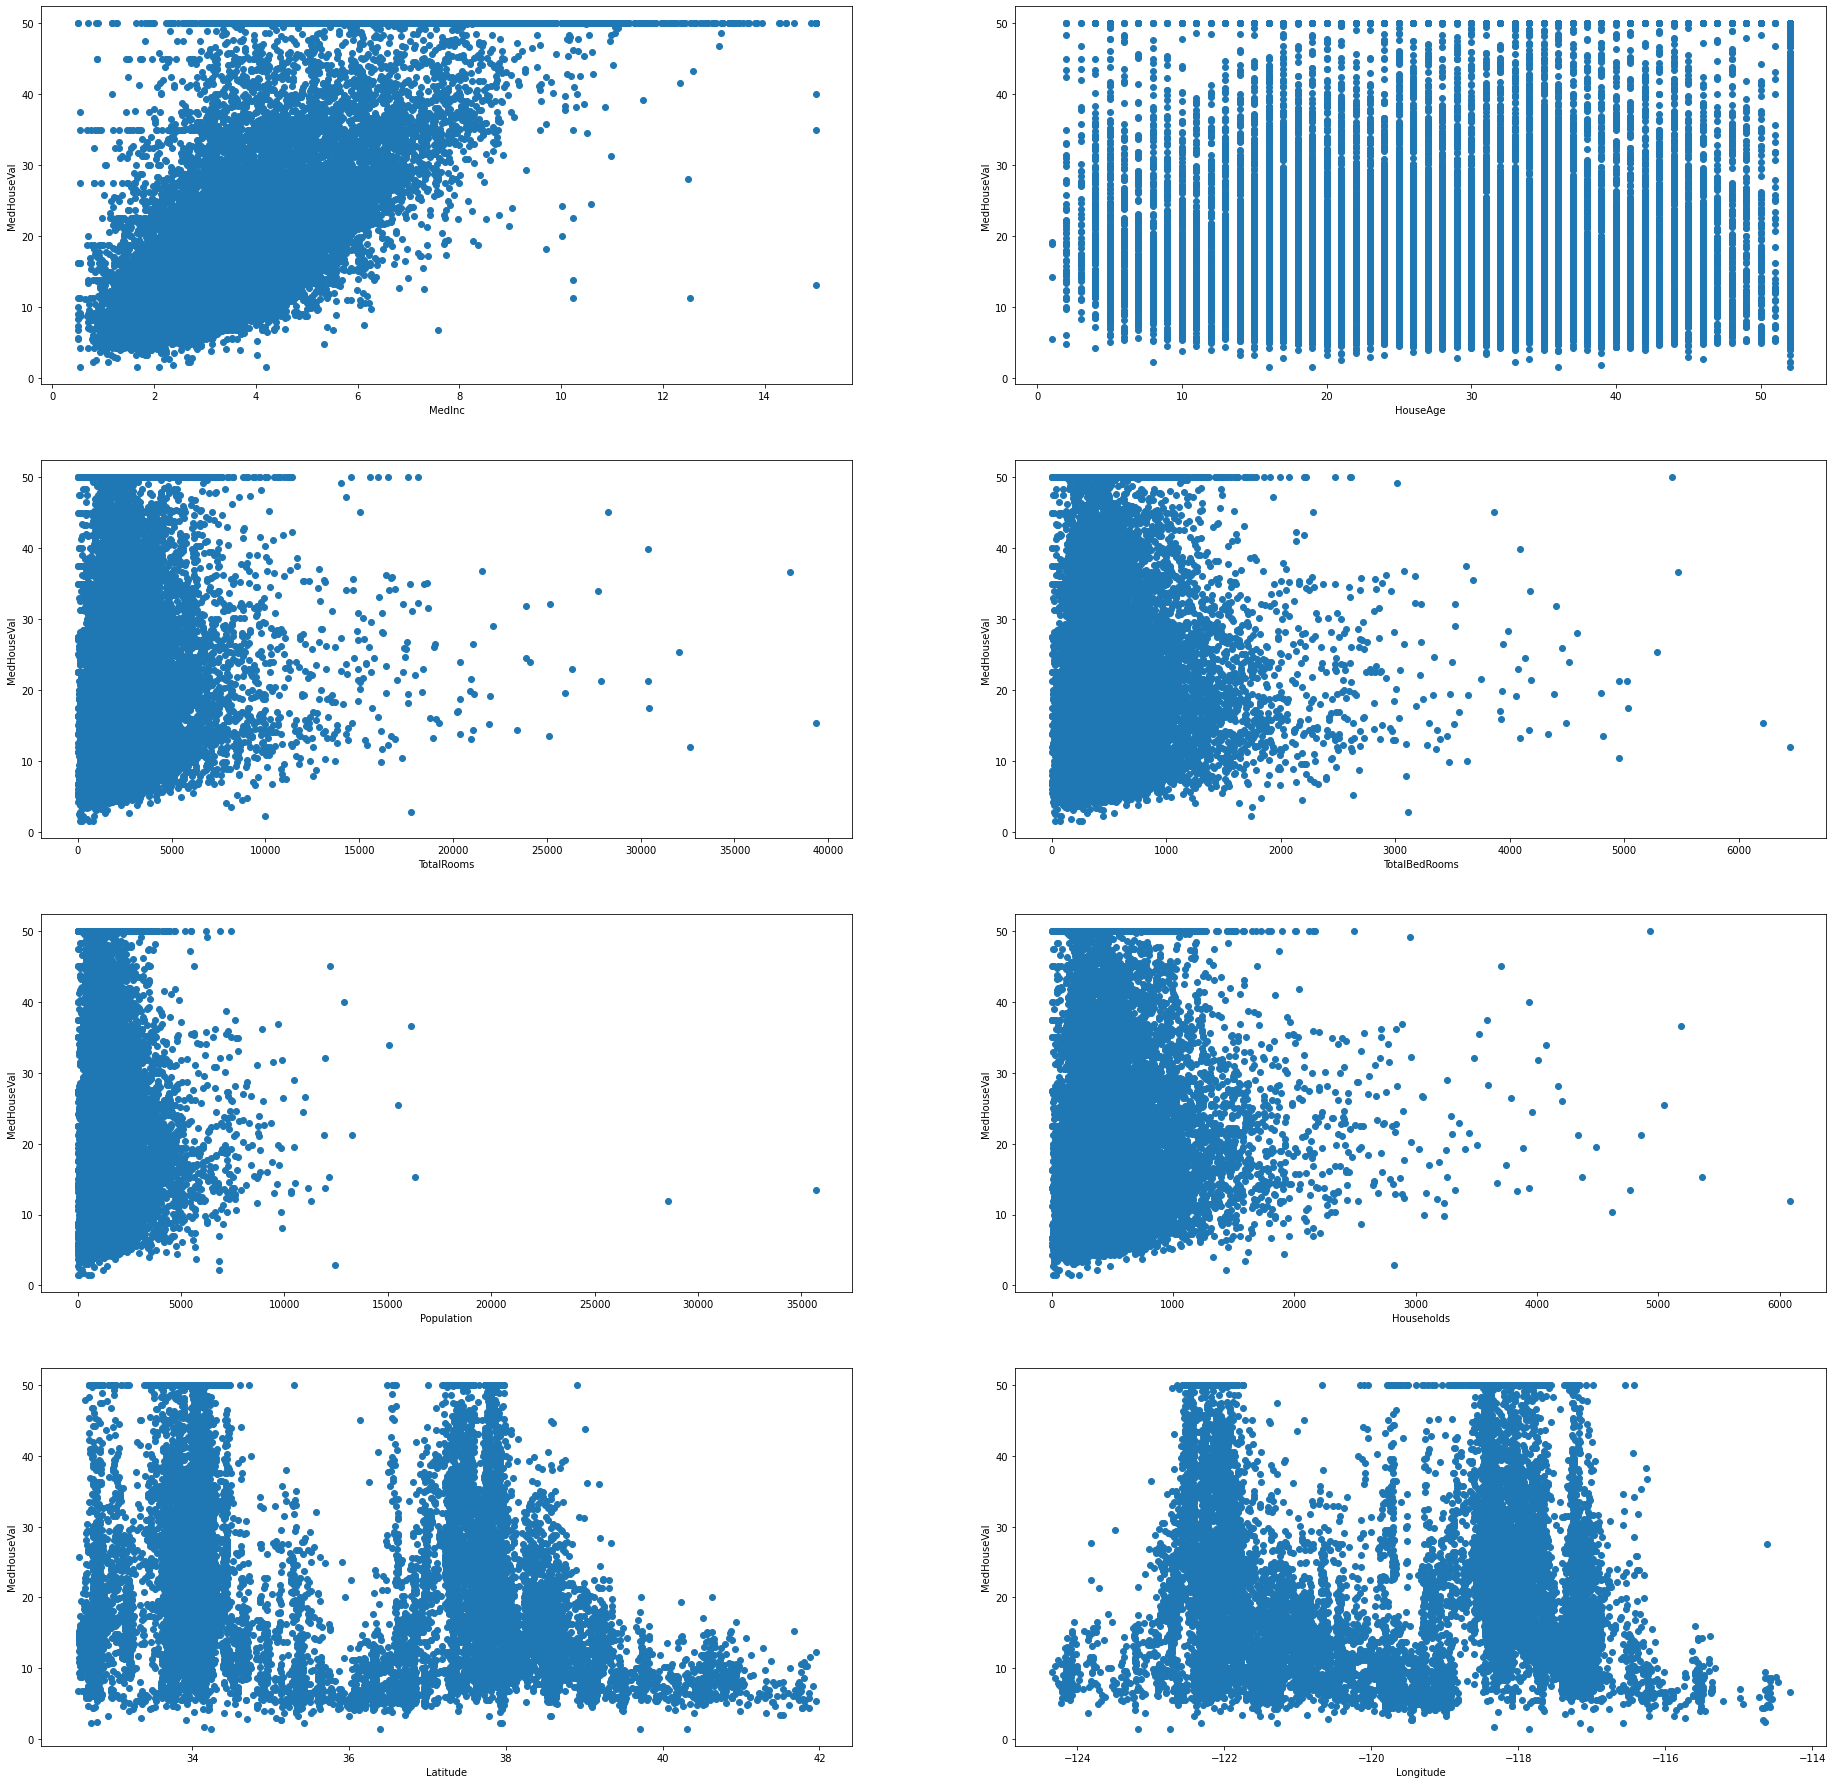

In [4]:
plt.figure(figsize=(32,32))
for i,name in enumerate(feature_names):
    plt.subplot(4,2,i+1)
    plt.scatter(df[name],df[target_names])
    plt.xlabel(name)
    plt.ylabel(target_names[0])
plt.savefig('yuanshi_sandiantu')

In [5]:
df_pro=df.copy()
df_pro.iloc[:, 2] /= df_pro.iloc[:, 5]
# avg bed rooms = total bed rooms / households
df_pro.iloc[:, 3] /= df_pro.iloc[:, 5]
# avg occupancy = population / households
df_pro.iloc[:, 5] = df_pro.iloc[:, 4] / df_pro.iloc[:, 5]
df_pro.rename(columns = {"TotalRooms": "AveRooms",'TotalBedRooms':'AveBedRooms','Population':'AvePopulation'})
df_pro.describe()

,MedInc,HouseAge,TotalRooms,TotalBedRooms,Population,Households,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,20.685582
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,11.539562
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,1.499900
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,11.960000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,17.970000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,26.472500
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,50.000100


In [6]:
df_pro_norm=(df_pro-df_pro.mean())/df_pro.std()
df_pro_norm['MedHouseVal']=df_pro['MedHouseVal']
df_pro_norm.describe()

,MedInc,HouseAge,TotalRooms,TotalBedRooms,Population,Households,Latitude,Longitude,MedHouseVal
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,20640.000000
mean,-1.443600e-14,3.451158e-17,1.869994e-15,1.020510e-14,-1.204893e-17,6.862727e-16,-9.086685e-14,-1.645953e-13,20.685582
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,11.539562
min,-1.774256e+00,-2.196127e+00,-1.852274e+00,-1.610729e+00,-1.256092e+00,-2.289944e-01,-1.447533e+00,-2.385935e+00,1.499900
25%,-6.881019e-01,-8.453727e-01,-3.994399e-01,-1.911670e-01,-5.637952e-01,-6.170912e-02,-7.967694e-01,-1.113182e+00,11.960000
50%,-1.767908e-01,2.864502e-02,-8.078293e-02,-1.010626e-01,-2.291262e-01,-2.431526e-02,-6.422715e-01,5.389006e-01,17.970000
75%,4.592952e-01,6.642943e-01,2.519554e-01,6.015724e-03,2.644885e-01,2.037404e-02,9.729330e-01,7.784775e-01,26.472500
max,5.858144e+00,1.856137e+00,5.516190e+01,6.957003e+01,3.024960e+01,1.194162e+02,2.957996e+00,2.625216e+00,50.000100


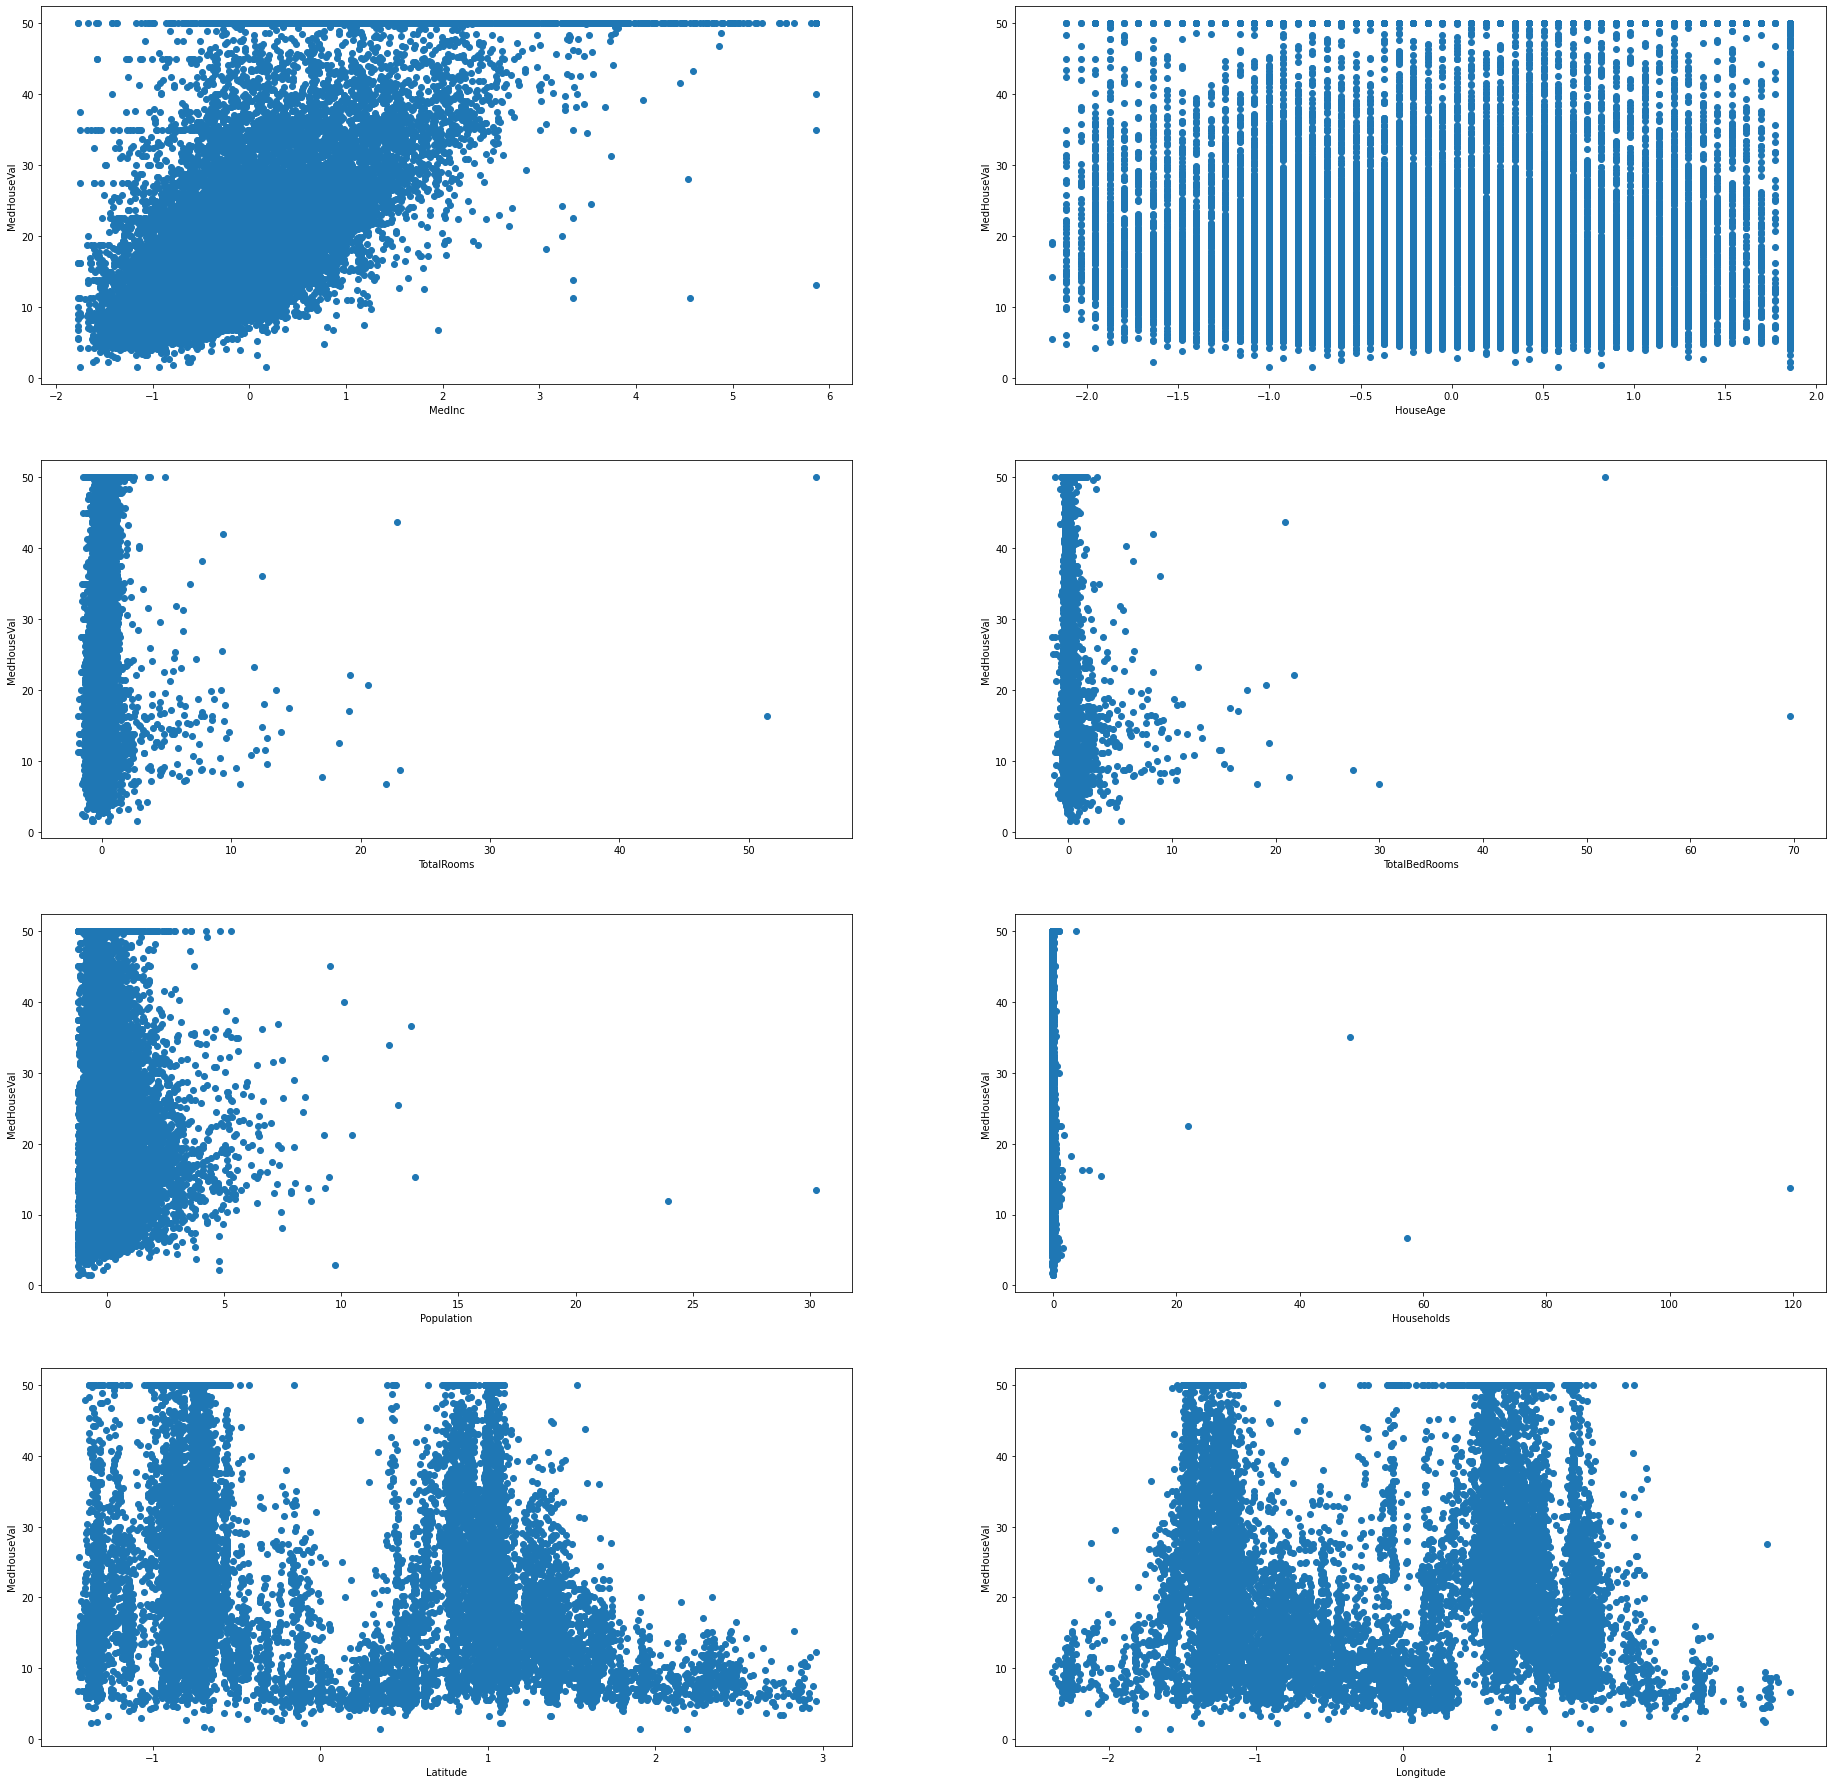

In [7]:
plt.figure(figsize=(32,32))
for i,name in enumerate(feature_names):
    plt.subplot(4,2,i+1)
    plt.scatter(df_pro_norm[name],df_pro_norm[target_names])
    plt.xlabel(name)
    plt.ylabel(target_names[0])
plt.savefig('zuhebianlaing_sandiantu')

In [8]:
train_nums=int(len(df)*0.7)
df_train=np.array(df[:train_nums])
df_test=np.array(df[train_nums:])
df_norm_train=np.array(df_norm[:train_nums])
df_norm_test=np.array(df_norm[train_nums:])
df_pro_train=np.array(df_pro[:train_nums])
df_pro_test=np.array(df_pro[train_nums:])
df_pro_norm_train=np.array(df_pro_norm[:train_nums])
df_pro_norm_test=np.array(df_pro_norm[train_nums:])
print(f'trainset nums: {len(df_train)}, testset nums: {len(df_test)}')

trainset nums: 14447, testset nums: 6193


In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F


def act_function(x):
    return torch.sigmoid(x) * x


class Mlp(nn.Module):
    def __init__(self, hide_chanel=512):
        super(Mlp, self).__init__()
        self.fc1 = nn.Linear(8, hide_chanel)
        self.fc2 = nn.Linear(hide_chanel, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = act_function(x)
        x = self.fc2(x)
        return x

In [10]:
def mean(x):
    return np.mean(x)
device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
from torch.utils.data.dataset import Dataset
from torch.utils.data.dataloader import DataLoader
import torch.nn.functional as F
import torch
import torchvision
import torch.nn as nn
from torch.utils.data.dataset import TensorDataset
def train(model,train_dataloader,test_dataloader,loss_fn,optimizer,scheduler=None,epochs=200):
    train_loss=[]
    test_loss=[]
    model.to(device)
    for t in range(epochs):
        # 前向传播：通过向模型传递x计算预测值y
        loss_val=[]
        for phase in ['train','test']:
            if phase =='train':
                model.train()
                dataloader=train_dataloader
            else:
                dataloader=test_dataloader
                model.eval()
            for data in dataloader:
                data=data[0]
                x=data[:,:-1].to(device)
                y=data[:,-1:].to(device)
                with torch.set_grad_enabled(phase=='train'):
                    y_pred = model(x)
                    #计算并输出loss
                    loss = loss_fn(y_pred, y)
                    loss_val.append(loss.item())
                    print(loss.item())
#                     print(loss_val)
                    # 清零梯度，反向传播，更新权重
                    if phase=='train':
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()
            if phase=='train':
                train_loss.append(mean(loss_val))
            else:
                test_loss.append(mean(loss_val))
        if scheduler is not None:
            print('scheduler.step()')
            scheduler.step()

    plt.plot(train_loss[10:])
    plt.plot(test_loss[10:])
    plt.legend(['trian_loss','test_loss'])
    plt.show()
    plt.savefig('train_loss_test_loss.png')
    print('min(train_loss),min(test_loss)',min(train_loss),min(test_loss))
    return train_loss,test_loss

438303.1875
18502690816.0
4838937088.0
559095414784.0
40026512.0
497.95111083984375
782.5234985351562
573.6046752929688
547.4647216796875
755.8724365234375
635.614990234375
578.7669677734375
468.60980224609375
613.7447509765625
683.844482421875
655.5792846679688
864.2906494140625
660.92724609375
738.1467895507812
585.0631713867188
480.1920166015625
527.2471923828125
653.4811401367188
572.4656372070312
705.5035400390625
787.2302856445312
600.9246215820312
552.6435546875
655.7139892578125
642.9625854492188
580.457275390625
591.85791015625
711.069091796875
582.457275390625
591.3748168945312
751.0670776367188
669.9228515625
431.7176208496094
569.2479248046875
413.66766357421875
838.7403564453125
502.73736572265625
655.5149536132812
597.0947875976562
687.60888671875
652.7208251953125
646.0804443359375
734.2356567382812
520.4909057617188
621.373291015625
573.1892700195312
562.2391357421875
748.5624389648438
752.6533203125
784.6063232421875
595.5401000976562
603.9263305664062
581.115661621093

714.6253662109375
568.9588623046875
531.298828125
739.6063842773438
581.7745361328125
614.5942993164062
537.8506469726562
740.7588500976562
556.0420532226562
617.2918701171875
519.738037109375
464.701171875
518.9790649414062
687.91162109375
588.6583862304688
483.90869140625
535.7409057617188
693.1367797851562
564.1923828125
499.10052490234375
647.4236450195312
658.393798828125
681.9240112304688
555.737548828125
651.7628173828125
547.734130859375
746.3756103515625
536.8229370117188
504.7534484863281
457.2919921875
798.7164916992188
583.2403564453125
621.9539184570312
439.378173828125
643.7606811523438
631.188232421875
597.3778686523438
508.4335021972656
608.8497314453125
754.9034423828125
615.2999267578125
520.0763549804688
571.1080322265625
628.5753784179688
781.0177001953125
523.95654296875
639.842041015625
525.3065795898438
657.3379516601562
610.3139038085938
705.1314697265625
558.7310180664062
607.3804931640625
573.6578979492188
642.7066650390625
728.4530639648438
775.1285400390625


582.2579956054688
769.4225463867188
618.2883911132812
645.4033203125
514.3343505859375
651.8643798828125
662.7396240234375
587.67626953125
556.6280517578125
604.6776123046875
538.7114868164062
758.7515258789062
574.9152221679688
666.3826904296875
624.1090698242188
467.709716796875
713.355224609375
582.8946533203125
699.5968017578125
577.9451904296875
633.6576538085938
610.8012084960938
733.3003540039062
671.0282592773438
732.5297241210938
566.1434936523438
769.2796630859375
576.9953002929688
730.087890625
555.830810546875
568.7463989257812
662.7929077148438
726.8001708984375
557.682861328125
475.51312255859375
692.9111328125
716.1758422851562
460.1983642578125
687.1552734375
533.4296875
587.0252685546875
594.7900390625
632.8741455078125
524.7723999023438
530.3907470703125
581.345947265625
567.1903076171875
581.2633056640625
607.442138671875
728.8734741210938
669.787841796875
555.3871459960938
610.5346069335938
709.9306030273438
587.335693359375
636.9696655273438
537.7429809570312
620.5

469.74505615234375
551.8331298828125
665.2232055664062
685.407958984375
635.2127685546875
633.1102294921875
502.65570068359375
661.961181640625
505.7860412597656
483.5608825683594
612.6904907226562
601.69189453125
602.0950317382812
676.9605712890625
602.3509521484375
633.259765625
661.8155517578125
554.3421020507812
679.7642822265625
730.1158447265625
541.096923828125
787.9701538085938
516.03369140625
799.8324584960938
592.8541259765625
625.1930541992188
615.5601806640625
655.5696411132812
616.7899780273438
492.7721862792969
538.1520385742188
442.5989074707031
650.0037841796875
562.311767578125
632.8042602539062
595.7347412109375
505.94671630859375
675.4796142578125
656.261474609375
681.611572265625
598.382080078125
755.9723510742188
501.931884765625
754.789794921875
549.7199096679688
583.489990234375
793.6991577148438
484.3269958496094
527.192626953125
585.609130859375
631.7841796875
677.031494140625
579.0237426757812
589.066650390625
626.4814453125
538.2269287109375
574.0875244140625

621.8699340820312
596.8411865234375
606.1455078125
585.78759765625
494.56121826171875
657.8427734375
481.2983093261719
636.8465576171875
682.1122436523438
616.3092651367188
615.4645385742188
702.8070678710938
568.55810546875
568.63623046875
797.733642578125
705.0389404296875
617.216064453125
612.9202880859375
678.412841796875
637.9844360351562
660.9817504882812
582.3778076171875
642.04296875
550.8124389648438
589.3191528320312
664.4168701171875
581.7218017578125
622.1129150390625
736.1918334960938
551.7929077148438
678.7593383789062
495.1639404296875
598.0454711914062
504.4364318847656
602.3759765625
620.4890747070312
645.9871826171875
622.3923950195312
706.678466796875
534.3092651367188
792.7340087890625
400.27752685546875
519.5639038085938
437.91778564453125
663.6345825195312
447.9962463378906
657.0595092773438
626.4052124023438
481.8442077636719
558.3850708007812
647.4549560546875
460.8375244140625
632.60498046875
625.1685791015625
609.7548828125
595.6422119140625
717.395751953125
5

366.324951171875
390.8782043457031
299.685791015625
308.5013732910156
250.97152709960938
809.1388549804688
498.9781188964844
248.9111785888672
312.40386962890625
218.09219360351562
352.6600341796875
278.5357666015625
222.11968994140625
311.869873046875
280.50433349609375
287.126953125
342.0107727050781
312.2093200683594
282.7357482910156
233.7450408935547
254.77438354492188
419.73760986328125
297.5185852050781
362.04168701171875
307.34417724609375
395.83453369140625
237.92132568359375
260.33770751953125
542.8754272460938
374.0973205566406
264.14404296875
298.53826904296875
236.85867309570312
172.97799682617188
355.067138671875
225.92164611816406
538.743896484375
295.32391357421875
238.60250854492188
417.3017272949219
356.9134826660156
347.482177734375
293.58294677734375
282.4156188964844
695.4705810546875
312.4346923828125
329.9922180175781
277.88079833984375
540.71728515625
321.4678039550781
243.32278442382812
358.50567626953125
935.4718017578125
760.524658203125
573.2866821289062
425

284.78289794921875
293.2934875488281
235.2814483642578
205.96426391601562
241.97987365722656
219.0347137451172
550.087158203125
191.1956329345703
298.891845703125
397.43206787109375
205.4485321044922
278.32843017578125
223.74830627441406
659.6898803710938
222.30108642578125
363.21051025390625
321.2186279296875
221.17559814453125
278.2386169433594
265.9532470703125
243.60403442382812
335.45452880859375
568.6704711914062
226.24911499023438
226.29603576660156
161.84344482421875
301.59979248046875
187.00222778320312
263.52044677734375
180.42739868164062
308.08837890625
295.7446594238281
230.88279724121094
264.68878173828125
242.5079803466797
160.05763244628906
448.94903564453125
209.77407836914062
220.02825927734375
230.13380432128906
222.29164123535156
308.80169677734375
413.056396484375
207.77825927734375
346.2562255859375
313.4501647949219
324.57281494140625
289.4436950683594
125.50841522216797
287.909912109375
212.0091552734375
172.51182556152344
299.6171875
347.5350036621094
400.69021

272.57745361328125
293.954345703125
390.4764404296875
268.216796875
241.0017852783203
244.10470581054688
305.2979736328125
203.9035186767578
542.7471923828125
323.5548095703125
257.36181640625
239.88986206054688
385.29046630859375
469.49798583984375
338.54241943359375
343.9893798828125
461.3578796386719
301.7302551269531
125.69682312011719
217.87953186035156
167.64479064941406
202.58514404296875
265.50750732421875
175.6642303466797
179.0693359375
199.81414794921875
446.8451843261719
579.5868530273438
162.1333465576172
198.3645782470703
176.81655883789062
190.5699462890625
183.6963348388672
327.1211242675781
145.3865966796875
139.97853088378906
163.0827178955078
199.03744506835938
329.95501708984375
172.945068359375
482.4227600097656
496.6785583496094
261.0921936035156
360.1434020996094
205.32484436035156
231.6510009765625
252.8759307861328
241.6045684814453
444.3924560546875
250.29391479492188
188.16812133789062
294.0096740722656
218.4730987548828
211.5506134033203
335.3125915527344
25

196.44290161132812
100.54767608642578
154.43141174316406
144.3072509765625
199.72552490234375
311.1969299316406
307.8977966308594
298.21240234375
461.6939392089844
435.16851806640625
359.7678527832031
183.64410400390625
280.74371337890625
184.76193237304688
158.60031127929688
273.4218444824219
227.5482940673828
147.67654418945312
183.1915740966797
267.9313659667969
156.557861328125
149.82179260253906
192.10794067382812
290.88519287109375
183.08123779296875
177.40365600585938
314.7029113769531
195.364013671875
231.8472442626953
144.0864715576172
159.6846160888672
123.54378509521484
116.51094055175781
130.41864013671875
109.38108825683594
197.52369689941406
131.90745544433594
146.9618682861328
299.1751708984375
530.2302856445312
320.474365234375
257.4388427734375
160.9237823486328
182.0144805908203
124.59715270996094
146.5086212158203
150.46890258789062
205.809326171875
350.5789794921875
246.13941955566406
237.32083129882812
199.73049926757812
137.03684997558594
146.4110565185547
143.626

301.48260498046875
227.9284210205078
237.79608154296875
381.8848571777344
274.0511474609375
238.00205993652344
321.488037109375
297.5950927734375
183.27587890625
180.54086303710938
233.88523864746094
191.83238220214844
257.6175231933594
234.69085693359375
252.3750762939453
148.3948974609375
235.18768310546875
244.96697998046875
195.84228515625
153.6739044189453
245.84613037109375
149.55111694335938
298.8633728027344
246.65438842773438
199.69564819335938
219.56080627441406
194.63429260253906
330.20843505859375
593.7888793945312
232.30520629882812
207.31158447265625
262.9311828613281
203.63711547851562
285.36431884765625
302.0513000488281
184.45034790039062
257.0761413574219
299.9759826660156
279.499267578125
373.8653564453125
156.1483917236328
286.1158447265625
338.3894958496094
249.470947265625
221.6778564453125
191.8893280029297
283.82208251953125
287.75421142578125
190.81996154785156
293.0262145996094
178.0877227783203
205.95892333984375
260.6443176269531
166.6967010498047
232.341735

192.0327606201172
236.7303924560547
235.64437866210938
202.10694885253906
212.12672424316406
169.48931884765625
161.43104553222656
157.81414794921875
224.1092529296875
153.94992065429688
119.55204772949219
154.01429748535156
281.156494140625
550.4011840820312
118.35592651367188
202.63174438476562
127.8727035522461
310.7999572753906
106.74433135986328
172.88961791992188
87.96011352539062
150.14195251464844
150.17677307128906
150.7875518798828
159.6150665283203
106.16915893554688
144.4030303955078
157.89598083496094
177.69439697265625
371.9169921875
130.46804809570312
99.6099853515625
104.8406753540039
325.447265625
537.77685546875
1507.729736328125
2936.180419921875
481.452392578125
588.1536254882812
197.5447235107422
217.92794799804688
560.5103149414062
365.22430419921875
278.3687438964844
308.87054443359375
274.5523681640625
438.0220031738281
330.429443359375
367.0220947265625
283.8257751464844
414.1278991699219
207.39268493652344
215.3343963623047
296.68670654296875
203.7951354980468

224.06008911132812
540.7123413085938
239.62567138671875
299.26568603515625
290.2521057128906
254.68650817871094
464.427978515625
256.32550048828125
255.7870330810547
249.51666259765625
282.7952575683594
308.25958251953125
292.9481201171875
391.540771484375
213.8123779296875
453.296630859375
350.4332275390625
249.81060791015625
249.96058654785156
325.5128173828125
377.76739501953125
371.6199951171875
349.1319885253906
406.31640625
235.6896209716797
285.8960266113281
247.56903076171875
222.31546020507812
376.8254089355469
204.77195739746094
309.2622375488281
252.49427795410156
166.83839416503906
381.59246826171875
273.8490295410156
288.615478515625
247.14666748046875
225.4175262451172
233.54824829101562
385.86590576171875
375.2236633300781
278.556640625
193.1869354248047
357.40130615234375
282.5144348144531
326.6429138183594
229.644775390625
290.1790466308594
271.4945068359375
272.24053955078125
378.86761474609375
359.1563720703125
263.53680419921875
207.72683715820312
391.937744140625
2

330.122802734375
260.2345275878906
253.40765380859375
181.3723907470703
173.8844757080078
266.3225402832031
331.1949768066406
235.0635223388672
229.9252166748047
258.5417785644531
234.459716796875
355.6457214355469
212.0893096923828
274.78656005859375
376.33197021484375
270.77288818359375
199.93222045898438
300.22906494140625
624.765625
366.5787353515625
364.8433837890625
234.12942504882812
319.7773742675781
379.6961364746094
309.4928283691406
241.83055114746094
277.6203918457031
261.9664001464844
238.0450439453125
283.65380859375
285.32415771484375
208.39242553710938
837.6683959960938
504.5174865722656
349.1439208984375
301.1368408203125
302.819580078125
300.2893371582031
261.6090393066406
210.4930877685547
446.2962646484375
280.3752136230469
261.51751708984375
175.54931640625
304.9101867675781
208.19659423828125
294.4218444824219
357.24334716796875
240.08937072753906
242.3599853515625
277.9284362792969
384.35009765625
332.41644287109375
396.1304931640625
247.46961975097656
299.492675

212.00057983398438
299.0087585449219
263.6969909667969
382.7274169921875
220.29344177246094
367.1835021972656
340.0283203125
387.5587463378906
213.61676025390625
234.79629516601562
275.2968444824219
343.9664001464844
222.4244384765625
241.3864288330078
313.33795166015625
207.7545928955078
286.90386962890625
249.91847229003906
317.2154541015625
394.4853515625
244.41064453125
247.00558471679688
233.58753967285156
353.4222717285156
262.8872985839844
203.50523376464844
224.32029724121094
434.38922119140625
395.88836669921875
407.1059875488281
318.38458251953125
472.8288879394531
262.55694580078125
238.46163940429688
236.08340454101562
1032.9547119140625
685.8720092773438
376.5589904785156
392.5106201171875
286.732421875
265.0556945800781
249.54811096191406
311.4573974609375
281.0466003417969
451.3146667480469
437.606689453125
250.21902465820312
324.5467834472656
210.87399291992188
257.3282165527344
232.17002868652344
354.7965087890625
248.55462646484375
187.7650146484375
313.7755432128906


339.5605773925781
222.99952697753906
287.2483825683594
449.40008544921875
237.90927124023438
212.4025421142578
284.2867126464844
306.0877990722656
305.8926696777344
290.1751403808594
270.7835693359375
321.62109375
197.42425537109375
243.018310546875
267.4818420410156
497.9619140625
196.55410766601562
360.2838134765625
256.78857421875
297.70947265625
200.5823516845703
346.9627685546875
255.55653381347656
201.794189453125
332.4328918457031
222.39093017578125
256.2239685058594
233.91854858398438
179.5604248046875
282.8638916015625
272.9158935546875
227.2540740966797
283.7063293457031
329.05987548828125
295.23114013671875
298.32818603515625
357.8102111816406
283.8418273925781
414.5533752441406
189.7167205810547
215.90538024902344
231.5816650390625
275.2083435058594
312.5270080566406
303.9905090332031
274.5278625488281
281.1630554199219
277.1621398925781
264.4866943359375
273.9717712402344
298.60076904296875
273.8803405761719
310.3544616699219
311.86004638671875
200.8909454345703
190.643753

155.34059143066406
209.97769165039062
344.4302062988281
265.7245178222656
167.0155487060547
120.83283996582031
109.16412353515625
168.94683837890625
215.45298767089844
260.9263610839844
186.56680297851562
255.90371704101562
129.95123291015625
142.80126953125
97.03569030761719
156.90164184570312
106.07323455810547
179.62074279785156
171.98764038085938
167.4342498779297
173.17393493652344
361.58966064453125
163.21861267089844
158.7747039794922
140.5843505859375
184.96084594726562
259.084228515625
104.47227478027344
102.90608215332031
106.31798553466797
92.08675384521484
116.36214447021484
120.76334381103516
134.2283935546875
141.59576416015625
157.9479522705078
299.1595764160156
386.5215148925781
197.4733123779297
190.38829040527344
246.7965850830078
165.1971893310547
110.1991958618164
118.08768463134766
129.23944091796875
82.2556381225586
230.93560791015625
114.79081726074219
206.860107421875
190.05455017089844
193.8880615234375
136.88067626953125
114.00772094726562
129.43328857421875
1

119.98516845703125
100.9004135131836
148.3068389892578
127.27645111083984
183.07545471191406
110.15535736083984
127.8172607421875
98.034912109375
123.0753402709961
209.30699157714844
246.8076629638672
255.95252990722656
189.98294067382812
144.5003204345703
254.94862365722656
273.2445068359375
172.2205352783203
111.96025085449219
121.08966827392578
199.51962280273438
393.7928466796875
322.5843505859375
292.0409851074219
231.61376953125
161.49244689941406
82.30072021484375
136.8972625732422
163.6699676513672
122.46292114257812
100.94038391113281
139.701904296875
99.00470733642578
116.80422973632812
84.7583236694336
137.89263916015625
419.8994445800781
124.829345703125
147.99871826171875
246.40992736816406
128.613525390625
382.6726989746094
455.4231262207031
422.1864318847656
257.7125244140625
251.4346923828125
208.01095581054688
285.8323974609375
249.8717803955078
291.3336181640625
231.22348022460938
307.162109375
210.32676696777344
195.8972625732422
316.01495361328125
315.0537109375
269

217.22352600097656
103.1829833984375
116.38775634765625
100.1002426147461
118.13751220703125
136.92420959472656
131.01380920410156
129.5604248046875
132.51768493652344
164.1466827392578
108.27130126953125
180.57704162597656
151.68650817871094
104.792236328125
112.56925964355469
112.01045989990234
115.2577896118164
140.12680053710938
144.63162231445312
118.24449920654297
126.37979888916016
123.1982192993164
118.97115325927734
114.43911743164062
156.1011962890625
174.89019775390625
145.4474639892578
135.09556579589844
115.84524536132812
125.36603546142578
115.32594299316406
106.04217529296875
154.43019104003906
156.4562225341797
178.8432159423828
121.18384552001953
113.55464172363281
123.89100646972656
171.69729614257812
197.56167602539062
194.43849182128906
103.26041412353516
150.07638549804688
170.29617309570312
164.42567443847656
192.30825805664062
104.63389587402344
117.48907470703125
210.11558532714844
121.19957733154297
179.46182250976562
163.1619110107422
130.6709442138672
174.500

115.2213134765625
124.42854309082031
159.9523162841797
102.34200286865234
79.66073608398438
120.09774017333984
113.91954040527344
126.66165161132812
116.54150390625
142.4647979736328
146.37109375
203.54855346679688
135.9123992919922
112.06575775146484
155.57244873046875
131.9418487548828
123.759521484375
165.1280517578125
91.98619842529297
105.89285278320312
87.11726379394531
116.2392578125
127.69236755371094
106.36270141601562
122.03897094726562
102.30345153808594
118.00570678710938
115.61738586425781
116.43836975097656
96.40614318847656
134.81063842773438
94.75108337402344
99.0119857788086
129.3667449951172
190.566162109375
132.7465362548828
133.636474609375
147.84869384765625
206.43492126464844
412.2665100097656
167.0286865234375
210.81787109375
119.60843658447266
132.9085693359375
134.64373779296875
82.6913833618164
132.96517944335938
148.80197143554688
108.50711822509766
117.0997543334961
139.5123291015625
145.4834747314453
96.3095703125
110.42335510253906
114.19679260253906
150.4

243.49972534179688
195.35687255859375
219.84324645996094
311.4403076171875
247.35484313964844
230.9477996826172
217.47047424316406
267.91632080078125
295.87554931640625
516.2313232421875
266.26641845703125
213.82949829101562
252.5989532470703
215.36170959472656
291.8297119140625
435.1474304199219
182.57733154296875
277.8941345214844
213.5226593017578
171.35987854003906
236.9681854248047
420.5583190917969
311.45977783203125
244.10154724121094
263.5537414550781
231.3498077392578
200.75286865234375
354.82733154296875
207.23886108398438
275.86669921875
189.5333251953125
264.24346923828125
146.45870971679688
253.7830810546875
248.40472412109375
392.6249694824219
275.3745422363281
221.15234375
244.90121459960938
190.24925231933594
265.775390625
217.6468963623047
214.89306640625
269.7457580566406
343.0941162109375
204.38720703125
417.0879821777344
397.121337890625
356.2650146484375
279.23162841796875
211.64288330078125
454.457275390625
324.9219970703125
224.01866149902344
558.4118041992188
37

138.32675170898438
87.49067687988281
131.35678100585938
119.83580780029297
77.67147064208984
124.00404357910156
94.72467041015625
139.8802947998047
124.04448699951172
122.7641372680664
93.91546630859375
126.16340637207031
122.07963562011719
140.156005859375
79.09526824951172
128.99790954589844
98.47789001464844
107.38349914550781
108.5555648803711
123.3607177734375
125.77131652832031
224.43869018554688
157.96217346191406
327.05926513671875
100.00328826904297
143.8319091796875
91.71647644042969
192.87315368652344
111.50798034667969
121.21527099609375
77.05702209472656
133.78921508789062
105.19319915771484
118.52111053466797
141.71241760253906
140.02825927734375
159.39450073242188
154.1665496826172
130.05984497070312
124.14199829101562
124.3450927734375
167.22242736816406
104.9625244140625
99.96607971191406
96.24382019042969
126.58855438232422
84.77558898925781
78.50118255615234
106.51631927490234
70.22950744628906
118.2222900390625
105.0438461303711
155.36317443847656
181.8644256591797


112.7822265625
167.14195251464844
125.90608978271484
134.3912353515625
104.60224914550781
130.92808532714844
138.9757080078125
145.77647399902344
84.84310913085938
134.4863739013672
130.7204132080078
101.70954895019531
100.30120086669922
102.5495834350586
104.76072692871094
86.52409362792969
104.81201171875
130.17938232421875
140.21762084960938
118.93128204345703
113.87303161621094
99.10800170898438
133.09307861328125
118.41607666015625
137.2374267578125
132.06007385253906
151.18052673339844
122.95295715332031
96.43685150146484
130.31907653808594
146.0090789794922
103.79574584960938
100.896728515625
130.63916015625
93.84808349609375
102.96773529052734
115.69306945800781
166.55255126953125
160.87686157226562
151.93646240234375
99.05248260498047
75.22203063964844
130.2077178955078
117.80522918701172
96.421875
136.5720672607422
131.83274841308594
118.94422149658203
87.06243896484375
89.02281188964844
95.79197692871094
126.5213623046875
124.07762145996094
134.29624938964844
77.586303710937

134.8656768798828
139.8601531982422
61.2920036315918
142.29571533203125
136.86648559570312
102.26703643798828
127.60957336425781
102.21708679199219
118.0467529296875
94.62835693359375
99.79833984375
75.0030746459961
84.2008056640625
111.56437683105469
132.6852569580078
110.79230499267578
143.4661865234375
119.55648040771484
111.0369644165039
125.68001556396484
124.57657623291016
132.71485900878906
86.3878173828125
78.87913513183594
107.7235336303711
84.89710235595703
114.44708251953125
106.96757507324219
160.5955352783203
93.89352416992188
135.50408935546875
100.38355255126953
76.59688568115234
99.37715911865234
100.42971801757812
135.07369995117188
75.7901382446289
163.1969451904297
132.388916015625
304.34844970703125
99.39666748046875
158.23194885253906
105.62547302246094
116.88369750976562
109.80262756347656
105.67749786376953
73.4611587524414
108.2824935913086
179.41384887695312
110.32440185546875
163.9939422607422
123.21635437011719
95.68311309814453
100.98310089111328
109.6923522

147.65505981445312
154.97601318359375
113.9663314819336
116.66425323486328
120.612060546875
141.34239196777344
200.7992401123047
219.60897827148438
86.13735961914062
91.16307830810547
100.66339874267578
104.98352813720703
124.4541015625
107.20881652832031
132.37559509277344
100.2845687866211
87.31817626953125
113.73783874511719
160.34857177734375
121.0244140625
73.66050720214844
92.43414306640625
87.2015609741211
106.75794219970703
125.94181060791016
162.13787841796875
126.19877624511719
213.01968383789062
325.68035888671875
218.71646118164062
216.7169189453125
305.9834899902344
104.58537292480469
111.22102355957031
103.05626678466797
75.1363754272461
142.20574951171875
99.39564514160156
96.90165710449219
174.10682678222656
114.55915832519531
76.10211944580078
201.16073608398438
151.45338439941406
97.96919250488281
75.74394226074219
135.3883514404297
119.70625305175781
113.72086334228516
141.8334197998047
116.48681640625
94.21060943603516
199.9669189453125
97.40739440917969
113.7945251

104.9747543334961
210.07708740234375
286.4029846191406
270.7734375
112.75285339355469
100.14675903320312
126.25376892089844
97.83334350585938
106.16693878173828
120.16455841064453
104.23772430419922
125.78404235839844
103.95674133300781
131.67654418945312
84.97289276123047
103.22347259521484
112.28739929199219
103.86811828613281
177.94635009765625
138.13232421875
135.23399353027344
148.74713134765625
121.29244995117188
83.80762481689453
241.49159240722656
71.72211456298828
116.55785369873047
110.85504150390625
105.2608413696289
97.59797668457031
144.95489501953125
140.3105010986328
203.30477905273438
149.89300537109375
112.6796646118164
78.15214538574219
115.41805267333984
133.33444213867188
93.76824951171875
119.98355865478516
131.70892333984375
92.10450744628906
147.87562561035156
139.04908752441406
96.67202758789062
95.23553466796875
122.30986022949219
116.2394790649414
133.97622680664062
113.14031982421875
108.9542007446289
126.8135986328125
113.22503662109375
126.94342041015625
15

153.0111083984375
148.83364868164062
100.70527648925781
98.07830047607422
147.63648986816406
124.62882995605469
266.655029296875
117.60882568359375
107.19684600830078
150.8687744140625
160.0596160888672
107.98450469970703
109.1763916015625
107.989990234375
128.73736572265625
164.53366088867188
124.9233169555664
185.5861358642578
243.17169189453125
98.02641296386719
75.636962890625
123.13081359863281
109.76692962646484
100.02577209472656
88.29669952392578
108.30521392822266
84.20726776123047
153.2977294921875
114.36592102050781
95.59385681152344
169.998046875
94.36659240722656
163.9694061279297
100.8416519165039
108.36397552490234
137.35350036621094
136.44647216796875
125.429443359375
148.78648376464844
126.09778594970703
94.07135009765625
95.79240417480469
81.71098327636719
89.2406234741211
137.7702178955078
138.13877868652344
170.28977966308594
188.13589477539062
280.6402893066406
87.4714584350586
90.38738250732422
98.98160552978516
119.53114318847656
111.25282287597656
121.2654190063

139.1429901123047
103.48603820800781
130.5753173828125
91.94664001464844
169.82408142089844
167.49476623535156
284.4291076660156
122.08907318115234
106.44190979003906
100.40436553955078
106.130615234375
124.3162841796875
150.5197296142578
104.37873077392578
122.48217010498047
136.7098388671875
80.00849151611328
113.7046890258789
144.15496826171875
120.34666442871094
128.7054901123047
112.47390747070312
108.26421356201172
95.92504119873047
97.8271713256836
81.48211669921875
104.36537170410156
97.23255920410156
91.81653594970703
128.90267944335938
179.06509399414062
197.28709411621094
101.10252380371094
91.86981964111328
108.09623718261719
135.8596954345703
147.37583923339844
116.57490539550781
79.88275146484375
138.95831298828125
101.43673706054688
110.46885681152344
89.21691131591797
155.570556640625
157.98631286621094
144.00588989257812
96.39737701416016
106.39940643310547
123.51193237304688
153.62936401367188
102.51535034179688
107.2748031616211
101.111572265625
148.64981079101562
95

107.33357238769531
100.10443115234375
74.04573059082031
105.35752868652344
114.21597290039062
101.60508728027344
104.65367889404297
145.10833740234375
134.47679138183594
101.60948181152344
85.46404266357422
123.92135620117188
97.80671691894531
153.15948486328125
99.20249938964844
139.3011932373047
111.36155700683594
116.85386657714844
95.60658264160156
129.4638671875
122.33512878417969
88.90493774414062
108.54015350341797
115.45037841796875
105.39978790283203
106.3849868774414
112.53572845458984
93.26220703125
122.57677459716797
104.45347595214844
149.12303161621094
123.75828552246094
103.12940979003906
117.28915405273438
117.06310272216797
151.05734252929688
98.20370483398438
157.47218322753906
101.10291290283203
103.17044830322266
102.62747955322266
118.0035400390625
139.12635803222656
168.98806762695312
96.82460021972656
102.634033203125
140.98927307128906
126.38458251953125
106.91830444335938
131.27142333984375
135.36065673828125
152.91537475585938
138.6356201171875
120.66983032226

143.4279327392578
167.94384765625
128.64154052734375
126.29287719726562
107.97750854492188
147.69134521484375
112.00119018554688
160.8501434326172
103.1398696899414
114.51023864746094
132.71420288085938
130.10325622558594
133.32696533203125
112.33793640136719
92.87939453125
82.72541046142578
78.95700073242188
105.0379409790039
168.32183837890625
82.97740936279297
109.16485595703125
152.17613220214844
89.48407745361328
117.2956314086914
110.20812225341797
111.75611877441406
126.89822387695312
93.14495086669922
113.12887573242188
126.25558471679688
124.85752868652344
145.15533447265625
95.17445373535156
108.58849334716797
108.03372192382812
115.61531066894531
129.91433715820312
115.99285888671875
156.84036254882812
119.01361846923828
125.4657974243164
128.17979431152344
71.90606689453125
109.0228271484375
110.94667053222656
91.87602233886719
290.3765869140625
117.48636627197266
126.0601806640625
124.755615234375
110.92472076416016
107.14776611328125
111.77214813232422
83.39753723144531
7

122.92546844482422
110.16646575927734
140.10496520996094
99.19256591796875
91.7480239868164
125.33905792236328
87.63262176513672
96.08792114257812
138.22752380371094
223.7962646484375
133.85435485839844
102.9722671508789
106.93162536621094
100.69947052001953
95.39911651611328
111.41917419433594
183.23556518554688
134.43556213378906
136.63534545898438
99.91814422607422
89.58602142333984
147.41357421875
135.8647918701172
97.39900970458984
104.1447525024414
110.51657104492188
83.27226257324219
115.92628479003906
136.88958740234375
108.43805694580078
98.83096313476562
140.63914489746094
109.50740814208984
135.47080993652344
109.36135864257812
114.44879150390625
124.92947387695312
114.22989654541016
134.63442993164062
126.95966339111328
113.63426971435547
112.10488891601562
104.56702423095703
92.072998046875
94.9226303100586
129.87838745117188
75.08734893798828
90.731201171875
154.42391967773438
140.64080810546875
159.41363525390625
114.76008605957031
84.34378814697266
94.46968078613281
117

94.6129150390625
147.91754150390625
70.76889038085938
100.76040649414062
106.54102325439453
138.33163452148438
116.7676773071289
153.7626953125
131.017333984375
93.65250396728516
108.17101287841797
108.56004333496094
86.3304443359375
112.11221313476562
113.62806701660156
109.71751403808594
98.66921997070312
93.59830474853516
140.11251831054688
105.09324645996094
114.28585815429688
96.74144744873047
124.10897827148438
67.70665740966797
146.6509246826172
98.10472106933594
83.92989349365234
86.41605377197266
120.3679428100586
90.75662231445312
137.56582641601562
107.18585205078125
112.91597747802734
117.08007049560547
101.17605590820312
118.06315612792969
111.23223114013672
154.22042846679688
120.79962158203125
109.75896453857422
113.00641632080078
99.35369873046875
74.18286895751953
113.28092193603516
108.11186218261719
118.20890045166016
128.57174682617188
115.37574768066406
112.22736358642578
99.77590942382812
106.30481719970703
109.16744995117188
97.06249237060547
90.832763671875
93.1

122.96350860595703
101.01050567626953
85.83806610107422
127.96073913574219
90.9310531616211
122.29594421386719
101.49999237060547
166.44766235351562
94.88117980957031
108.81153869628906
96.6044921875
92.62516021728516
84.88365173339844
108.19071960449219
127.2097396850586
116.97686004638672
130.2840118408203
101.8634262084961
114.80408477783203
106.9368896484375
103.97164916992188
92.00210571289062
91.2364501953125
98.28581237792969
114.78736114501953
108.2314682006836
126.58768463134766
102.01039123535156
146.54385375976562
93.92668151855469
95.36135864257812
126.62394714355469
157.96875
78.49352264404297
102.28315734863281
70.57107543945312
94.14141845703125
128.75909423828125
127.23204040527344
138.3599853515625
162.34312438964844
331.21466064453125
140.19313049316406
112.49944305419922
123.38139343261719
129.890625
129.48487854003906
80.715576171875
130.89964294433594
90.40046691894531
112.9308853149414
134.579833984375
121.40210723876953
100.66703796386719
146.50634765625
110.1592

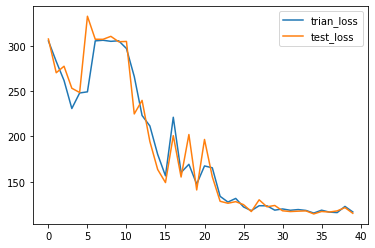

min(train_loss),min(test_loss) 115.55448623657226 114.63081249344015


<Figure size 432x288 with 0 Axes>

In [18]:

train_data_tensor = torch.Tensor(df_train)
test_data_tensor = torch.Tensor(df_test)
train_dataset = TensorDataset(train_data_tensor)
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, drop_last=True)
test_dataset = TensorDataset(test_data_tensor)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True, drop_last=True)
model = Mlp(256)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-6)
loss_fn = torch.nn.MSELoss(reduction='mean')
re=train(model,train_dataloader,test_dataloader,loss_fn,optimizer,scheduler=None,epochs=50)

575.9375610351562
502.7947998046875
328.8058776855469
285.10595703125
228.68017578125
159.92245483398438
112.73060607910156
62.758766174316406
82.72923278808594
147.49085998535156
89.85771179199219
57.4938850402832
74.38475036621094
87.1590576171875
63.58477783203125
48.04159164428711
78.39502716064453
67.20512390136719
46.572139739990234
39.001564025878906
59.347537994384766
38.595558166503906
81.52326202392578
62.95165252685547
49.53236770629883
46.4607048034668
40.5889778137207
88.1153793334961
40.53828430175781
48.08034133911133
73.83319854736328
61.97141647338867
64.70156860351562
51.03449249267578
84.14659118652344
44.91939163208008
44.45427703857422
74.09354400634766
77.97941589355469
193.5382537841797
211.87960815429688
83.14817810058594
48.14619064331055
78.79197692871094
41.87643814086914
42.822731018066406
32.58478927612305
67.68833923339844
69.05303192138672
76.83599853515625
38.25351333618164
36.39291763305664
44.63350296020508
48.24789810180664
42.923431396484375
67.20951

54.52233123779297
45.78092956542969
19.419353485107422
27.41594886779785
30.486186981201172
54.53366470336914
64.4858169555664
62.65617752075195
105.48204803466797
52.66747283935547
36.05699920654297
27.455373764038086
66.84586334228516
51.37334060668945
61.460838317871094
60.8998908996582
35.95024490356445
55.923492431640625
51.711673736572266
40.28076171875
54.80571365356445
46.0030632019043
53.47205352783203
58.25080108642578
54.89546585083008
34.46872329711914
46.11248779296875
27.91718101501465
84.54154968261719
80.3052978515625
67.09343719482422
47.922821044921875
46.537227630615234
46.99492263793945
46.09231185913086
28.254674911499023
34.29093551635742
36.72806930541992
46.771514892578125
49.261356353759766
37.8034782409668
30.752655029296875
41.9412841796875
39.90312194824219
22.847864151000977
34.519866943359375
31.327157974243164
30.509689331054688
33.62406539916992
24.77297592163086
32.244285583496094
35.83369445800781
25.01495933532715
25.486570358276367
43.73433303833008


71.1918716430664
34.56080627441406
58.14705276489258
41.22665786743164
25.285533905029297
60.28717041015625
39.025943756103516
46.20451354980469
29.55899429321289
55.25054931640625
50.31504821777344
24.442485809326172
56.80630874633789
51.96598434448242
47.9818229675293
42.65158462524414
36.04233932495117
35.506752014160156
41.7454833984375
33.439266204833984
30.311141967773438
29.05373191833496
41.29998016357422
31.632946014404297
37.661842346191406
33.797733306884766
45.70884323120117
51.85186767578125
45.273704528808594
53.566104888916016
35.392860412597656
39.649173736572266
37.83201599121094
28.27315902709961
25.680692672729492
51.787139892578125
36.05516815185547
38.381832122802734
58.22347640991211
57.89091491699219
43.20920181274414
42.550071716308594
37.05229187011719
31.068408966064453
29.641921997070312
35.82651901245117
27.112300872802734
49.39115524291992
71.34980010986328
23.91816520690918
35.7840461730957
43.158447265625
25.6560115814209
38.29302978515625
56.833892822265

36.936283111572266
30.860980987548828
44.93803787231445
44.615516662597656
17.915258407592773
55.291259765625
33.02622604370117
64.2882308959961
31.806411743164062
27.529216766357422
28.35198974609375
43.428775787353516
23.39609718322754
45.83348846435547
21.637939453125
32.47464370727539
16.92489242553711
29.419374465942383
51.547996520996094
38.55352020263672
35.90187454223633
28.51701545715332
36.47472381591797
33.68012237548828
33.185020446777344
45.06917190551758
37.552799224853516
45.647972106933594
42.63982391357422
33.672908782958984
32.06638717651367
53.48248291015625
36.321044921875
39.13621520996094
31.76581573486328
39.49219512939453
41.88725280761719
40.092166900634766
28.570343017578125
54.23357391357422
40.41178894042969
35.347557067871094
37.69147872924805
41.45491409301758
41.021915435791016
38.73588943481445
56.67975616455078
41.98460006713867
38.3384895324707
47.1365966796875
30.948528289794922
26.82499885559082
27.27429962158203
46.509185791015625
45.27997589111328


28.65582275390625
41.95769500732422
34.168731689453125
73.98870086669922
57.769081115722656
34.55352783203125
43.052146911621094
43.1274528503418
24.684921264648438
37.16682434082031
25.913068771362305
52.460018157958984
36.7956657409668
46.41166687011719
24.761701583862305
29.160940170288086
58.834449768066406
43.68769454956055
29.418203353881836
43.038761138916016
41.150054931640625
50.22127151489258
34.48655319213867
30.460203170776367
33.357425689697266
24.650951385498047
40.303829193115234
31.549579620361328
58.16669845581055
25.67622947692871
39.971763610839844
18.592266082763672
21.6705265045166
54.53083038330078
38.42633056640625
64.94413757324219
56.54578399658203
43.26469421386719
27.636560440063477
33.05316162109375
40.92018127441406
36.32267761230469
39.320159912109375
37.980525970458984
34.03060531616211
51.376468658447266
35.29195785522461
31.187999725341797
38.31196212768555
41.33849334716797
31.913314819335938
35.36549377441406
34.84406280517578
25.241554260253906
37.56

36.95057678222656
35.175323486328125
34.02904510498047
24.246896743774414
18.80647850036621
28.694679260253906
39.361202239990234
21.400026321411133
42.10224151611328
49.01576232910156
27.375919342041016
45.51512908935547
41.183509826660156
30.90891456604004
28.71108055114746
47.37392044067383
28.87405776977539
76.13690185546875
53.334686279296875
30.212833404541016
32.813987731933594
28.36845588684082
21.851547241210938
39.28926467895508
40.295223236083984
46.51005172729492
24.646770477294922
38.80097198486328
32.85780334472656
34.81756591796875
32.75020217895508
38.03779602050781
28.233428955078125
38.870094299316406
29.754018783569336
56.58282470703125
32.878814697265625
59.9927978515625
55.448150634765625
47.392452239990234
64.64079284667969
43.11222457885742
40.8538932800293
32.692230224609375
35.254600524902344
34.49005126953125
21.318822860717773
31.56732940673828
34.7956657409668
42.87369918823242
43.5398063659668
43.59809112548828
36.03699493408203
35.44462585449219
47.0868949

45.48430633544922
46.34492874145508
39.6616325378418
29.090965270996094
60.877960205078125
42.448890686035156
46.51481246948242
43.26535415649414
51.25827407836914
32.786224365234375
28.784317016601562
27.07304573059082
29.435680389404297
41.782569885253906
35.19473648071289
28.197551727294922
48.84564208984375
19.419275283813477
59.285804748535156
36.82273864746094
46.28931427001953
47.340824127197266
44.65498733520508
33.13307189941406
44.60560607910156
34.925086975097656
36.304603576660156
46.58068084716797
23.022676467895508
52.432586669921875
64.54887390136719
43.843658447265625
48.56816864013672
62.632530212402344
24.28514862060547
50.03080749511719
39.044189453125
33.11246871948242
68.94710540771484
29.03044319152832
48.984230041503906
34.74568557739258
32.686767578125
19.87123680114746
33.77699279785156
38.54920196533203
23.785785675048828
25.01656723022461
47.686561584472656
38.09962463378906
35.240013122558594
37.92477798461914
33.86029815673828
24.296552658081055
27.65459060

44.92863464355469
38.141597747802734
35.13067626953125
22.444414138793945
23.591163635253906
60.017696380615234
30.357603073120117
52.39319610595703
45.27116012573242
41.66999816894531
53.572574615478516
50.287147521972656
38.064212799072266
21.328857421875
24.039936065673828
33.674678802490234
35.92727279663086
29.382688522338867
29.780315399169922
52.629390716552734
52.379573822021484
49.075439453125
28.25410270690918
33.36051559448242
41.818572998046875
37.30913543701172
24.115421295166016
45.716453552246094
43.61854934692383
44.06840515136719
19.535266876220703
29.729095458984375
31.621715545654297
83.61842346191406
21.44923210144043
30.652873992919922
55.92873001098633
37.894168853759766
34.043880462646484
29.076080322265625
50.55559158325195
27.727170944213867
22.948589324951172
32.487552642822266
41.98860549926758
22.64407730102539
57.11112976074219
32.86695098876953
25.8237247467041
44.819740295410156
40.188743591308594
41.424110412597656
29.27484130859375
24.405153274536133
23

54.64231872558594
54.0985107421875
36.69811248779297
43.75053787231445
53.68069839477539
53.152687072753906
39.05815887451172
38.16061782836914
28.35186767578125
55.61895751953125
42.156288146972656
36.78534698486328
38.30693054199219
25.581085205078125
42.33986282348633
50.09284973144531
24.377187728881836
37.13504409790039
32.569908142089844
33.192543029785156
36.1877326965332
27.811054229736328
52.63544845581055
26.745708465576172
39.42918014526367
38.04860305786133
40.80708312988281
28.802717208862305
49.05535125732422
34.76381301879883
45.757225036621094
51.86051940917969
29.142147064208984
28.737899780273438
39.224266052246094
30.82086753845215
44.510982513427734
40.9069709777832
28.524751663208008
25.737516403198242
26.532499313354492
43.80432891845703
42.89021301269531
33.99363708496094
38.946754455566406
58.4952392578125
53.71400833129883
29.900062561035156
22.550643920898438
42.044654846191406
21.985591888427734
34.25758361816406
33.51307678222656
29.687881469726562
43.684043

40.17724609375
72.89769744873047
31.392410278320312
26.61339569091797
38.43036651611328
74.40908813476562
37.427947998046875
33.22795104980469
43.223304748535156
35.31580352783203
36.1730842590332
42.151065826416016
37.88461685180664
30.94013786315918
26.244884490966797
27.238027572631836
35.93927764892578
17.040925979614258
51.658870697021484
26.267253875732422
31.520366668701172
58.65700912475586
22.876415252685547
42.32576370239258
40.67467498779297
37.853904724121094
36.29487228393555
32.39591979980469
62.4588508605957
31.79871940612793
36.82479476928711
31.12720489501953
58.72197341918945
28.216434478759766
40.313079833984375
45.09965896606445
26.300920486450195
28.564620971679688
32.115211486816406
42.00042724609375
25.75812530517578
21.6015625
51.324928283691406
39.03706741333008
42.9378662109375
42.18391036987305
31.926166534423828
40.34401321411133
42.73396682739258
39.73223876953125
48.87224197387695
29.68077278137207
46.43644332885742
27.331090927124023
35.284759521484375
48

30.6837158203125
56.843318939208984
29.832319259643555
23.192129135131836
54.14301300048828
37.02581787109375
55.48347854614258
19.666973114013672
39.958709716796875
37.59199142456055
52.60377883911133
29.02764892578125
34.56158447265625
42.50611114501953
42.07949447631836
42.244815826416016
27.782203674316406
19.11882781982422
30.890296936035156
24.8729248046875
34.95588302612305
28.050127029418945
32.8189697265625
28.596078872680664
41.95661926269531
34.81256103515625
30.496702194213867
30.577816009521484
27.02663803100586
29.23870849609375
54.126983642578125
22.229507446289062
41.37004089355469
47.33987045288086
42.33160400390625
31.18532943725586
25.824853897094727
19.05832862854004
30.72962760925293
23.488117218017578
47.048118591308594
31.076316833496094
73.59140014648438
35.65834426879883
26.204341888427734
32.451263427734375
44.911563873291016
35.92095947265625
27.2100772857666
28.354867935180664
18.594205856323242
39.887603759765625
46.507232666015625
23.96068572998047
44.1226

61.75484848022461
32.85173416137695
27.493268966674805
22.49889373779297
49.685977935791016
33.493709564208984
25.458656311035156
25.95134925842285
41.07008743286133
18.723413467407227
27.55027198791504
40.46025848388672
36.79029846191406
28.42357635498047
42.73322677612305
19.057558059692383
17.54082489013672
19.063274383544922
17.688264846801758
52.63288879394531
65.17808532714844
22.02318572998047
20.238662719726562
25.70647621154785
24.32118797302246
50.03791427612305
35.42071533203125
40.76428985595703
40.094486236572266
30.571569442749023
50.808101654052734
25.648296356201172
26.98000717163086
45.863582611083984
22.067712783813477
18.171281814575195
18.097368240356445
67.37775421142578
44.90812683105469
28.098711013793945
33.46406555175781
47.85523986816406
55.87725830078125
43.61636734008789
33.502132415771484
20.56886863708496
26.102745056152344
33.309757232666016
32.68318176269531
33.86561584472656
45.03268814086914
40.25235366821289
27.91604995727539
39.345001220703125
28.084

31.655736923217773
34.202999114990234
33.51475143432617
31.246612548828125
43.91569519042969
23.60559844970703
37.53476333618164
46.73847198486328
33.7851676940918
36.69213104248047
48.66497039794922
35.925872802734375
58.33990478515625
24.49960708618164
47.7125129699707
42.91460418701172
40.01968765258789
41.12872314453125
52.2125129699707
35.57428741455078
48.14225769042969
29.07546043395996
32.28003692626953
36.546409606933594
22.169307708740234
26.462705612182617
31.721548080444336
25.186603546142578
48.927696228027344
34.5684928894043
29.566946029663086
43.563758850097656
18.594512939453125
21.781784057617188
50.75617980957031
38.3123779296875
28.977249145507812
27.371917724609375
13.945642471313477
45.26934051513672
27.64011573791504
34.990577697753906
31.759159088134766
22.47764778137207
34.164886474609375
25.66212272644043
71.22384643554688
51.97019958496094
35.68745040893555
26.935331344604492
36.58272933959961
36.96758270263672
34.287208557128906
40.4670524597168
23.675500869

37.05262756347656
48.484580993652344
48.15931701660156
41.04118347167969
28.419153213500977
31.854700088500977
55.51052474975586
32.40443420410156
21.731050491333008
38.73907470703125
47.46878433227539
59.858272552490234
38.862327575683594
28.204387664794922
32.52899169921875
26.071765899658203
27.55010223388672
46.82018280029297
32.55860137939453
26.685014724731445
35.11040115356445
34.201873779296875
31.125267028808594
34.50176239013672
31.55617904663086
32.335453033447266
36.63093185424805
46.85282516479492
39.10035705566406
27.462482452392578
17.430213928222656
20.652050018310547
24.45944595336914
33.80044937133789
34.69464874267578
26.94747543334961
30.834327697753906
34.090755462646484
25.12221336364746
47.467952728271484
25.983722686767578
26.82956886291504
33.29301452636719
14.774481773376465
53.8814697265625
18.397062301635742
30.30644416809082
28.71308708190918
44.88446044921875
54.5396728515625
18.351139068603516
35.99980163574219
33.53250503540039
59.71404266357422
35.70608

26.277189254760742
28.690937042236328
25.819124221801758
27.493545532226562
31.877704620361328
23.091432571411133
41.740665435791016
47.736968994140625
31.63151741027832
39.60951614379883
26.48577117919922
23.082645416259766
21.327638626098633
53.79484939575195
49.24924850463867
30.62594985961914
34.23313522338867
21.530555725097656
31.59807586669922
19.788774490356445
24.558847427368164
43.29264831542969
47.468467712402344
47.50705337524414
27.118661880493164
37.69956588745117
30.70597267150879
36.32632064819336
50.81861114501953
35.2113151550293
61.86901092529297
35.882652282714844
43.11137771606445
69.87603759765625
38.94132995605469
66.23908996582031
46.403404235839844
20.487497329711914
22.22921371459961
24.73078155517578
31.068023681640625
25.452463150024414
36.47941207885742
56.0363883972168
36.79248809814453
43.87704086303711
20.513521194458008
24.53907585144043
23.804351806640625
23.86336898803711
34.51502990722656
33.61309814453125
32.43647003173828
35.799320220947266
43.4370

43.639888763427734
41.15833282470703
33.502750396728516
36.92498016357422
29.511106491088867
25.355792999267578
36.990966796875
42.50559997558594
22.5280704498291
54.892879486083984
34.87263870239258
26.694332122802734
19.759136199951172
21.10344886779785
35.375728607177734
45.359806060791016
28.466394424438477
42.079036712646484
48.75376892089844
35.02889633178711
26.730119705200195
37.527103424072266
33.909019470214844
46.98623275756836
36.550662994384766
56.68299865722656
47.819061279296875
42.23527526855469
24.164382934570312
34.65745544433594
34.447059631347656
20.719301223754883
35.94800567626953
35.96512985229492
36.974552154541016
29.591720581054688
58.16209030151367
24.150203704833984
24.834501266479492
43.852108001708984
29.8422908782959
33.597713470458984
37.60516357421875
21.083354949951172
51.16761016845703
33.00205993652344
40.53156280517578
38.27483367919922
29.980876922607422
39.96590805053711
49.27289581298828
62.85688400268555
64.2476577758789
22.711557388305664
36.96

26.329837799072266
36.97330093383789
42.01766586303711
43.93836212158203
41.166893005371094
58.512691497802734
32.14923095703125
51.1302604675293
49.001853942871094
39.88395309448242
41.21226119995117
30.02638816833496
35.42117691040039
38.898582458496094
34.31751251220703
20.081771850585938
24.99428367614746
28.014528274536133
41.36329650878906
26.881940841674805
25.986257553100586
36.673545837402344
25.497800827026367
32.56120300292969
37.59674835205078
53.31780242919922
37.932498931884766
20.107406616210938
34.93516540527344
16.018823623657227
32.195186614990234
32.003684997558594
26.171545028686523
41.898345947265625
37.154273986816406
22.44632339477539
42.831321716308594
42.1292724609375
55.391136169433594
35.811344146728516
25.308002471923828
28.544023513793945
36.32891845703125
25.31854820251465
37.758209228515625
24.891342163085938
32.28766632080078
39.86273193359375
28.834383010864258
32.170291900634766
32.52436828613281
45.53828430175781
23.14512062072754
49.00354766845703
29

35.7956657409668
28.675315856933594
32.863162994384766
24.298751831054688
35.34203338623047
28.05834197998047
44.971282958984375
47.540733337402344
41.85246658325195
33.98694610595703
53.79258728027344
26.672035217285156
34.6109619140625
35.86967468261719
24.16872787475586
56.52627182006836
38.23946762084961
48.68733215332031
25.863197326660156
37.46307373046875
25.93453598022461
39.28264617919922
40.389183044433594
16.655899047851562
26.232418060302734
34.261383056640625
37.96402359008789
58.43803405761719
19.465763092041016
23.102224349975586
29.68473243713379
28.13583755493164
30.626895904541016
45.19583511352539
24.993118286132812
65.61239624023438
66.86083984375
21.456466674804688
48.06694412231445
33.261253356933594
26.906414031982422
27.93086814880371
44.9586181640625
31.62342071533203
53.27157211303711
41.672969818115234
22.705467224121094
35.015411376953125
54.304718017578125
29.24420738220215
51.94480514526367
56.40182113647461
44.51145553588867
35.54819107055664
40.965854644

34.13721466064453
23.71592140197754
37.733856201171875
21.131790161132812
59.37528610229492
23.007171630859375
32.602867126464844
35.85459518432617
23.517751693725586
25.73586654663086
22.899280548095703
31.54431915283203
67.36380767822266
22.846759796142578
36.672950744628906
42.81959915161133
26.92459487915039
39.09907150268555
50.667762756347656
31.63581085205078
41.20386505126953
20.22258758544922
34.25624465942383
42.13887023925781
33.22843933105469
27.55240249633789
18.791128158569336
20.952789306640625
32.817447662353516
29.51264762878418
17.886642456054688
44.40769958496094
40.872314453125
40.04273223876953
23.049755096435547
13.026121139526367
39.787269592285156
31.96657943725586
42.698486328125
35.24383544921875
36.242000579833984
55.982215881347656
31.641979217529297
39.12278747558594
32.13597869873047
38.71394729614258
38.66523742675781
49.542518615722656
61.56147766113281
47.55168151855469
45.219844818115234
84.07498168945312
43.312232971191406
27.099485397338867
72.621788

38.74937057495117
28.53856086730957
25.76122283935547
45.45017623901367
26.92918586730957
34.03419876098633
38.143959045410156
48.59319305419922
22.540874481201172
48.34033966064453
42.74184036254883
31.196495056152344
42.619468688964844
21.889179229736328
48.359153747558594
47.7629280090332
35.177513122558594
29.26764488220215
36.8577880859375
45.98643112182617
35.710174560546875
33.2934455871582
29.75783920288086
29.04387855529785
33.06496810913086
40.883846282958984
25.5454158782959
30.246597290039062
38.1471061706543
48.72763442993164
37.667625427246094
39.77214431762695
49.23765563964844
42.998695373535156
23.334978103637695
31.568634033203125
34.06648635864258
22.55500030517578
41.06017303466797
65.51502227783203
30.085689544677734
33.82184982299805
31.644512176513672
33.27107620239258
32.30831527709961
52.66395568847656
30.60209083557129
22.457138061523438
15.653541564941406
33.591522216796875
30.557695388793945
43.82642364501953
38.573787689208984
34.029911041259766
36.45261383

47.13352966308594
25.09040069580078
26.413827896118164
53.5968017578125
27.11135482788086
30.83226776123047
34.13631057739258
37.431976318359375
28.859066009521484
32.25629425048828
31.674467086791992
42.64374542236328
46.14288330078125
35.8375358581543
27.446765899658203
14.437464714050293
32.13180923461914
30.423030853271484
48.556976318359375
57.867557525634766
29.819934844970703
47.83257293701172
28.572452545166016
36.19414520263672
31.27832794189453
37.77073669433594
21.539716720581055
36.88810348510742
25.336341857910156
36.99742889404297
42.79466247558594
36.849910736083984
26.77986717224121
45.403419494628906
18.490659713745117
50.510963439941406
49.48185348510742
25.137479782104492
26.73323631286621
36.31641387939453
75.93986511230469
33.90453338623047
20.887229919433594
34.67842483520508
46.10276794433594
40.926761627197266
27.764436721801758
42.82826232910156
30.09027099609375
48.03739547729492
18.633060455322266
28.1817569732666
22.930191040039062
31.3110294342041
29.816677

20.20302963256836
41.546546936035156
13.783223152160645
19.749244689941406
33.053077697753906
45.89598083496094
35.61214828491211
31.10688591003418
36.98912811279297
34.89374923706055
22.56109619140625
33.942352294921875
24.21469497680664
30.543067932128906
35.60560989379883
29.144968032836914
52.95977020263672
33.50849914550781
12.027353286743164
22.82345962524414
44.25318908691406
18.75555992126465
37.69614791870117
31.130508422851562
29.979522705078125
24.346038818359375
22.148469924926758
20.19794273376465
41.65204620361328
20.209556579589844
28.448020935058594
59.58015060424805
19.31695556640625
40.19437026977539
22.85519027709961
19.066356658935547
36.28358459472656
54.15251922607422
46.50534439086914
34.1683464050293
30.812301635742188
45.527923583984375
29.88898277282715
33.700252532958984
59.075069427490234
24.672895431518555
18.607009887695312
22.84699249267578
42.14901351928711
46.221797943115234
48.995277404785156
49.46998596191406
19.219493865966797
39.4109001159668
26.100

40.229732513427734
26.8360538482666
42.9761962890625
23.845802307128906
25.23659324645996
46.30485916137695
31.79427146911621
22.429561614990234
31.495817184448242
16.373952865600586
25.11882781982422
28.691926956176758
30.651817321777344
38.44727325439453
24.836437225341797
31.413236618041992
42.077239990234375
55.48666763305664
31.647974014282227
47.08720779418945
34.24676513671875
25.313526153564453
29.609352111816406
36.16030502319336
19.016822814941406
34.34846115112305
60.266624450683594
22.732900619506836
46.6595344543457
31.493865966796875
41.38108825683594
16.89303970336914
33.05337905883789
53.56553268432617
34.923248291015625
19.491708755493164
41.83009338378906
38.78562545776367
39.131065368652344
28.459087371826172
40.48752975463867
31.847755432128906
68.45036315917969
60.792152404785156
36.21768569946289
36.34836196899414
33.07279968261719
37.33646011352539
27.628334045410156
36.59872055053711
30.707921981811523
34.31449508666992
44.10483932495117
42.69950866699219
30.873

35.255088806152344
38.208045959472656
32.94353485107422
26.285717010498047
60.784454345703125
36.5815315246582
45.27580642700195
23.296903610229492
33.100852966308594
31.399871826171875
29.350406646728516
34.242584228515625
22.051294326782227
39.23722457885742
46.310611724853516
33.735679626464844
45.138301849365234
48.878517150878906
18.541248321533203
26.684059143066406
25.393634796142578
47.47292709350586
33.8181266784668
39.89108657836914
70.628662109375
43.34852981567383
24.79029655456543
54.860450744628906
23.564254760742188
36.60991287231445
29.968528747558594
22.13014030456543
24.050100326538086
23.579788208007812
23.635848999023438
27.571720123291016
25.513063430786133
36.74563980102539
44.29191589355469
28.877849578857422
44.114803314208984
34.02088165283203
16.70871353149414
19.42511749267578
32.096736907958984
22.880983352661133
30.265098571777344
29.715377807617188
43.51123809814453
22.643115997314453
35.161277770996094
34.67997360229492
17.70001792907715
32.69721984863281

27.98750877380371
23.03812026977539
29.403884887695312
23.193166732788086
38.90761947631836
45.117427825927734
59.61723327636719
33.04970169067383
19.28159523010254
31.494836807250977
30.612590789794922
38.30796813964844
32.1541862487793
18.53995132446289
39.13790512084961
50.24391555786133
45.31064987182617
35.70512390136719
65.35990905761719
33.756072998046875
46.73122787475586
18.20780372619629
31.810468673706055
18.198486328125
44.364501953125
38.41534423828125
15.36164665222168
47.1246452331543
38.42881393432617
63.28153991699219
22.2791805267334
39.19902420043945
36.78554153442383
57.22967529296875
39.86662673950195
53.15874481201172
48.117340087890625
46.729896545410156
29.031675338745117
43.096981048583984
30.24946403503418
30.312044143676758
43.5406608581543
32.871665954589844
25.247217178344727
42.78733825683594
41.72266387939453
25.545053482055664
23.929054260253906
18.404247283935547
25.19997215270996
22.30648422241211
22.230501174926758
29.262388229370117
29.07261085510254

33.192466735839844
30.244916915893555
22.406631469726562
61.90732192993164
42.966426849365234
27.419519424438477
44.54188919067383
21.96131706237793
30.38024139404297
70.8916244506836
44.29018020629883
27.85039520263672
31.97747039794922
18.829490661621094
57.279380798339844
27.628684997558594
38.17485046386719
22.240041732788086
59.29964065551758
29.263439178466797
23.68172836303711
22.302833557128906
33.940486907958984
58.57887268066406
25.287939071655273
31.020038604736328
25.598388671875
26.442930221557617
29.877185821533203
32.74004364013672
31.95620346069336
12.22639274597168
33.46030807495117
49.23859405517578
53.40633010864258
41.49082946777344
13.52591609954834
51.899078369140625
27.384967803955078
35.42572021484375
17.29115104675293
52.33835983276367
38.690433502197266
37.36417770385742
42.31448745727539
46.043880462646484
61.54952621459961
40.876983642578125
33.38170623779297
52.50577163696289
61.99410629272461
40.81548309326172
19.73954200744629
23.420574188232422
39.706100

26.182910919189453
25.92276954650879
22.65498161315918
21.755474090576172
28.295576095581055
49.79585266113281
35.739463806152344
22.818334579467773
30.74732780456543
33.80052185058594
34.31814193725586
45.301971435546875
27.69333839416504
31.87549591064453
26.177162170410156
40.21782302856445
39.2912483215332
32.53785705566406
43.077171325683594
38.21657943725586
26.078628540039062
35.95770263671875
43.74653244018555
29.562705993652344
28.339853286743164
17.279539108276367
33.45903396606445
30.908611297607422
49.03273010253906
30.58169174194336
40.377464294433594
36.16911697387695
36.684574127197266
33.92387008666992
44.65290069580078
21.015357971191406
21.23727798461914
20.160154342651367
33.2270622253418
40.30897521972656
39.11001968383789
45.124656677246094
49.357242584228516
38.04050064086914
23.112823486328125
35.21974563598633
34.4804801940918
40.73879623413086
25.33380889892578
31.060176849365234
49.147972106933594
32.35579299926758
25.455501556396484
23.138553619384766
21.0781

36.01219940185547
28.981231689453125
25.89713478088379
29.155128479003906
30.84757423400879
28.810678482055664
23.329925537109375
36.61956024169922
20.9327392578125
26.613283157348633
37.26670837402344
39.29245376586914
21.25237274169922
21.78406524658203
25.747241973876953
29.172382354736328
36.223873138427734
23.17807388305664
19.282651901245117
27.610671997070312
22.62372589111328
43.400146484375
17.734798431396484
47.88553237915039
40.78290557861328
38.084449768066406
50.83974838256836
25.901317596435547
30.212265014648438
45.009521484375
49.75586700439453
19.04996109008789
27.444883346557617
47.887489318847656
53.69956970214844
25.91280746459961
35.86536407470703
20.453887939453125
23.928020477294922
44.928165435791016
33.44293975830078
29.423171997070312
34.389522552490234
34.25767517089844
36.173851013183594
33.14815902709961
28.80620574951172
55.5716667175293
29.20998764038086
18.626440048217773
23.968395233154297
14.446842193603516
40.9840087890625
17.529708862304688
22.756832

24.88798713684082
32.67487335205078
46.80829620361328
17.46322250366211
23.3725643157959
40.41993713378906
41.074424743652344
34.405452728271484
25.53275489807129
44.804351806640625
38.60055923461914
21.46227264404297
21.6024112701416
53.487342834472656
41.50502395629883
25.187498092651367
28.598514556884766
26.262840270996094
21.78059959411621
31.482881546020508
32.68681716918945
54.09349822998047
25.92820930480957
47.714908599853516
38.080116271972656
30.012914657592773
32.709529876708984
26.747825622558594
27.3625545501709
22.149009704589844
37.61224365234375
41.58460235595703
43.60307312011719
39.224571228027344
26.601348876953125
30.426904678344727
23.50347137451172
32.475040435791016
44.29804992675781
26.246017456054688
37.17060852050781
41.57133102416992
33.6865348815918
34.31480407714844
40.354759216308594
37.638458251953125
28.270788192749023
44.707481384277344
22.689775466918945
13.710935592651367
34.740638732910156
44.67954635620117
44.50147247314453
41.19385528564453
30.817

32.95982360839844
46.16703796386719
22.309057235717773
42.855560302734375
36.778099060058594
21.145858764648438
37.82029724121094
49.9315071105957
24.034770965576172
24.429960250854492
52.1458625793457
18.015363693237305
48.99028396606445
24.428796768188477
25.150737762451172
18.889053344726562
44.393104553222656
40.258880615234375
42.18564224243164
43.41191101074219
24.255468368530273
44.17097091674805
35.835235595703125
21.385774612426758
28.749996185302734
54.285884857177734
20.533536911010742
64.56372833251953
28.451990127563477
27.42807960510254
41.46669006347656
31.76690101623535
34.35272216796875
29.26876449584961
26.830434799194336
44.26062774658203
26.43231773376465
37.87643814086914
53.292694091796875
36.307308197021484
15.006301879882812
24.933753967285156
65.4426040649414
36.72283172607422
21.485530853271484
26.445520401000977
38.64426803588867
33.27488327026367
42.05433654785156
20.025558471679688
25.350452423095703
53.66531753540039
35.83811950683594
26.5997314453125
35.6

25.59014320373535
54.603736877441406
21.180635452270508
31.67217445373535
46.06059646606445
32.40321731567383
32.402984619140625
44.25204086303711
40.52680206298828
36.76557159423828
19.88448715209961
33.56086349487305
33.92665100097656
25.378585815429688
38.646240234375
16.221614837646484
27.05282211303711
22.443248748779297
20.271577835083008
38.51028823852539
38.42048263549805
32.724708557128906
34.16558837890625
52.41829299926758
44.51807403564453
54.87188720703125
39.99525833129883
34.84544372558594
27.03822135925293
42.2839241027832
34.04801940917969
23.83731460571289
18.96986198425293
39.541358947753906
32.93540954589844
25.991519927978516
61.753562927246094
30.113292694091797
32.0430908203125
31.865629196166992
43.0925178527832
30.249774932861328
50.15983200073242
32.038753509521484
33.156761169433594
22.57963752746582
33.224246978759766
56.44313049316406
20.20711898803711
29.87787628173828
25.500850677490234
30.81851577758789
49.25999450683594
60.01948928833008
43.655067443847

21.609220504760742
27.00347328186035
49.56642150878906
28.073347091674805
27.985342025756836
35.03234100341797
29.099987030029297
22.34381675720215
27.249536514282227
24.78691291809082
56.35698699951172
40.53061294555664
36.068443298339844
33.47895431518555
30.282075881958008
34.31318283081055
31.766801834106445
28.86046600341797
36.48177719116211
43.14512252807617
32.829132080078125
25.939722061157227
39.786800384521484
35.19743347167969
27.672653198242188
32.53775405883789
38.652854919433594
19.7263240814209
46.96240234375
32.579837799072266
34.98305130004883
22.9777774810791
21.56705665588379
30.06336212158203
44.02296447753906
38.38337326049805
38.59242630004883
34.195213317871094
23.43909454345703
33.14989471435547
48.38555908203125
36.57188034057617
22.730844497680664
39.367767333984375
28.449298858642578
46.76707458496094
21.364213943481445
47.61628341674805
33.028621673583984
40.6896858215332
40.609375
32.685691833496094
19.36707305908203
23.385705947875977
31.867706298828125
4

30.028139114379883
35.115386962890625
28.353302001953125
38.54593276977539
54.06476593017578
17.829973220825195
28.47906494140625
13.860350608825684
38.27141571044922
46.276588439941406
38.54112243652344
30.030353546142578
21.364919662475586
32.33527374267578
30.573076248168945
27.52838134765625
57.88044357299805
32.356964111328125
41.139095306396484
27.52372932434082
36.208335876464844
14.703753471374512
33.214202880859375
44.536094665527344
26.992673873901367
53.73918151855469
22.12605094909668
26.386812210083008
33.20363998413086
36.73870849609375
26.685184478759766
21.93266487121582
36.80268096923828
52.21367645263672
37.55094528198242
44.24895095825195
28.892255783081055
32.237022399902344
42.23247146606445
34.75907516479492
40.08370590209961
20.597984313964844
44.855438232421875
39.75895309448242
39.98759841918945
24.671327590942383
30.721946716308594
36.584617614746094
47.306053161621094
30.50592041015625
20.29483413696289
45.85459899902344
64.04371643066406
41.74870681762695
50

30.707921981811523
22.551300048828125
23.264869689941406
38.58161544799805
31.73541831970215
29.2060546875
39.32879638671875
24.123088836669922
41.82355880737305
46.29706573486328
28.389942169189453
49.8818473815918
18.99529457092285
27.076129913330078
36.89131164550781
30.1610107421875
23.421598434448242
50.00068283081055
25.00931167602539
35.96664047241211
49.980491638183594
37.26100540161133
44.63747024536133
18.272628784179688
26.601486206054688
25.600055694580078
21.92255973815918
46.026790618896484
45.69647216796875
43.45060348510742
31.317279815673828
21.312808990478516
29.177440643310547
31.582294464111328
22.429672241210938
22.11598014831543
30.950233459472656
24.637277603149414
18.14476776123047
33.62496566772461
20.728641510009766
31.40815544128418
28.89690589904785
25.918014526367188
18.493999481201172
45.6998291015625
26.685916900634766
48.722930908203125
34.69373321533203
32.07606887817383
56.370635986328125
37.57610321044922
23.243032455444336
32.85774612426758
33.332748

26.89183807373047
33.22832489013672
38.19926452636719
67.6971206665039
39.53988265991211
24.447776794433594
33.88468551635742
23.372039794921875
47.26606369018555
40.17692184448242
18.96173858642578
36.229373931884766
17.239748001098633


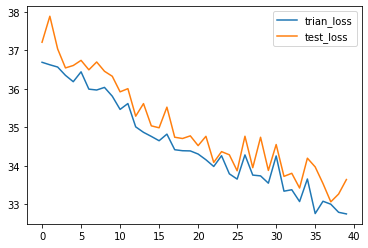

min(train_loss),min(test_loss) 32.74634285397 33.06079551958221


<Figure size 432x288 with 0 Axes>

In [19]:

train_data_tensor = torch.Tensor(df_norm_train)
test_data_tensor = torch.Tensor(df_norm_test)
train_dataset = TensorDataset(train_data_tensor)
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, drop_last=True)
test_dataset = TensorDataset(test_data_tensor)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True, drop_last=True)

model = Mlp(256)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
loss_fn = torch.nn.MSELoss(reduction='mean')

norm_re=train(model,train_dataloader,test_dataloader,loss_fn,optimizer,scheduler=None,epochs=50)

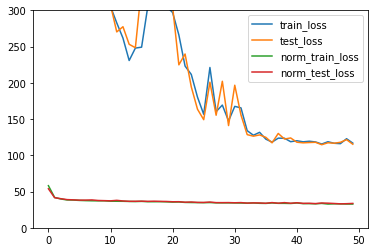

In [20]:
# plt.figure(figsize=(6,6))
plt.plot(re[0][:])
plt.plot(re[1][:])
plt.plot(norm_re[0][:])
plt.plot(norm_re[1][:])
plt.ylim(0,300)
plt.legend(['train_loss','test_loss','norm_train_loss','norm_test_loss'])
# plt.show()
plt.savefig('norm_or_not.png',dpi=200)

440.9859313964844
546.3208618164062
479.8803405761719
603.5899658203125
499.30963134765625
358.9715270996094
334.4483642578125
370.5937805175781
373.18798828125
273.665283203125
136.87643432617188
221.6610107421875
91.31117248535156
74.0245132446289
90.36756134033203
77.6740493774414
111.06201171875
130.33590698242188
209.84652709960938
135.93670654296875
350.98590087890625
133.35650634765625
176.9902801513672
201.6508026123047
188.42835998535156
78.59879302978516
75.69039154052734
49.942962646484375
120.2281494140625
118.72622680664062
142.719970703125
298.40472412109375
98.7894515991211
59.160499572753906
86.97735595703125
90.796630859375
126.65605926513672
102.08161926269531
145.33749389648438
93.19429016113281
148.9078826904297
56.16292190551758
60.79510498046875
53.708740234375
65.20125579833984
41.628204345703125
70.50804901123047
77.14031219482422
81.73905181884766
58.142921447753906
60.21341323852539
55.40312957763672
65.38385772705078
66.05703735351562
36.546104431152344
64.22

37.46125411987305
55.084510803222656
34.45360565185547
44.2620735168457
32.2037467956543
40.33026885986328
32.4682731628418
43.407188415527344
40.726287841796875
44.297935485839844
64.69615936279297
28.994884490966797
28.914630889892578
29.696626663208008
26.063953399658203
33.69987106323242
46.73584747314453
32.71886444091797
36.98500442504883
54.21967315673828
36.577842712402344
57.84856414794922
25.903057098388672
46.0034065246582
27.85652732849121
36.10923767089844
30.561477661132812
37.67219543457031
61.557350158691406
26.497467041015625
34.80913543701172
35.69996643066406
30.141338348388672
40.13158416748047
46.352638244628906
38.10376739501953
37.43254852294922
33.562950134277344
46.82850646972656
41.5060920715332
33.90225601196289
40.485408782958984
25.036270141601562
25.425884246826172
42.69844055175781
29.013566970825195
23.585542678833008
49.73082733154297
55.902191162109375
23.04879379272461
34.7861442565918
24.09927749633789
32.676326751708984
43.94279861450195
35.45872497

27.421735763549805
41.96365737915039
50.64413833618164
34.148338317871094
47.21410369873047
29.29116439819336
40.598731994628906
45.739646911621094
42.52179718017578
39.712379455566406
46.8541259765625
31.0020809173584
32.384220123291016
56.93494415283203
39.39826965332031
35.38087463378906
73.27998352050781
58.216365814208984
54.85756301879883
48.41312789916992
38.75840377807617
36.27656936645508
33.719482421875
35.967681884765625
54.44725799560547
24.915409088134766
28.0660400390625
48.3101806640625
34.792686462402344
50.7513427734375
33.82311248779297
22.461225509643555
41.71556091308594
44.718772888183594
36.29193115234375
69.91439819335938
35.26755142211914
38.62590789794922
56.29811477661133
38.29524230957031
26.60365867614746
30.12078857421875
22.25034523010254
28.982009887695312
42.89842224121094
36.990882873535156
34.09297180175781
29.536054611206055
38.44230651855469
40.064903259277344
23.111751556396484
31.954004287719727
38.030967712402344
31.189895629882812
37.345855712890

55.35964584350586
35.2010612487793
45.048580169677734
31.361797332763672
25.536117553710938
28.360740661621094
47.47805404663086
58.54405212402344
32.55699920654297
21.319625854492188
22.132095336914062
24.54104995727539
25.780147552490234
25.21237564086914
34.39013671875
55.13528060913086
44.46515655517578
39.49539566040039
28.29561424255371
21.96133804321289
22.86752700805664
48.736610412597656
25.953502655029297
27.42685890197754
47.565704345703125
24.392126083374023
33.79950714111328
53.71357345581055
19.59326934814453
39.456016540527344
46.08040237426758
26.587669372558594
39.68482971191406
34.93006134033203
33.84330368041992
37.91974639892578
35.03145217895508
28.911306381225586
33.91134262084961
38.560585021972656
45.23368453979492
14.928997039794922
39.31694793701172
36.083831787109375
33.148414611816406
34.98978042602539
19.707393646240234
55.40104293823242
32.15500259399414
23.625621795654297
43.02103042602539
37.92127227783203
30.19829750061035
25.008548736572266
28.78599166

25.507423400878906
20.988435745239258
42.82069778442383
38.65439224243164
35.98274230957031
32.30219650268555
33.411834716796875
23.686613082885742
35.02861022949219
29.959217071533203
23.947250366210938
22.407278060913086
18.553909301757812
19.89496612548828
32.267478942871094
41.00831604003906
25.130393981933594
44.81684112548828
34.72227096557617
27.710676193237305
44.66065216064453
35.91674041748047
57.78602600097656
63.45282745361328
51.73432540893555
28.81743049621582
47.32309341430664
68.439453125
36.19511032104492
21.114482879638672
44.8969841003418
40.239585876464844
38.57301330566406
40.33693313598633
59.47374725341797
48.07099914550781
66.4869155883789
36.425357818603516
32.577781677246094
28.0167293548584
22.156829833984375
29.786035537719727
63.97220230102539
65.43360900878906
45.68339920043945
41.58402633666992
22.663225173950195
36.555091857910156
39.585777282714844
41.034481048583984
42.77967834472656
40.84288024902344
60.033443450927734
53.08453369140625
57.27757263183

51.01153564453125
39.682090759277344
66.34580993652344
31.250473022460938
43.52914810180664
37.50586700439453
30.01799201965332
29.69048309326172
53.319766998291016
58.859413146972656
49.55160903930664
35.09428024291992
43.91295623779297
32.75739669799805
44.87528991699219
53.53059768676758
42.06016540527344
29.637638092041016
55.86188888549805
66.65469360351562
52.58937454223633
28.63247299194336
51.22940444946289
27.8256893157959
61.536441802978516
27.12084197998047
27.75550651550293
45.88095474243164
35.05380630493164
43.162635803222656
40.986083984375
30.099319458007812
22.387252807617188
42.1090087890625
28.788381576538086
71.11865997314453
27.012962341308594
20.920547485351562
57.706886291503906
46.33241653442383
39.09333038330078
23.867843627929688
32.61149215698242
24.263694763183594
25.12539291381836
87.58134460449219
38.45552444458008
33.33987045288086
23.451656341552734
36.90605545043945
21.320594787597656
43.24468994140625
31.071924209594727
30.220535278320312
47.0935592651

36.60505294799805
39.431427001953125
39.514068603515625
41.59718322753906
28.381908416748047
33.325401306152344
37.89339065551758
33.354610443115234
33.343605041503906
45.17074203491211
49.08198928833008
28.745832443237305
34.20612335205078
74.60610961914062
47.581851959228516
23.29319190979004
23.72447395324707
26.34654426574707
32.881141662597656
23.705108642578125
69.18364715576172
41.32929229736328
30.389965057373047
33.95264434814453
27.910078048706055
35.847496032714844
33.352542877197266
23.809009552001953
37.78438186645508
56.4143180847168
52.98957824707031
27.435808181762695
41.25960159301758
42.9315185546875
30.845693588256836
44.21148681640625
24.278827667236328
47.6264533996582
31.82587432861328
23.652515411376953
37.815528869628906
30.04305076599121
27.022602081298828
39.68124008178711
23.124908447265625
39.16606903076172
28.963054656982422
25.164831161499023
31.353717803955078
41.68502426147461
63.274356842041016
26.55804443359375
24.20500373840332
52.75579833984375
35.29

66.74397277832031
20.2032413482666
41.770015716552734
31.93894386291504
34.96562957763672
17.555227279663086
23.577186584472656
31.030498504638672
41.83631896972656
26.68863296508789
38.62678527832031
28.850555419921875
42.875179290771484
37.83091354370117
30.001617431640625
52.75465774536133
37.323455810546875
40.866188049316406
35.49372100830078
27.000286102294922
17.638093948364258
37.612003326416016
44.61970520019531
34.72701644897461
41.78916549682617
18.011343002319336
32.588748931884766
40.64836883544922
31.91889762878418
29.94894790649414
20.368677139282227
41.00033950805664
36.21575927734375
36.805503845214844
49.036903381347656
48.54839324951172
33.291419982910156
39.25580978393555
50.630558013916016
23.750041961669922
35.451744079589844
37.024871826171875
35.20424270629883
18.93773651123047
26.14433479309082
45.66328811645508
62.51670837402344
36.76220703125
40.31525802612305
37.04659652709961
25.59597396850586
22.846784591674805
24.02834129333496
26.747074127197266
28.46604

35.472206115722656
71.58781433105469
39.57763671875
34.740867614746094
38.508750915527344
48.030216217041016
26.725854873657227
42.03824996948242
59.05695724487305
30.71821403503418
34.35465621948242
22.778751373291016
36.45540237426758
30.287761688232422
40.88592529296875
40.02763366699219
20.9267520904541
26.845354080200195
39.55225372314453
40.72474670410156
24.85346221923828
17.80827522277832
25.992496490478516
32.27391815185547
43.96175765991211
26.495018005371094
15.375375747680664
43.84644317626953
42.50693893432617
20.691389083862305
24.91340446472168
32.84971237182617
43.2091064453125
46.129154205322266
39.70454406738281
55.70728302001953
63.55278015136719
30.437528610229492
59.602622985839844
34.11226272583008
39.679931640625
61.354373931884766
30.05216407775879
25.365657806396484
58.41961669921875
21.698972702026367
66.75154113769531
23.08708381652832
44.37004852294922
48.7308349609375
40.69727325439453
32.43558883666992
41.56843948364258
23.42726707458496
33.6602783203125
3

29.932270050048828
40.725738525390625
39.596893310546875
39.6515007019043
26.646724700927734
33.63915252685547
39.92582321166992
26.658889770507812
37.956886291503906
30.2831974029541
34.96756362915039
30.56266975402832
32.628578186035156
32.504173278808594
33.69380569458008
24.7607421875
43.49897384643555
33.99280548095703
22.795839309692383
47.91304016113281
36.32209014892578
30.848670959472656
53.73823547363281
27.521562576293945
54.769126892089844
31.36721420288086
34.225257873535156
37.93025588989258
31.865966796875
57.19261932373047
20.925939559936523
36.63692855834961
41.970787048339844
51.20086669921875
27.55462646484375
79.62098693847656
32.473331451416016
47.562381744384766
39.07956314086914
37.804420471191406
21.893957138061523
30.371700286865234
30.059844970703125
51.82786178588867
34.18051528930664
42.653594970703125
43.83517074584961
27.573043823242188
13.49598503112793
30.55550765991211
22.82977294921875
49.38542175292969
39.5147590637207
25.72482681274414
28.76636505126

23.638397216796875
34.45354080200195
23.561519622802734
29.933032989501953
39.70814895629883
35.26862335205078
43.963104248046875
35.57769775390625
26.69151496887207
29.28165054321289
41.3741569519043
30.908485412597656
20.408958435058594
20.56375503540039
36.77558135986328
35.37616729736328
38.2275276184082
44.51927947998047
31.997373580932617
24.966920852661133
21.124847412109375
30.180110931396484
16.05868148803711
29.95878791809082
24.841333389282227
58.767417907714844
53.267059326171875
43.02308654785156
43.491363525390625
31.277746200561523
26.921926498413086
51.61809158325195
36.92898178100586
61.171180725097656
54.7164306640625
22.150619506835938
28.97818946838379
55.34040069580078
28.514087677001953
50.3974723815918
30.753969192504883
26.715442657470703
23.648197174072266
33.19841766357422
42.12498092651367
31.55799102783203
30.16456413269043
54.87779235839844
47.507659912109375
27.026338577270508
31.54104232788086
30.684804916381836
33.62315368652344
58.02876281738281
34.2220

48.45513916015625
24.297517776489258
36.800655364990234
37.67813491821289
29.667680740356445
29.62615394592285
33.04003143310547
39.127227783203125
29.422351837158203
71.69439697265625
41.28965377807617
47.551429748535156
46.901695251464844
50.14213562011719
47.3284797668457
27.621070861816406
36.20813751220703
31.2904109954834
39.63063049316406
35.594661712646484
28.276378631591797
28.448152542114258
36.86935043334961
26.783275604248047
34.192955017089844
24.026811599731445
27.233259201049805
30.785348892211914
33.22208786010742
27.160247802734375
43.79362487792969
19.266204833984375
38.23386764526367
30.715261459350586
35.66062545776367
27.26133155822754
41.25946807861328
47.59716796875
22.837886810302734
42.321075439453125
29.633495330810547
25.278446197509766
24.495933532714844
37.108673095703125
51.214412689208984
28.510438919067383
26.86103057861328
22.149822235107422
32.09617614746094
27.22494888305664
53.67118835449219
38.241546630859375
31.707122802734375
38.74263381958008
21.

41.46910858154297
38.83750915527344
39.31206130981445
30.970169067382812
37.657554626464844
36.63235092163086
36.347198486328125
28.908161163330078
39.119407653808594
43.75676727294922
19.963409423828125
42.979454040527344
17.008808135986328
46.0025634765625
16.484861373901367
49.76292037963867
38.694244384765625
21.173004150390625
46.62333679199219
29.77429962158203
26.807504653930664
38.550655364990234
50.488922119140625
39.628700256347656
28.851627349853516
53.54596710205078
40.855712890625
48.114280700683594
21.141386032104492
26.529279708862305
40.89034652709961
24.272756576538086
43.06235122680664
38.14969253540039
37.285911560058594
36.368064880371094
43.02043914794922
27.534648895263672
26.115089416503906
46.06735610961914
35.54378890991211
39.752193450927734
37.4249267578125
24.973007202148438
19.829153060913086
26.637622833251953
32.4085578918457
22.924665451049805
23.211788177490234
26.497146606445312
57.30434799194336
47.606449127197266
15.865763664245605
56.81386184692383


30.202754974365234
42.18202590942383
24.664169311523438
28.891603469848633
38.49639129638672
48.03447341918945
50.38628387451172
44.69856262207031
30.332927703857422
21.882749557495117
41.565616607666016
31.100330352783203
57.2765007019043
26.805221557617188
48.54484176635742
21.438949584960938
20.734783172607422
34.470664978027344
30.494436264038086
56.96079635620117
26.701431274414062
35.28956604003906
47.775306701660156
34.16023254394531
23.204288482666016
47.790348052978516
49.12635040283203
25.182174682617188
29.074039459228516
27.31739044189453
31.10523223876953
66.14381408691406
19.238666534423828
42.391056060791016
27.479148864746094
53.4498405456543
42.05070495605469
23.645492553710938
55.33020782470703
19.204647064208984
43.3558235168457
28.741029739379883
37.22383499145508
38.343753814697266
47.52033996582031
53.50539016723633
26.954010009765625
45.89842224121094
47.40849304199219
28.4337158203125
25.114362716674805
31.692228317260742
26.487548828125
28.75620460510254
41.950

25.69717788696289
19.879467010498047
18.455949783325195
19.960235595703125
37.62849426269531
18.711828231811523
34.81641387939453
33.954193115234375
21.942100524902344
28.185943603515625
21.065628051757812
46.67853546142578
33.532527923583984
28.866334915161133
36.290061950683594
47.29191970825195
41.93004608154297
40.447479248046875
38.248313903808594
19.86575698852539
29.113590240478516
42.32156753540039
40.33479690551758
24.20150375366211
42.15351867675781
27.430683135986328
23.108720779418945
33.49934768676758
20.653728485107422
25.33816909790039
32.76104736328125
35.809669494628906
35.31598663330078
26.916887283325195
44.052711486816406
32.217960357666016
27.091720581054688
31.127246856689453
32.00508117675781
39.67234420776367
43.424072265625
15.649630546569824
23.92458152770996
35.33071517944336
36.93202590942383
30.120426177978516
26.852521896362305
58.48417663574219
38.79047775268555
31.292766571044922
27.909894943237305
28.616527557373047
41.071170806884766
32.329185485839844

29.465715408325195
47.95710754394531
37.00179672241211
37.193748474121094
35.76922607421875
38.395545959472656
26.234603881835938
28.629873275756836
28.981063842773438
36.54314422607422
49.94682312011719
36.373573303222656
26.469133377075195
25.004884719848633
33.3149299621582
41.72732925415039
25.799360275268555
30.257774353027344
22.318918228149414
21.125097274780273
23.49527359008789
38.28955078125
44.103389739990234
27.004409790039062
21.53427505493164
41.80833435058594
35.171058654785156
28.86187171936035
17.449522018432617
17.505407333374023
30.28925323486328
68.8235092163086
30.491722106933594
35.23466873168945
39.7532844543457
19.90645980834961
30.286043167114258
27.29314613342285
20.994586944580078
22.173015594482422
23.597448348999023
88.07550048828125
30.38965606689453
44.69109344482422
28.715091705322266
40.42411804199219
38.15007400512695
34.809600830078125
24.831594467163086
45.00672912597656
27.030954360961914
31.814180374145508
53.850318908691406
37.92688751220703
43.47

57.1859130859375
26.60866928100586
28.579872131347656
40.242950439453125
55.606231689453125
51.52344512939453
29.957828521728516
29.668771743774414
26.320655822753906
23.354990005493164
44.814353942871094
40.661651611328125
52.048057556152344
29.76144790649414
29.16243553161621
40.896522521972656
40.918235778808594
29.25664520263672
31.59446144104004
36.79094696044922
28.236221313476562
19.214778900146484
17.752779006958008
18.451444625854492
28.29592514038086
28.827957153320312
30.638944625854492
39.65204620361328
43.28276062011719
37.22556686401367
38.07749557495117
31.505172729492188
37.1801643371582
18.267505645751953
24.415477752685547
34.595672607421875
32.465003967285156
24.435514450073242
21.07803726196289
39.29307174682617
37.25001525878906
34.36526107788086
34.04380798339844
20.363399505615234
19.80356788635254
31.684921264648438
28.755765914916992
39.567665100097656
17.820741653442383
25.94513511657715
36.202308654785156
31.52907371520996
35.65911865234375
43.81798553466797


38.516204833984375
42.0642204284668
23.364070892333984
44.23903274536133
28.840740203857422
32.00272750854492
35.171653747558594
22.72709846496582
25.77200698852539
30.909942626953125
28.409761428833008
52.10124206542969
25.143936157226562
38.567535400390625
35.50916290283203
32.1521110534668
15.954240798950195
42.597076416015625
29.911392211914062
56.65192413330078
18.09278678894043
30.256210327148438
38.307350158691406
28.393169403076172
26.852909088134766
30.821056365966797
22.49127197265625
48.09628677368164
65.7215805053711
30.083375930786133
48.306854248046875
32.75389099121094
27.850738525390625
49.181884765625
23.89764404296875
45.771968841552734
20.89324378967285
28.511295318603516
32.06692123413086
23.51642608642578
38.091182708740234
46.17213821411133
34.22282791137695
32.76568603515625
33.66762924194336
46.97785186767578
38.80943298339844
28.242656707763672
40.74131393432617
20.979137420654297
37.88554382324219
36.363468170166016
22.909822463989258
40.67253875732422
30.1317

38.99785232543945
53.850502014160156
32.325374603271484
24.19797706604004
45.076324462890625
37.643245697021484
36.17099380493164
40.11827087402344
37.69666290283203
25.14044189453125
33.73563003540039
25.64127540588379
48.977909088134766
27.515756607055664
22.45691680908203
40.008880615234375
15.080756187438965
43.9179573059082
19.68912696838379
27.427562713623047
35.17435836791992
63.81785583496094
28.15691566467285
28.89258575439453
22.831375122070312
38.336280822753906
37.28886795043945
45.923851013183594
39.132408142089844
26.925466537475586
21.527990341186523
20.546232223510742
21.92949676513672
20.018659591674805
33.374427795410156
45.52495574951172
49.2091064453125
24.02570343017578
29.40591812133789
42.74421310424805
19.23348045349121
40.57515335083008
32.11457824707031
30.790035247802734
20.650659561157227
19.157211303710938
40.36913299560547
30.90498924255371
34.287506103515625
32.179019927978516
46.72156524658203
42.418663024902344
39.52207565307617
18.777956008911133
17.60

21.002504348754883
19.81792640686035
30.83052635192871
30.601667404174805
21.675703048706055
18.52904510498047
42.68964385986328
48.71629333496094
47.40262222290039
28.320541381835938
35.26042556762695
16.633848190307617
24.62691879272461
34.632625579833984
44.28884506225586
26.521419525146484
30.11153221130371
29.807077407836914
27.740673065185547
37.10439682006836
31.362529754638672
21.608732223510742
16.364456176757812
29.91214942932129
40.590579986572266
45.83790969848633
31.395244598388672
30.660865783691406
21.748437881469727
21.52192497253418
17.283052444458008
27.790773391723633
19.972118377685547
26.362873077392578
61.37834548950195
22.295698165893555
31.602291107177734
36.033077239990234
36.14796447753906
32.98529815673828
30.249515533447266
31.35788917541504
31.673322677612305
37.69307327270508
25.789804458618164
40.062652587890625
17.646913528442383
44.44933319091797
30.020254135131836
33.5486946105957
35.22971725463867
53.267173767089844
44.889007568359375
37.5041542053222

16.93699073791504
28.020544052124023
26.139907836914062
39.98167419433594
45.052085876464844
33.59747314453125
19.0718936920166
38.96723556518555
24.67999267578125
22.71599006652832
19.984397888183594
19.35325813293457
28.779781341552734
53.17902755737305
30.848421096801758
57.81062316894531
44.69975280761719
25.012388229370117
29.787559509277344
35.79258346557617
36.63356018066406
33.73576354980469
36.54486083984375
42.9112663269043
25.18784523010254
22.159839630126953
42.63935852050781
29.159297943115234
24.46734046936035
20.82892608642578
27.65717124938965
52.75885009765625
42.27947998046875
28.253543853759766
42.28159713745117
35.21726608276367
39.05734634399414
28.604961395263672
18.088611602783203
17.892372131347656
36.69401550292969
22.09429931640625
26.60181427001953
24.85916519165039
53.436378479003906
79.70939636230469
51.42753219604492
46.4871826171875
32.841217041015625
26.205549240112305
33.76509475708008
33.5987548828125
35.530906677246094
40.51553726196289
38.80715179443

39.964637756347656
52.664268493652344
23.634248733520508
29.330184936523438
26.5534725189209
26.4393253326416
36.5343017578125
29.840351104736328
35.53535842895508
38.19504928588867
29.481830596923828
33.72581100463867
47.49838638305664
38.6189079284668
19.909488677978516
26.12504005432129
40.602996826171875
35.9200553894043
36.830772399902344
31.29123306274414
56.99009323120117
47.307106018066406
24.32161521911621
22.812374114990234
41.09523391723633
29.54370880126953
37.57831954956055
29.90614891052246
20.765657424926758
21.504894256591797
36.324275970458984
25.826526641845703
73.41950225830078
48.943180084228516
29.690710067749023
39.18810272216797
22.75026512145996
45.47800827026367
30.52529525756836
22.597782135009766
44.45083236694336
28.899383544921875
30.632402420043945
52.0405158996582
29.03465461730957
46.04805374145508
27.7191162109375
27.676090240478516
32.152008056640625
46.181522369384766
36.34385299682617
52.858009338378906
37.66221618652344
38.995941162109375
31.1667518

33.235992431640625
61.10132598876953
28.031030654907227
33.72529602050781
40.35789489746094
20.453834533691406
14.399840354919434
28.358686447143555
37.82687759399414
47.12213897705078
27.653728485107422
35.9058837890625
33.31927490234375
24.589584350585938
28.178604125976562
30.544546127319336
15.47030258178711
27.452232360839844
20.924285888671875
20.04459571838379
30.576229095458984
23.883481979370117
35.94502258300781
50.92929458618164
36.05801773071289
34.76039505004883
14.779671669006348
23.365163803100586
17.838489532470703
27.222366333007812
27.046756744384766
23.289621353149414
33.05539321899414
28.013885498046875
49.34247589111328
34.311187744140625
38.02336120605469
39.388511657714844
17.432716369628906
37.565757751464844
25.949716567993164
32.91438293457031
23.350318908691406
25.50644874572754
38.348793029785156
38.2155647277832
25.783313751220703
41.54247283935547
32.87113571166992
66.5686264038086
26.75997543334961
40.37255096435547
42.85647201538086
46.86957550048828
40.

26.918243408203125
16.756662368774414
37.017051696777344
53.28514862060547
27.764690399169922
25.783145904541016
26.10173797607422
25.258464813232422
27.120433807373047
33.592533111572266
29.668502807617188
35.800472259521484
43.80458068847656
28.001806259155273
21.332109451293945
19.603046417236328
29.387670516967773
20.653635025024414
30.92163848876953
30.01958465576172
33.34473419189453
13.398680686950684
30.311567306518555
20.506946563720703
32.29726791381836
47.357017517089844
36.43086242675781
13.93924331665039
39.491737365722656
32.62476348876953
35.368099212646484
20.631576538085938
46.547889709472656
27.789199829101562
45.92905807495117
50.054256439208984
17.009483337402344
12.226333618164062
25.080047607421875
32.157386779785156
35.11799240112305
31.61480712890625
16.58319664001465
42.4213752746582
16.241060256958008
28.175697326660156
24.26923179626465
17.535892486572266
37.555015563964844
33.798362731933594
38.16689682006836
23.610145568847656
27.32000732421875
23.040924072

29.32019805908203
23.953428268432617
41.7209358215332
37.70000076293945
33.28562545776367
22.114877700805664
33.94527053833008
13.188087463378906
24.61715316772461
35.413421630859375
34.129154205322266
13.376079559326172
45.860191345214844
30.623910903930664
35.47227478027344
22.781330108642578
45.91060256958008
45.834041595458984
36.71953201293945
28.089052200317383
26.573774337768555
51.33675003051758
28.50466537475586
31.68976593017578
35.9698486328125
24.67618179321289
30.282272338867188
41.24357223510742
27.78185272216797
25.46565055847168
20.695276260375977
19.57959747314453
56.819210052490234
24.772533416748047
46.600799560546875
51.052642822265625
37.220211029052734
37.62161636352539
35.650367736816406
26.836669921875
42.49626922607422
24.73164939880371
24.636051177978516
25.960676193237305
20.409395217895508
22.517820358276367
29.625171661376953
21.336729049682617
29.3675479888916
22.313383102416992
22.15960121154785
23.748947143554688
42.199214935302734
27.441946029663086
22.

29.072887420654297
25.417205810546875
18.706544876098633
50.46653747558594
21.393718719482422
35.598724365234375
33.28707504272461
30.859516143798828
25.331222534179688
30.290802001953125
35.03573989868164
27.308998107910156
44.9217414855957
27.164037704467773
19.114086151123047
31.340259552001953
49.457275390625
33.66069030761719
25.811697006225586
36.64192581176758
30.231800079345703
27.44550895690918
36.0805778503418
19.47594451904297
41.22320556640625
35.13909912109375
24.823450088500977
38.44718551635742
50.31947708129883
29.294536590576172
21.788211822509766
28.654006958007812
25.331613540649414
35.738677978515625
29.835601806640625
60.08525848388672
34.55939865112305
25.242996215820312
31.205507278442383
30.0672550201416
24.265642166137695
19.72173500061035
29.600040435791016
47.57883071899414
26.199920654296875
24.342866897583008
27.052005767822266
39.88853073120117
24.822853088378906
31.97442626953125
29.76151466369629
40.36116409301758
44.30089569091797
46.66554641723633
30.3

30.90829086303711
22.270389556884766
40.13469696044922
28.506107330322266
71.99832916259766
21.086793899536133
41.89593505859375
44.490318298339844
33.818233489990234
57.47599411010742
26.021390914916992
54.86434555053711
47.194007873535156
31.80159568786621
38.73100662231445
70.6083984375
27.43375587463379
41.03423309326172
46.49732208251953
32.61754608154297
35.58860778808594
28.459321975708008
29.482650756835938
25.4591064453125
29.803468704223633
44.24504852294922
37.69343948364258
26.541797637939453
30.11016082763672
37.27325439453125
44.352081298828125
50.36289596557617
25.87775993347168
29.41899871826172
25.44971466064453
47.839202880859375
37.87491989135742
50.62770080566406
30.19443130493164
21.84626007080078
42.479461669921875
42.77762985229492
54.408382415771484
31.294551849365234
36.57626724243164
35.02675247192383
19.922893524169922
28.226360321044922
32.32676315307617
39.86439514160156
27.148162841796875
33.634063720703125
53.08283615112305
40.48572540283203
32.7703704833

38.33835983276367
25.495546340942383
25.345239639282227
35.91802215576172
49.50075912475586
21.74722671508789
28.1165714263916
34.14335632324219
38.22877883911133
37.47904586791992
30.731761932373047
33.1766471862793
32.8571662902832
22.995662689208984
35.50939178466797
19.66843032836914
58.46424102783203
32.62470626831055
26.026042938232422
34.23178482055664
56.25554656982422
32.956600189208984
41.19260787963867
37.06999588012695
22.175878524780273
26.872095108032227
25.805686950683594
24.181909561157227
17.185930252075195
15.906676292419434
31.45104217529297
31.510665893554688
38.03517150878906
26.997085571289062
13.151899337768555
37.247581481933594
36.618343353271484
43.16395568847656
56.02137756347656
29.957561492919922
24.4606876373291
29.943363189697266
29.193910598754883
53.510536193847656
25.63483428955078
32.19721984863281
24.501218795776367
26.4374942779541
44.23881912231445
21.578125
34.814109802246094
45.86385726928711
47.224910736083984
29.633588790893555
31.5808677673339

38.027748107910156
17.743562698364258
37.373409271240234
36.14397048950195
25.38982391357422
34.03443145751953
28.088651657104492
52.17522430419922
23.356876373291016
33.41790008544922
39.10398864746094
23.23874282836914
28.119089126586914
22.05158042907715
21.396705627441406
20.355567932128906
32.58133316040039
44.25664520263672
59.16699981689453
29.079792022705078
28.87803077697754
33.41854476928711
25.056028366088867
28.164270401000977
37.756717681884766
22.79107093811035
22.912599563598633
26.332406997680664
32.01590347290039
56.600807189941406
31.81025505065918
32.687416076660156
28.161361694335938
24.294790267944336
50.18684005737305
21.771093368530273
29.598033905029297
43.46513748168945
27.42696762084961
25.803661346435547
25.34055519104004
45.47057342529297
32.83393478393555
39.11052322387695
25.117280960083008
30.466840744018555
28.869924545288086
25.644468307495117
21.78318214416504
42.97083282470703
39.00422286987305
29.633892059326172
21.98834991455078
27.526355743408203
6

30.16260528564453
33.60342788696289
26.392066955566406
37.607177734375
23.251501083374023
27.46193504333496
22.93791961669922
23.0899658203125
51.63563537597656
21.988468170166016
32.9479866027832
23.61688232421875
41.123023986816406
38.03071975708008
35.79606628417969
32.95783996582031
25.941226959228516
34.73185729980469
53.02937698364258
32.678306579589844
35.125160217285156
21.525320053100586
29.10605812072754
29.16056251525879
30.523521423339844
26.50189208984375
34.948936462402344
27.23161506652832
32.55107879638672
31.476375579833984
36.98930358886719
32.54904556274414
25.229171752929688
26.467708587646484
23.124250411987305
44.6190071105957
29.73072052001953
47.47883605957031
26.71658706665039
34.88146209716797
40.14549255371094
33.4295768737793
23.245532989501953
19.193552017211914
56.84921646118164
40.30176544189453
29.294485092163086
41.13111877441406
28.083297729492188
21.52663803100586
40.56496047973633
52.138275146484375
30.18218231201172
11.506052017211914
30.63602256774

22.962203979492188
34.90656661987305
30.250038146972656
19.664817810058594
40.27537536621094
17.9365291595459
32.751277923583984
49.347084045410156
16.322477340698242
27.046344757080078
30.627639770507812
33.66793441772461
19.40407943725586
33.52589797973633
17.267898559570312
49.201942443847656
25.08078956604004
20.099159240722656
34.53559875488281
23.539947509765625
30.052539825439453
41.49967956542969
25.657283782958984
56.868839263916016
22.606523513793945
35.15507507324219
39.875553131103516
25.053518295288086
24.368223190307617
31.451364517211914
51.50444030761719
21.243459701538086
58.23581314086914
31.668212890625
25.60702133178711
32.05748748779297
28.572040557861328
52.66394805908203
63.854347229003906
27.465087890625
45.26042938232422
32.82551956176758
28.932233810424805
25.577842712402344
39.83382797241211
34.246360778808594
25.960159301757812
43.44558334350586
43.9620246887207
23.124835968017578
28.15009307861328
54.833499908447266
27.6995792388916
27.056289672851562
46.45

37.810035705566406
42.449989318847656
33.709476470947266
21.79483985900879
20.145444869995117
21.388694763183594
20.476816177368164
37.48332595825195
34.35997009277344
39.41920852661133
33.85043716430664
17.06267547607422
24.236196517944336
20.94176483154297
22.539152145385742
46.549312591552734
38.1634521484375
26.898014068603516
34.95582580566406
23.948244094848633
36.05821990966797
45.032798767089844
19.236509323120117
26.372501373291016
27.375520706176758
26.876052856445312
31.278682708740234
35.736419677734375
22.456274032592773
26.414581298828125
23.838115692138672
34.08256530761719
36.84740447998047
36.45771026611328
27.0623722076416
22.06940269470215
39.31325149536133
21.050113677978516
17.737112045288086
32.21278762817383
38.22511291503906
23.427562713623047
28.56031036376953
25.599857330322266
20.266969680786133
46.7452507019043
30.68759536743164
42.29543685913086
53.89269256591797
30.971290588378906
39.471168518066406
46.69293975830078
48.4276237487793
29.22800636291504
27.9

59.24689865112305
65.96762084960938
47.629981994628906
19.12429428100586
25.076290130615234
29.83298110961914
31.758024215698242
26.234283447265625
58.81787872314453
16.280696868896484
43.9696044921875
44.29619216918945
18.679141998291016
45.199859619140625
30.76028823852539
36.665870666503906
25.431503295898438
31.710433959960938
30.483997344970703
29.459209442138672
29.27880859375
28.179553985595703
25.163896560668945
27.613828659057617
17.43942642211914
34.92555618286133
47.017093658447266
36.86756896972656
19.749160766601562
21.90427589416504
28.02438735961914
42.137298583984375
24.75074577331543
29.86801528930664
38.48286056518555
40.79767608642578
28.67041015625
36.7889289855957
44.84612274169922
29.680126190185547
38.744876861572266
33.86176681518555
32.829097747802734
27.64257049560547
33.66408157348633
29.18386459350586
26.593137741088867
24.787513732910156
40.853267669677734
33.781455993652344
39.11549758911133
35.55492401123047
29.323688507080078
33.06483840942383
41.1645545

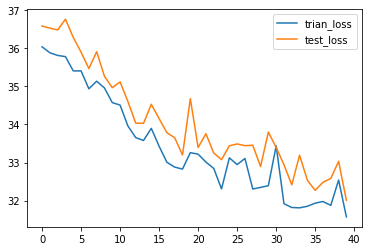

min(train_loss),min(test_loss) 31.570679045783148 32.00752482607357


<Figure size 432x288 with 0 Axes>

In [21]:

train_data_tensor = torch.Tensor(df_norm_train)
test_data_tensor = torch.Tensor(df_norm_test)
train_dataset = TensorDataset(train_data_tensor)
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, drop_last=True)
test_dataset = TensorDataset(test_data_tensor)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True, drop_last=True)

model = Mlp(256)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3,momentum=0.9)
loss_fn = torch.nn.MSELoss(reduction='mean')

norm_moment_re=train(model,train_dataloader,test_dataloader,loss_fn,optimizer,scheduler=None,epochs=50)

115.55448623657226 114.63081249344015 32.74634285397 33.06079551958221 31.570679045783148 32.00752482607357


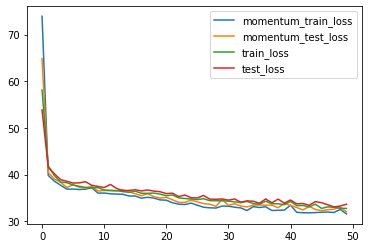

In [22]:
plt.plot(norm_moment_re[0][:])
plt.plot(norm_moment_re[1][:])
plt.plot(norm_re[0][:])
plt.plot(norm_re[1][:])
# plt.ylim(0,100)
plt.legend(['momentum_train_loss','momentum_test_loss','train_loss','test_loss'])
# plt.show()
plt.savefig('whether_moment.png',dpi=200)
print(min(re[0]),min(re[1]),min(norm_re[0]),min(norm_re[1]),min(norm_moment_re[0]),min(norm_moment_re[1]))

608.7877807617188
435.69580078125
565.3854370117188
515.649169921875
447.9373779296875
415.28302001953125
423.38177490234375
293.81732177734375
254.92347717285156
422.0494384765625
259.13470458984375
196.05252075195312
113.66251373291016
100.47740936279297
108.98786163330078
88.15003967285156
189.29183959960938
102.71485137939453
111.87189483642578
99.84561920166016
138.0267791748047
85.61161041259766
82.01089477539062
93.6525650024414
71.76075744628906
44.00857925415039
55.978851318359375
83.46835327148438
86.72142028808594
69.33348846435547
54.103858947753906
60.41394805908203
56.19208526611328
62.31809997558594
73.0527572631836
52.724239349365234
70.59695434570312
73.8026123046875
56.92271041870117
74.25267791748047
41.850563049316406
35.89034652709961
94.60015869140625
37.920654296875
72.13455200195312
44.5357551574707
42.4256591796875
29.1039981842041
54.28639602661133
65.55048370361328
39.62339782714844
87.53025817871094
65.45657348632812
79.25454711914062
44.909996032714844
60.6

27.466440200805664
28.47394561767578
45.205997467041016
50.055450439453125
42.19367218017578
45.46802520751953
32.7733154296875
43.658203125
41.61925506591797
39.3572998046875
39.6292610168457
41.3017578125
55.96867370605469
44.6593017578125
67.5763168334961
21.8043270111084
33.42710494995117
49.93058776855469
50.893272399902344
30.366283416748047
70.08126068115234
54.00543975830078
38.64494705200195
47.32823944091797
31.17030143737793
29.04677391052246
26.691566467285156
41.06888961791992
25.59039878845215
38.805145263671875
41.645057678222656
36.244384765625
30.474491119384766
39.286651611328125
38.20405197143555
61.1755256652832
46.66896057128906
34.80418395996094
53.68073654174805
19.57130241394043
44.86668014526367
43.601436614990234
40.11265182495117
52.69358825683594
34.346778869628906
30.960857391357422
54.69608688354492
40.855552673339844
32.067935943603516
31.428573608398438
23.916879653930664
52.04828643798828
21.601959228515625
42.81793975830078
42.078765869140625
64.498428

39.59022903442383
34.920387268066406
37.04579162597656
49.434814453125
25.561954498291016
51.1224479675293
47.95576095581055
34.148128509521484
33.99262237548828
39.114994049072266
40.87984848022461
47.29825210571289
22.67780303955078
67.6554183959961
22.159442901611328
46.74020004272461
39.50212097167969
24.205068588256836
57.72979736328125
35.89425277709961
31.70954704284668
34.26816940307617
38.9439697265625
30.040481567382812
56.947479248046875
39.28522872924805
31.298049926757812
39.11803436279297
23.184669494628906
47.75170135498047
30.23036766052246
36.50279235839844
30.039470672607422
34.459842681884766
47.42369079589844
46.68804931640625
53.98820877075195
35.24677276611328
48.89625549316406
38.66339111328125
33.41021728515625
47.34206771850586
24.302326202392578
26.93791389465332
24.615097045898438
37.942874908447266
44.61906814575195
32.796566009521484
50.846458435058594
46.880069732666016
53.6457405090332
46.23331069946289
40.65255355834961
29.63094711303711
37.4651260375976

19.78548812866211
50.979026794433594
34.420528411865234
33.8135871887207
35.81874465942383
29.73619270324707
23.42130470275879
22.490310668945312
29.147472381591797
30.714584350585938
26.247711181640625
60.37287139892578
42.70922088623047
35.26061248779297
40.670494079589844
37.35845184326172
24.620954513549805
35.16678237915039
27.348861694335938
35.54339599609375
54.87232208251953
45.004493713378906
33.75366973876953
30.367788314819336
40.71177291870117
45.464393615722656
32.137168884277344
72.90361022949219
64.06596374511719
62.18578338623047
36.735687255859375
33.53648376464844
31.32905387878418
24.301979064941406
19.978809356689453
21.035438537597656
34.161216735839844
47.90147399902344
32.32640838623047
43.263343811035156
27.397842407226562
54.277984619140625
36.98551559448242
48.3476448059082
32.391170501708984
20.77935791015625
43.698612213134766
27.54615592956543
37.45749282836914
21.30080795288086
70.97378540039062
36.767974853515625
38.65757751464844
44.031288146972656
47.48

37.57491683959961
43.21833038330078
52.53436279296875
38.630218505859375
28.332120895385742
32.905906677246094
22.888376235961914
31.05878448486328
39.66618728637695
28.73651695251465
27.41841697692871
22.29983139038086
64.53519439697266
35.982845306396484
40.95368194580078
27.561912536621094
38.58739471435547
54.30622100830078
29.369335174560547
41.11614990234375
26.458894729614258
35.40159225463867
18.900341033935547
48.45226287841797
39.44819259643555
36.5220947265625
30.48781967163086
26.749256134033203
39.23919677734375
28.69249153137207
18.40011215209961
26.53266716003418
37.589683532714844
45.97551727294922
28.616716384887695
29.708419799804688
29.119325637817383
45.657928466796875
35.79584884643555
44.889793395996094
44.09221649169922
47.47606658935547
41.75471496582031
32.413429260253906
22.412464141845703
20.779296875
37.747398376464844
35.80590057373047
34.66974639892578
30.98566436767578
30.95347023010254
47.09379196166992
28.36862564086914
44.111114501953125
68.84259033203

25.47222137451172
42.48741912841797
24.381357192993164
36.48424530029297
22.205284118652344
23.807857513427734
31.293838500976562
20.518402099609375
17.13035774230957
37.14248275756836
46.25749206542969
29.218904495239258
24.261959075927734
38.83395004272461
44.422401428222656
43.896541595458984
43.7199821472168
30.838096618652344
56.56711959838867
35.846439361572266
44.918399810791016
34.17301559448242
52.72903060913086
28.676372528076172
38.21702575683594
49.85825729370117
29.352703094482422
35.55330276489258
56.228668212890625
48.898136138916016
33.56441116333008
31.072616577148438
48.216758728027344
32.47792053222656
52.60108184814453
45.51066589355469
52.2742919921875
30.846479415893555
34.868038177490234
56.28071212768555
46.331024169921875
35.33100509643555
32.109806060791016
40.73239517211914
39.43540954589844
35.32699203491211
43.42000198364258
26.731468200683594
34.00799560546875
29.224246978759766
23.76758575439453
35.97024154663086
52.29090118408203
50.09543991088867
62.356

32.341636657714844
33.977027893066406
23.798385620117188
39.364471435546875
31.430465698242188
32.346885681152344
31.39646339416504
28.815513610839844
20.2414493560791
37.90031814575195
37.5443115234375
63.05884552001953
65.84754180908203
44.59440612792969
57.32477951049805
53.25324630737305
29.63239860534668
32.53841781616211
52.4976806640625
42.37560272216797
19.2040958404541
40.81987762451172
49.92687225341797
45.19773483276367
48.00817108154297
87.9190444946289
38.31061553955078
34.83470153808594
25.099424362182617
33.276161193847656
39.65616226196289
44.83421325683594
23.588733673095703
22.49871826171875
40.650413513183594
36.89812469482422
25.01416015625
47.57297897338867
46.61821746826172
19.20185089111328
39.62062072753906
27.729276657104492
24.313024520874023
30.533557891845703
22.196109771728516
39.221012115478516
39.862266540527344
36.39411926269531
45.56588363647461
41.82492446899414
34.70143127441406
25.286128997802734
26.237701416015625
18.03331756591797
36.54354095458984

23.796010971069336
29.83710289001465
47.369972229003906
37.9481315612793
32.01806640625
29.165699005126953
50.36564636230469
50.67524719238281
36.807926177978516
65.04719543457031
51.30986022949219
41.764583587646484
69.89210510253906
33.205623626708984
24.705524444580078
24.86444854736328
28.046985626220703
24.015153884887695
29.941513061523438
22.50055694580078
25.773406982421875
35.741424560546875
53.42219924926758
43.5390739440918
44.159751892089844
21.910789489746094
20.767393112182617
49.022499084472656
30.934635162353516
32.83087921142578
24.599790573120117
25.915245056152344
26.01546287536621
78.83460235595703
27.794649124145508
38.5830078125
28.10802459716797
34.40045166015625
27.734088897705078
25.183748245239258
39.609710693359375
27.018627166748047
69.49456024169922
25.779144287109375
41.51921081542969
39.39329528808594
55.84874725341797
36.9461784362793
40.49802017211914
39.33906555175781
41.74818801879883
43.8066291809082
42.23271560668945
40.0103759765625
29.991621017456

35.607601165771484
34.03419494628906
38.36858367919922
23.16580581665039
23.638826370239258
29.175735473632812
43.40129470825195
46.677677154541016
34.92860794067383
32.50893783569336
20.440092086791992
30.384145736694336
44.392913818359375
36.44364929199219
33.27396011352539
26.53378677368164
31.722862243652344
39.93499755859375
32.093040466308594
30.887104034423828
39.57951736450195
27.324478149414062
25.203916549682617
36.23543930053711
33.75226593017578
39.782989501953125
34.912635803222656
28.236040115356445
36.628883361816406
39.53512191772461
35.885047912597656
26.310514450073242
42.84539794921875
43.25724792480469
26.292858123779297
26.839473724365234
22.859182357788086
20.5399112701416
39.53978729248047
34.72015380859375
37.342071533203125
42.996971130371094
31.88479995727539
38.8272819519043
20.207998275756836
27.54716682434082
38.2418212890625
48.672515869140625
35.47308349609375
34.09823989868164
34.332035064697266
27.813858032226562
29.442264556884766
64.21017456054688
27.

38.0246696472168
24.88735580444336
51.708412170410156
36.278499603271484
36.270355224609375
18.466602325439453
50.23513412475586
31.555051803588867
20.232074737548828
49.08012008666992
33.99498748779297
22.27433967590332
53.59749984741211
46.638851165771484
29.223506927490234
17.913005828857422
39.04796600341797
30.935951232910156
30.676849365234375
31.161401748657227
38.81062316894531
28.912092208862305
34.956581115722656
28.01593780517578
28.726566314697266
39.95362854003906
29.312679290771484
26.27910614013672
37.05790328979492
37.812034606933594
36.24486541748047
21.62787437438965
40.56236267089844
25.764339447021484
31.770238876342773
15.156408309936523
54.16080093383789
25.88066864013672
39.021018981933594
29.440269470214844
47.41675567626953
36.6336669921875
47.996307373046875
35.613346099853516
34.32697677612305
30.658679962158203
55.39435958862305
35.33768844604492
40.4972038269043
26.804405212402344
22.639284133911133
35.3191032409668
42.47514343261719
37.111236572265625
26.1

37.078792572021484
26.0887451171875
27.567626953125
34.16571807861328
25.481781005859375
50.040916442871094
34.07318878173828
38.28466033935547
53.84491729736328
26.833520889282227
41.38874435424805
43.414283752441406
33.342098236083984
41.57918930053711
24.10475730895996
63.225982666015625
41.57403564453125
30.17633819580078
34.32741165161133
35.787330627441406
18.799821853637695
17.961544036865234
21.100704193115234
43.77823257446289
18.917102813720703
37.224891662597656
27.303180694580078
32.91290283203125
30.28898048400879
19.823572158813477
38.50238037109375
32.63328552246094
13.235679626464844
31.50765037536621
41.649593353271484
32.45323944091797
43.16415786743164
18.12405014038086
46.306549072265625
21.02154541015625
24.082565307617188
41.76397705078125
43.46807861328125
56.83354949951172
35.76134490966797
24.958608627319336
27.376380920410156
29.44007110595703
31.030864715576172
23.009965896606445
43.83740997314453
44.73027038574219
37.51161575317383
34.27235412597656
28.51749

28.38060188293457
44.040584564208984
37.18443298339844
32.27140426635742
53.21213912963867
46.054752349853516
38.68550491333008
26.497783660888672
38.58344268798828
43.51430130004883
20.18880844116211
21.989784240722656
32.56050491333008
33.9827880859375
39.67485809326172
18.237865447998047
43.005157470703125
34.18443298339844
25.305831909179688
44.88859558105469
27.22891616821289
26.54947853088379
33.194427490234375
25.37576675415039
39.79252243041992
25.597713470458984
33.35630798339844
45.00333023071289
55.20043182373047
31.13043212890625
53.16911697387695
35.17058563232422
32.211063385009766
43.67578887939453
15.331062316894531
34.49088668823242
29.824073791503906
31.467914581298828
44.772491455078125
34.16569519042969
25.200002670288086
36.01265335083008
19.954992294311523
51.93410873413086
23.274131774902344
30.453189849853516
45.02002716064453
29.186389923095703
36.318790435791016
34.52660369873047
37.80044937133789
43.09272384643555
31.618610382080078
42.543766021728516
37.2077

21.44393539428711
30.25118637084961
39.68724822998047
22.48142433166504
36.22028350830078
30.923254013061523
20.745994567871094
23.41192626953125
35.68649673461914
41.19395065307617
16.883892059326172
21.96818733215332
47.12248611450195
34.81416702270508
33.640899658203125
29.05272674560547
39.55748748779297
64.53631591796875
32.24501419067383
19.767614364624023
22.732595443725586
31.677051544189453
35.98285675048828
30.102497100830078
23.391571044921875
30.367721557617188
35.90391540527344
28.81683921813965
30.055936813354492
20.176773071289062
36.98105239868164
27.957059860229492
49.28373336791992
26.883792877197266
45.65753173828125
26.24283790588379
51.9522590637207
23.28580093383789
63.06180191040039
38.21510696411133
49.451541900634766
63.20255661010742
25.674884796142578
25.89236068725586
28.955358505249023
30.95053482055664
23.706096649169922
44.26255798339844
26.904754638671875
33.8352165222168
28.872467041015625
33.62745666503906
22.829797744750977
28.693822860717773
21.67994

27.885635375976562
35.73969650268555
26.570831298828125
20.77178192138672
16.428001403808594
42.62678909301758
30.945693969726562
22.33824348449707
55.78936767578125
44.372703552246094
41.500667572021484
30.77593231201172
47.661991119384766
36.33726119995117
25.31915283203125
25.602224349975586
50.79370880126953
41.2534294128418
32.9547004699707
54.427330017089844
31.699295043945312
37.828922271728516
39.00951385498047
16.20511245727539
70.40693664550781
36.07369613647461
24.63780975341797
50.368446350097656
22.286378860473633
24.73480224609375
29.523719787597656
45.28303527832031
26.33995246887207
22.462249755859375
36.65747833251953
20.620548248291016
29.935335159301758
24.844175338745117
61.84783935546875
70.63074493408203
47.21468734741211
28.644283294677734
34.814666748046875
34.39041519165039
37.73862075805664
32.91036605834961
46.790557861328125
31.572521209716797
27.927753448486328
25.226367950439453
21.23652458190918
19.99860191345215
29.21065902709961
36.117828369140625
31.96

40.08820343017578
34.36294174194336
30.115882873535156
42.49917221069336
27.263431549072266
32.32017517089844
34.515411376953125
26.699453353881836
25.51427459716797
16.939176559448242
40.745853424072266
26.02437973022461
36.07438278198242
52.99711608886719
17.231130599975586
18.356159210205078
24.22838020324707
23.84954071044922
27.64090919494629
44.620933532714844
20.551576614379883
63.90986251831055
38.07598876953125
42.94952392578125
58.738075256347656
24.165504455566406
40.19061279296875
34.62014389038086
37.581844329833984
22.10301971435547
16.0020694732666
26.456878662109375
21.302825927734375
41.07345962524414
29.255233764648438
42.209434509277344
41.396461486816406
39.02816390991211
37.95903015136719
48.09845733642578
25.087020874023438
22.465604782104492
29.185997009277344
47.36820602416992
40.86145782470703
17.393333435058594
40.71375274658203
25.951658248901367
30.407691955566406
37.450408935546875
30.780078887939453
29.51344108581543
38.99900436401367
41.6833381652832
35.9

38.531700134277344
17.36459732055664
38.17245101928711
40.854087829589844
20.13213348388672
43.630706787109375
27.698383331298828
31.473438262939453
18.546215057373047
23.479812622070312
54.27628707885742
47.51369857788086
30.654239654541016
65.14906311035156
37.98842239379883
45.92906951904297
31.317279815673828
38.22368621826172
39.5020866394043
30.846572875976562
19.801740646362305
28.22919464111328
37.04232406616211
39.89838409423828
29.03716468811035
37.988800048828125
37.051082611083984
27.28621482849121
33.319244384765625
55.80419921875
29.645565032958984
37.58818054199219
41.95195770263672
26.952281951904297
42.93365478515625
29.591218948364258
29.54912567138672
53.56311798095703
20.418102264404297
44.192718505859375
15.83444595336914
18.689804077148438
23.94551658630371
33.755001068115234
45.239009857177734
47.38697814941406
30.044464111328125
43.66001892089844
64.55357360839844
54.900367736816406
28.440414428710938
56.8399658203125
28.058147430419922
32.414955139160156
27.211

59.580623626708984
25.648103713989258
37.14908218383789
45.54905700683594
30.315444946289062
32.71500778198242
19.698341369628906
49.314693450927734
29.785879135131836
32.909461975097656
35.71186065673828
30.234777450561523
35.67613983154297
21.221675872802734
28.345741271972656
26.393125534057617
25.082550048828125
22.04489517211914
29.515226364135742
23.706554412841797
44.23051071166992
34.58342361450195
23.250240325927734
34.009010314941406
35.571266174316406
50.61663818359375
30.584186553955078
36.430965423583984
36.959285736083984
27.695049285888672
34.989864349365234
38.868412017822266
20.979894638061523
34.52814865112305
45.290191650390625
24.41524887084961
34.33965301513672
26.826433181762695
34.512359619140625
34.78940200805664
32.137081146240234
19.10256576538086
19.960620880126953
38.48134994506836
42.59160614013672
27.18462562561035
24.57440948486328
22.023439407348633
31.105714797973633
29.780683517456055
34.728572845458984
26.944477081298828
19.719770431518555
66.92479705

22.60736083984375
32.38370895385742
21.69694709777832
27.22441864013672
15.605009078979492
26.807626724243164
29.70450782775879
35.041290283203125
34.4691047668457
31.432661056518555
26.930776596069336
33.1417121887207
22.18326187133789
31.356950759887695
37.15230178833008
27.153892517089844
48.62016296386719
33.063228607177734
55.54138946533203
29.848678588867188
26.037948608398438
43.095001220703125
82.54422760009766
45.95536422729492
31.891841888427734
31.72003936767578
19.36622428894043
37.562870025634766
48.336509704589844
27.34136390686035
40.35149002075195
28.280473709106445
60.483646392822266
36.44287109375
39.02102279663086
18.58809471130371
31.91974639892578
52.04975891113281
22.641700744628906
46.669254302978516
25.983552932739258
40.41141128540039
21.53813934326172
78.12895965576172
102.03463745117188
15.44738483428955
31.071578979492188
35.42601013183594
28.905324935913086
21.430849075317383
63.72310256958008
39.30228042602539
25.104454040527344
29.017108917236328
18.95471

27.445133209228516
20.700824737548828
28.9995059967041
23.974658966064453
45.87550735473633
30.073923110961914
24.151765823364258
34.18754959106445
35.83501434326172
38.83881378173828
30.883739471435547
21.547712326049805
35.119686126708984
76.92686462402344
31.58143424987793
51.50390625
33.89102554321289
26.214200973510742
15.627378463745117
37.35255813598633
28.229557037353516
33.68622970581055
25.623109817504883
22.93655014038086
15.760986328125
19.717954635620117
24.555936813354492
23.283578872680664
24.658432006835938
23.935089111328125
46.38285827636719
45.21924591064453
19.608352661132812
30.459903717041016
23.775985717773438
23.110185623168945
37.890892028808594
21.97859764099121
27.880876541137695
28.911117553710938
42.61802673339844
42.011444091796875
25.0425968170166
47.37382507324219
52.00105285644531
53.855899810791016
48.11566162109375
40.0772819519043
36.496299743652344
36.558128356933594
72.21315002441406
20.346607208251953
33.39286422729492
71.91668701171875
36.4197311

44.382568359375
23.836929321289062
37.713645935058594
45.06654357910156
44.01267623901367
38.550880432128906
71.19084930419922
32.44369888305664
29.918527603149414
37.97896957397461
40.46155548095703
57.29300308227539
25.313093185424805
24.46563148498535
32.418460845947266
58.42050552368164
31.858835220336914
23.85774040222168
40.773277282714844
32.937015533447266
58.544776916503906
29.859769821166992
27.31596565246582
42.469730377197266
16.36053466796875
25.993619918823242
29.998008728027344
39.789825439453125
36.47764205932617
44.35765838623047
29.299911499023438
39.33039093017578
42.89568328857422
32.73258972167969
34.07428741455078
40.80595779418945
35.66350173950195
21.32013702392578
33.78565979003906
17.30428695678711
49.14200973510742
31.009437561035156
17.970420837402344
30.79685401916504
26.503765106201172
35.235042572021484
43.54077911376953
27.0731143951416
20.43218994140625
39.68095397949219
31.9834041595459
33.78330612182617
48.50209426879883
20.567747116088867
50.54359436

27.39772605895996
41.20058822631836
41.03956604003906
30.314010620117188
34.53313446044922
44.82879638671875
38.06684875488281
26.794742584228516
33.13827896118164
38.86918640136719
31.451801300048828
23.200151443481445
33.04778289794922
31.062807083129883
33.03118133544922
34.850467681884766
48.62788009643555
34.90155792236328
42.654998779296875
34.5484733581543
29.47893524169922
24.14495849609375
22.84674644470215
29.481067657470703
21.294681549072266
25.759727478027344
28.963699340820312
66.70296478271484
32.9808464050293
19.085105895996094
35.37225341796875
35.19731140136719
19.77309226989746
31.571306228637695
29.098779678344727
44.141902923583984
29.211172103881836
16.650121688842773
52.229373931884766
52.42438888549805
32.47561264038086
22.434410095214844
35.537559509277344
47.19942855834961
23.330442428588867
29.44100570678711
27.925556182861328
26.036014556884766
19.132020950317383
26.217384338378906
24.250844955444336
56.38194274902344
36.42959213256836
19.518272399902344
28.

30.60272216796875
33.310726165771484
22.273378372192383
24.24664878845215
46.528594970703125
32.21125411987305
40.16521072387695
35.2646484375
27.89159393310547
28.714740753173828
37.43923568725586
28.737071990966797
22.860858917236328
31.665239334106445
35.768165588378906
35.302574157714844
20.803333282470703
33.74073028564453
17.75948143005371
33.071163177490234
46.12236785888672
42.420989990234375
28.72795867919922
39.345008850097656
52.130615234375
36.875946044921875
24.96288299560547
51.18916702270508
42.13535690307617
36.26097106933594
18.15506935119629
31.167236328125
36.25647735595703
36.8494987487793
20.598508834838867
48.03563690185547
52.53895568847656
19.057519912719727
44.70772171020508
48.22990036010742
35.36210632324219
37.86188507080078
33.07166290283203
26.366558074951172
38.73896789550781
25.286701202392578
58.06148147583008
59.65971374511719
31.38331413269043
32.412376403808594
17.2095947265625
32.18259811401367
52.86652374267578
32.653038024902344
22.459863662719727

32.769927978515625
30.65578842163086
28.19460678100586
29.725425720214844
27.365989685058594
16.784399032592773
27.89631462097168
25.11397361755371
27.531850814819336
31.21442413330078
33.06734848022461
17.857511520385742
39.36516571044922
33.75779342651367
41.82061767578125
26.471580505371094
24.70699691772461
23.53251838684082
31.519855499267578
25.527366638183594
16.60619354248047
19.921937942504883
41.27960968017578
27.129972457885742
25.175073623657227
26.316003799438477
11.932687759399414
35.19316864013672
40.87729263305664
32.5283203125
23.83633041381836
43.9871711730957
40.46965789794922
30.703205108642578
20.205055236816406
42.6256103515625
22.797565460205078
15.307245254516602
38.29431915283203
34.012474060058594
43.59038162231445
28.041410446166992
23.115365982055664
21.617111206054688
61.21406555175781
30.775596618652344
43.97584915161133
35.58106231689453
81.47877502441406
31.70511245727539
22.956966400146484
32.34873580932617
25.011259078979492
39.75188064575195
36.978973

36.08226013183594
24.56829261779785
23.04291343688965
33.3399658203125
55.219024658203125
24.965402603149414
25.47743034362793
19.353862762451172
49.86023712158203
27.082223892211914
33.443870544433594
25.028553009033203
23.052892684936523
37.122718811035156
50.504817962646484
26.285614013671875
22.642314910888672
31.175382614135742
45.28402328491211
34.15888977050781
33.40465545654297
46.64203643798828
30.648895263671875
47.601070404052734
19.82659149169922
37.38236999511719
24.603883743286133
27.45452117919922
29.773784637451172
30.150468826293945
21.327808380126953
28.16777229309082
22.704727172851562
35.490482330322266
36.28315734863281
46.959781646728516
43.74394989013672
19.394384384155273
33.51587677001953
23.463712692260742
50.96841049194336
26.683340072631836
38.22334289550781
38.70292663574219
56.62961959838867
55.730587005615234
20.289649963378906
22.065298080444336
43.12321090698242
44.553279876708984
42.65927505493164
53.26734924316406
22.143585205078125
33.228519439697266

29.71319580078125
33.08740997314453
26.888896942138672
28.011993408203125
27.65580940246582
30.898733139038086
30.52613639831543
21.80751609802246
20.48694610595703
33.84364318847656
22.809650421142578
28.213415145874023
32.36500549316406
48.84360885620117
20.847753524780273
27.00794219970703
35.08402633666992
30.201494216918945
16.7331485748291
31.875164031982422
23.606842041015625
14.242612838745117
42.85903549194336
30.0507869720459
27.884065628051758
31.370670318603516
31.338232040405273
39.139793395996094
42.79928207397461
37.14862823486328
41.931968688964844
18.736934661865234
55.1566162109375
27.17935562133789
37.548126220703125
18.877490997314453
31.549884796142578
36.65045928955078
73.3088150024414
45.51666259765625
44.465641021728516
36.110958099365234
29.075258255004883
28.935382843017578
20.831945419311523
25.325027465820312
39.74558639526367
17.639904022216797
26.731355667114258
39.4369010925293
24.69525146484375
27.485776901245117
18.08218765258789
47.81849670410156
41.61

31.855323791503906
32.0382194519043
18.759746551513672
19.04860496520996
52.44831848144531
15.16506576538086
40.40095901489258
57.9245491027832
28.7861385345459
35.171226501464844
27.935894012451172
24.357234954833984
21.673643112182617
48.85736083984375
55.264652252197266
19.076953887939453
53.04594421386719
39.6588020324707
60.834659576416016
39.716915130615234
34.369110107421875
21.660316467285156
18.166610717773438
28.084247589111328
28.75629234313965
41.191532135009766
24.915773391723633
39.09296798706055
31.912246704101562
28.858339309692383
34.604949951171875
37.16556930541992
27.08997344970703
43.4456672668457
23.62822151184082
27.4520263671875
37.864654541015625
24.100765228271484
32.26900100708008
27.647884368896484
40.612953186035156
29.700424194335938
41.14959716796875
33.09402084350586
45.90690994262695
36.97857666015625
33.772037506103516
24.575401306152344
24.627334594726562
35.26792907714844
31.751785278320312
32.57511901855469
24.725297927856445
45.60334777832031
29.45

31.269315719604492
37.218841552734375
33.31196975708008
19.270305633544922
34.45914077758789
35.41460418701172
26.880523681640625
36.516990661621094
30.761852264404297
29.40172576904297
30.274431228637695
28.360017776489258
26.234146118164062
23.975690841674805
33.13191604614258
31.200620651245117
35.76614761352539
26.061981201171875
22.957733154296875
29.404748916625977
19.28255844116211
40.38975524902344
32.61016082763672
36.061058044433594
23.933862686157227
37.20030975341797
27.05771255493164
42.75556945800781
36.22826385498047
20.510181427001953
37.25130844116211
42.9716682434082
25.37529754638672
27.46176528930664
27.548961639404297
27.20304298400879
24.50126075744629
39.08515930175781
42.7020263671875
31.080101013183594
41.94773483276367
24.032642364501953
38.58985137939453
23.40809440612793
27.28276824951172
15.096908569335938
44.31772994995117
47.631011962890625
34.291847229003906
34.28085708618164
31.66819190979004
31.172134399414062
62.5559196472168
32.9700813293457
33.24211

29.907302856445312
30.745656967163086
28.928625106811523
32.591400146484375
21.782617568969727
21.596527099609375
42.21882247924805
32.542076110839844
21.935501098632812
20.42062759399414
53.93825149536133
26.284351348876953
42.22236633300781
23.647815704345703
55.93122863769531
22.58958625793457
19.33852767944336
33.86863708496094
20.59297752380371
28.005094528198242
22.5564022064209
27.30693244934082
52.405887603759766
32.87143325805664
33.60081481933594
44.57313537597656
30.37610626220703
33.30705261230469
22.470111846923828
20.56441307067871
37.23188400268555
31.929683685302734
26.33820152282715
19.937828063964844
46.32762908935547
23.089563369750977
36.49506378173828
23.870298385620117
29.203428268432617
41.89569091796875
30.254308700561523
22.015954971313477
23.36279296875
45.8797607421875
32.4398078918457
46.04246139526367
35.450416564941406
44.756858825683594
33.83888244628906
50.01227951049805
22.801654815673828
29.609214782714844
43.047821044921875
45.859954833984375
54.27920

33.53767013549805
14.703836441040039
59.297821044921875
30.175281524658203
55.09505844116211
23.829307556152344
39.8064079284668
44.19950485229492
32.94508743286133
29.28177833557129
23.730140686035156
27.20671844482422
20.811241149902344
25.973295211791992
59.72524642944336
55.22740936279297
34.42926788330078
42.08530807495117
37.52088928222656
25.137901306152344
20.071372985839844
22.782207489013672
31.291852951049805
34.05172348022461
19.556480407714844
47.139644622802734
46.92185974121094
23.41872215270996
35.702781677246094
24.69112205505371
19.967382431030273
26.583879470825195
39.133140563964844
34.53378677368164
39.13742446899414
28.048120498657227
41.71037673950195
21.480985641479492
23.11672019958496
17.0740909576416
29.948623657226562
24.513290405273438
21.231733322143555
46.0919303894043
39.039817810058594
55.43756103515625
16.186904907226562
42.133365631103516
22.386629104614258
38.30990219116211
16.869720458984375
43.53352737426758
37.34968948364258
37.53660202026367
27.1

24.3042049407959
45.82337951660156
32.786319732666016
33.00788497924805
24.633071899414062
17.423343658447266
28.400100708007812
28.79261016845703
57.10308074951172
36.753379821777344
39.69932556152344
25.340110778808594
28.812976837158203
29.776519775390625
21.22740364074707
27.401443481445312
25.32417106628418
42.06288146972656
26.974830627441406
52.039676666259766
27.7101993560791
24.04247283935547
43.046268463134766
42.7470817565918
35.14678192138672
40.77920913696289
41.253395080566406
31.83107566833496
42.62961959838867
27.569889068603516
32.6546516418457
27.767078399658203
26.955720901489258
31.490352630615234
22.991756439208984
34.40726852416992
28.15149688720703
20.15418815612793
33.855804443359375
28.736709594726562
22.609607696533203
24.103788375854492
15.701099395751953
42.74717712402344
19.65212631225586
32.153953552246094
23.743318557739258
23.97747230529785
55.385406494140625
28.446014404296875
45.41998291015625
33.41966247558594
27.686046600341797
30.978567123413086
33.

23.870189666748047
37.00954055786133
37.59074401855469
31.667795181274414
27.952922821044922
23.545528411865234
36.46486282348633
28.980743408203125
35.815032958984375
22.381038665771484
13.613853454589844
29.193798065185547
30.256214141845703
26.874225616455078
36.83839797973633
48.02492141723633
32.50398635864258
37.81025695800781
39.970237731933594
33.621070861816406
34.937599182128906
31.448970794677734
29.09158706665039
27.54123306274414
17.974868774414062
18.103919982910156
29.916898727416992
17.465471267700195
29.266016006469727
45.43360900878906
33.223392486572266
17.5311222076416
24.602691650390625
22.58828353881836
22.196224212646484
39.23698806762695
40.24470901489258
41.756324768066406
23.77690887451172
43.27621841430664
27.407011032104492
42.76081848144531
34.39603805541992
34.93962860107422
34.587928771972656
37.41911315917969
23.476985931396484
34.59515380859375
28.48836898803711
57.17357635498047
27.960491180419922
40.83488464355469
30.38846778869629
46.86277389526367
3

53.16402053833008
23.155052185058594
24.936935424804688
16.999372482299805
30.500675201416016
23.57189178466797
33.17398452758789
33.27349853515625
19.040313720703125
35.231605529785156
34.21255111694336
49.72799301147461
42.15320587158203
33.040279388427734
39.59892272949219
30.972877502441406
18.861886978149414
32.6729850769043
54.57514953613281
34.04122543334961
35.94488525390625
32.0104866027832
34.802574157714844
39.75667190551758
60.93272399902344
17.33789825439453
26.338809967041016
39.56499481201172
43.13866424560547
36.10647201538086
26.647029876708984
42.635066986083984
40.38618850708008
45.70563507080078
29.905242919921875
19.523780822753906
21.06247329711914
30.889253616333008
25.83730697631836
33.00505065917969
52.77253341674805
23.975975036621094
25.90037727355957
25.67531967163086
31.00420379638672
56.39433288574219
32.8424072265625
33.39958190917969
28.66638946533203
30.226781845092773
20.524700164794922
25.001846313476562
50.15245056152344
53.94414520263672
15.55906867

39.39778518676758
39.905311584472656
21.894271850585938
46.857025146484375
41.700599670410156
29.816417694091797
32.10191345214844
12.69629192352295
32.790409088134766
66.54893493652344
28.433490753173828
35.146297454833984
30.21571922302246
35.51264953613281
30.790544509887695
22.767669677734375
22.432292938232422
41.514862060546875
44.045196533203125
40.37662887573242
40.08159637451172
17.31782341003418
23.378643035888672
42.024009704589844
37.45760726928711
31.12029457092285
31.96875762939453
26.78376007080078
20.807863235473633
46.59081268310547
28.917627334594727
23.90498161315918
34.02614974975586
24.1395263671875
26.8637638092041
23.144882202148438
36.05129623413086
22.363391876220703
18.514440536499023
44.156700134277344
40.5885009765625
49.3990478515625
35.99605178833008
21.236650466918945
48.51893615722656
66.65843200683594
23.200429916381836
41.090538024902344
23.49468231201172
48.314876556396484
31.068260192871094
24.156604766845703
24.734102249145508
19.685264587402344
29.

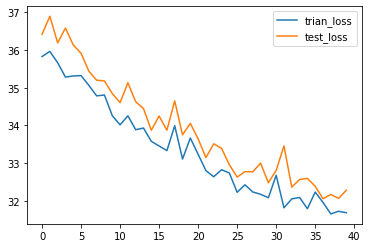

min(train_loss),min(test_loss) 31.648309466044108 32.051920590742355


<Figure size 432x288 with 0 Axes>

In [39]:

train_data_tensor = torch.Tensor(df_norm_train)
test_data_tensor = torch.Tensor(df_norm_test)
train_dataset = TensorDataset(train_data_tensor)
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, drop_last=True)
test_dataset = TensorDataset(test_data_tensor)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True, drop_last=True)

model = Mlp(256)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3,momentum=0.9)
loss_fn = torch.nn.MSELoss(reduction='mean')

norm_moment_re=train(model,train_dataloader,test_dataloader,loss_fn,optimizer,scheduler=None,epochs=50)

31.648309466044108 32.051920590742355 37.23254636128743 37.46069763456921 31.648309466044108 32.051920590742355


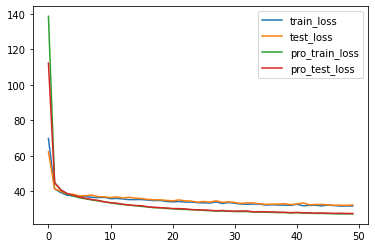

In [42]:
plt.plot(norm_moment_re[0][:])
plt.plot(norm_moment_re[1][:])
plt.plot(np.array(pro_norm_moment_re[0][:]))
plt.plot(np.array(pro_norm_moment_re[1][:]))
# plt.ylim(0,100)
plt.legend(['train_loss','test_loss','pro_train_loss','pro_test_loss'])
# plt.show()
plt.savefig('whether_pro.png',dpi=200)
print(min(norm_moment_re[0]),min(norm_moment_re[1]),min(pro_norm_moment_re[0]),min(pro_norm_moment_re[1]),min(norm_moment_re[0]),min(norm_moment_re[1]))

561.78369140625
481.30474853515625
581.89306640625
598.6591796875
528.3162231445312
597.3221435546875
492.5870056152344
453.7418518066406
548.62548828125
437.0875549316406
428.6267395019531
520.2730102539062
479.1754455566406
455.22845458984375
498.4446716308594
407.6303405761719
568.4881591796875
360.2521667480469
384.0911865234375
423.48486328125
455.3531799316406
546.0518188476562
402.7215576171875
335.01239013671875
378.7059631347656
430.15838623046875
450.8216247558594
370.15985107421875
336.7729797363281
344.31005859375
308.53857421875
342.5212097167969
373.4414367675781
319.1658630371094
376.5646667480469
367.677978515625
358.6455078125
313.5603332519531
281.5225830078125
344.64056396484375
266.1828308105469
211.24026489257812
252.75485229492188
235.6798858642578
199.82437133789062
239.32704162597656
150.42919921875
138.50730895996094
265.63482666015625
184.97593688964844
188.2469024658203
235.5347442626953
147.3617706298828
205.4384765625
99.68342590332031
96.9649658203125
118.

45.8245849609375
64.49842834472656
47.675331115722656
31.655868530273438
47.467369079589844
51.20405960083008
62.837074279785156
30.02445411682129
68.8880386352539
50.365901947021484
42.475486755371094
53.48951721191406
50.61376953125
37.578575134277344
49.87659454345703
42.43783950805664
59.65385055541992
76.71129608154297
23.941722869873047
60.644264221191406
60.97959899902344
52.15873336791992
43.4046516418457
33.211631774902344
64.69609832763672
120.5213623046875
60.0224609375
42.36652755737305
59.22803497314453
55.5709228515625
35.869773864746094
35.1077995300293
62.97945785522461
36.285648345947266
54.728721618652344
38.62377166748047
56.55622863769531
57.2144660949707
58.313846588134766
24.525699615478516
68.94049072265625
68.3051986694336
83.09127807617188
42.58412551879883
46.36138153076172
51.017635345458984
43.54451370239258
53.760982513427734
37.74302673339844
39.682708740234375
66.39768981933594
83.4518814086914
52.77431869506836
70.73035430908203
54.2382926940918
49.12752

45.993385314941406
52.9732780456543
38.036991119384766
41.48350524902344
55.89786148071289
38.202518463134766
32.073490142822266
44.66801834106445
42.37303924560547
33.3661003112793
25.27619171142578
47.88631057739258
42.66474914550781
28.47299575805664
47.4232292175293
60.3818244934082
52.176734924316406
45.54585266113281
43.22064208984375
31.78958511352539
51.98798370361328
43.61919021606445
28.476520538330078
102.14457702636719
49.824737548828125
46.72980499267578
36.521240234375
44.6868782043457
45.525062561035156
37.8757209777832
48.05575942993164
47.33380126953125
44.267208099365234
47.05493927001953
47.99995422363281
39.170166015625
61.13058090209961
31.297666549682617
51.934837341308594
66.81526184082031
40.55781173706055
43.66213607788086
31.323604583740234
50.45536804199219
33.5843505859375
43.469139099121094
33.925724029541016
46.57350540161133
33.13095474243164
47.614139556884766
57.57194137573242
39.16094207763672
46.43205642700195
30.48236083984375
39.780643463134766
36.4

35.347007751464844
36.249691009521484
44.55632781982422
31.33844566345215
77.83187103271484
40.61517333984375
92.54281616210938
40.228271484375
55.893035888671875
46.229671478271484
44.14573669433594
51.54267883300781
24.002239227294922
26.522438049316406
29.752038955688477
87.22854614257812
53.42790603637695
42.64408493041992
40.44001007080078
40.971893310546875
41.94475173950195
47.64708709716797
31.062530517578125
44.685325622558594
50.466835021972656
24.880952835083008
48.419578552246094
27.576770782470703
48.629817962646484
67.7416763305664
29.003093719482422
68.81803131103516
47.64356231689453
56.358150482177734
35.17784118652344
53.1444091796875
30.818958282470703
40.57374954223633
63.7453498840332
64.9227066040039
33.744415283203125
27.279909133911133
69.52954864501953
53.06456756591797
31.08576011657715
39.00965118408203
67.41180419921875
33.41740036010742
30.19715118408203
70.6201400756836
44.03546905517578
30.353317260742188
32.27443313598633
45.683433532714844
56.8724212646

38.41693878173828
42.36339569091797
36.99241256713867
26.573474884033203
54.645442962646484
33.34395980834961
27.017305374145508
34.59437561035156
55.9227409362793
62.63351058959961
47.54094314575195
49.738929748535156
56.16535949707031
52.58560562133789
28.746288299560547
42.50086975097656
38.9444694519043
28.94532012939453
68.75564575195312
54.50643539428711
40.35421371459961
41.633384704589844
77.78718566894531
32.43410873413086
53.17430877685547
41.859764099121094
47.41645812988281
55.49930953979492
23.727357864379883
49.31305694580078
46.739524841308594
44.190696716308594
83.24920654296875
65.79206848144531
50.76721954345703
40.14497756958008
94.70108795166016
64.95166778564453
34.384979248046875
42.067840576171875
24.740787506103516
38.07590103149414
48.02516174316406
30.997142791748047
30.06955909729004
34.46963119506836
46.30037307739258
62.23483657836914
58.514522552490234
41.59132766723633
34.747867584228516
60.9500732421875
40.2877197265625
64.40838623046875
46.5245361328125

24.227027893066406
90.88020324707031
33.88187789916992
46.679542541503906
61.466209411621094
35.52960968017578
49.72340774536133
25.8923282623291
40.353477478027344
57.600257873535156
20.8065185546875
50.462928771972656
49.6229362487793
53.992794036865234
65.9463119506836
31.859880447387695
37.8767204284668
33.709964752197266
43.08835220336914
88.30852508544922
57.182762145996094
38.21095275878906
55.28414535522461
42.479248046875
74.28496551513672
32.71500015258789
66.81175994873047
39.92686462402344
72.36003112792969
53.92858123779297
23.804155349731445
50.541473388671875
38.1202507019043
20.042543411254883
43.488155364990234
38.34714889526367
67.3067626953125
55.364051818847656
29.030988693237305
41.81832504272461
42.6983642578125
44.24702453613281
35.913902282714844
46.86940002441406
43.913150787353516
26.241138458251953
42.09232711791992
47.059349060058594
35.24988555908203
63.97941589355469
59.06621170043945
51.576332092285156
50.67931365966797
46.19905471801758
73.26868438720703

44.994625091552734
38.52341079711914
42.68075180053711
69.24901580810547
35.97267532348633
28.48859405517578
36.583492279052734
58.24742126464844
25.31515884399414
32.604156494140625
42.0546760559082
37.94709396362305
57.28009796142578
55.535213470458984
31.156665802001953
27.063037872314453
54.91286087036133
25.657459259033203
41.1512565612793
45.381229400634766
29.30672836303711
26.548410415649414
35.32517623901367
29.421234130859375
40.893943786621094
67.727294921875
41.343902587890625
31.61762809753418
46.26304244995117
43.62093734741211
61.62841796875
38.42243576049805
45.61882400512695
25.4669132232666
36.838356018066406
34.47636413574219
36.41621398925781
38.420440673828125
50.18882751464844
22.582763671875
21.130756378173828
49.47362518310547
73.73523712158203
30.463653564453125
77.26294708251953
30.793819427490234
31.565431594848633
57.38121032714844
49.40501403808594
41.35780334472656
25.869220733642578
45.22534942626953
51.743896484375
41.43740463256836
32.65236282348633
48.

36.5942497253418
43.27579879760742
42.29153060913086
29.429912567138672
39.168758392333984
31.536853790283203
50.74693298339844
53.053016662597656
39.90634536743164
39.78095245361328
36.870635986328125
40.61296081542969
33.44831466674805
50.80782699584961
45.01860046386719
45.00722122192383
21.030412673950195
72.9365005493164
49.86499786376953
32.20973587036133
18.649328231811523
36.470516204833984
46.27155303955078
52.33847427368164
27.84840202331543
33.1419677734375
46.75758361816406
27.34711456298828
38.469112396240234
58.55316162109375
28.940338134765625
46.97498321533203
30.89675521850586
31.981616973876953
40.827083587646484
35.86192321777344
44.28538513183594
29.82776641845703
42.72381591796875
39.840721130371094
54.055965423583984
23.523521423339844
22.98895835876465
37.29999923706055
44.46242904663086
56.37950897216797
68.04817962646484
41.38772201538086
33.50352478027344
66.35308837890625
59.57957077026367
44.54084014892578
31.692646026611328
77.97610473632812
47.566024780273

56.685123443603516
30.9328556060791
30.223834991455078
35.80065155029297
35.846927642822266
62.93048095703125
40.59944152832031
39.721595764160156
57.56398391723633
32.45916748046875
29.124296188354492
56.5078239440918
37.160118103027344
33.078887939453125
43.832366943359375
63.703125
82.47674560546875
39.05380630493164
34.96775817871094
34.17399215698242
36.78059387207031
28.237749099731445
54.40873718261719
62.79022216796875
43.73662567138672
22.809255599975586
27.087818145751953
35.020999908447266
26.82868766784668
29.067222595214844
54.645263671875
35.674617767333984
38.35846710205078
26.715654373168945
31.183300018310547
53.62939453125
58.436763763427734
34.64760971069336
24.600202560424805
50.896968841552734
37.779823303222656
35.43842697143555
59.128631591796875
46.16394805908203
47.406898498535156
48.0673828125
36.34001541137695
42.36594009399414
49.849639892578125
56.58887481689453
45.91034698486328
26.783828735351562
41.4476318359375
26.431821823120117
39.598934173583984
21.4

43.19525909423828
37.56346893310547
51.40654754638672
38.02213668823242
38.64968490600586
35.8936653137207
64.33638000488281
31.845874786376953
47.535701751708984
42.32337188720703
49.86266326904297
47.40708923339844
51.70549774169922
42.65760040283203
26.319664001464844
52.36573028564453
56.624488830566406
62.641117095947266
41.17253112792969
35.44844055175781
67.88035583496094
38.81708526611328
37.9671516418457
25.07878875732422
45.027976989746094
46.92951202392578
38.204750061035156
56.69367980957031
41.381473541259766
34.595237731933594
43.74589538574219
44.55347442626953
56.406795501708984
53.578094482421875
54.36621856689453
48.500858306884766
48.844573974609375
35.5185546875
33.991966247558594
23.15188217163086
60.106834411621094
29.813417434692383
24.994140625
42.86943054199219
52.48921203613281
30.33384132385254
27.602005004882812
39.84205627441406
31.653987884521484
36.07893371582031
54.568641662597656
47.85698699951172
33.1521110534668
35.25287628173828
34.638832092285156
49

33.43592071533203
47.92158889770508
25.897911071777344
36.996585845947266
52.68914031982422
36.184539794921875
42.37126922607422
39.27579116821289
36.1049690246582
52.08624267578125
25.67089080810547
42.66151809692383
37.135398864746094
29.37445831298828
34.929195404052734
52.62517547607422
39.26502990722656
62.67997360229492
40.41938781738281
48.22911834716797
33.40719985961914
43.319915771484375
48.34315490722656
44.091339111328125
53.02158737182617
48.033668518066406
52.88999557495117
49.799766540527344
38.02576446533203
36.12112808227539
33.841854095458984
31.408222198486328
26.45636749267578
61.048179626464844
39.59453201293945
51.767433166503906
30.276552200317383
48.290863037109375
55.29093933105469
47.45850372314453
34.860450744628906
36.00141143798828
29.243608474731445
59.03047180175781
44.613853454589844
42.93010330200195
34.0963249206543
55.711910247802734
71.92284393310547
38.56062698364258
47.81645584106445
40.60183334350586
33.1302490234375
50.22772979736328
43.902282714

37.871177673339844
44.56699752807617
39.790592193603516
36.22983932495117
29.648225784301758
105.19306182861328
53.014244079589844
51.10498809814453
50.20421600341797
44.70530700683594
21.370031356811523
37.91840744018555
18.378780364990234
34.92954635620117
40.24966049194336
25.99481964111328
56.130165100097656
24.665061950683594
20.304595947265625
51.706417083740234
27.958253860473633
44.75239181518555
39.537803649902344
37.39439392089844
37.59029006958008
47.40570831298828
49.37023162841797
36.09990692138672
41.97292709350586
45.606014251708984
22.871612548828125
54.2073860168457
37.18496322631836
34.73743438720703
24.56879997253418
40.89704132080078
32.987998962402344
46.87533950805664
28.404176712036133
45.18252944946289
44.511695861816406
29.397945404052734
36.72310256958008
56.707313537597656
31.291915893554688
40.19591522216797
56.069149017333984
70.38257598876953
34.701175689697266
65.09426879882812
19.54198455810547
50.924800872802734
26.492753982543945
40.845489501953125
43.

34.76595687866211
38.16499710083008
24.15686798095703
26.023693084716797
31.982276916503906
27.95273208618164
47.95549011230469
27.314210891723633
50.851112365722656
37.107173919677734
32.736602783203125
41.81700134277344
35.58210754394531
60.6340446472168
54.502254486083984
42.38750457763672
56.37451934814453
52.5792236328125
46.91681671142578
36.718231201171875
50.96876907348633
65.09590911865234
49.347564697265625
62.666831970214844
29.388484954833984
33.434288024902344
45.36537170410156
43.08143615722656
32.45794677734375
26.27703094482422
32.58092498779297
39.14202880859375
30.254302978515625
46.38482666015625
40.829463958740234
40.92134475708008
23.839561462402344
36.591609954833984
36.357872009277344
48.525630950927734
35.6970100402832
42.15077209472656
23.170326232910156
53.110050201416016
35.912899017333984
33.62158203125
33.70227813720703
36.35532760620117
25.805908203125
64.67425537109375
52.16551971435547
35.023704528808594
33.90457534790039
30.168506622314453
41.8112640380

25.339460372924805
40.421661376953125
42.07594680786133
55.160491943359375
66.55654907226562
34.44269943237305
33.550697326660156
34.74493408203125
37.3946418762207
46.15069580078125
38.16455078125
35.774879455566406
42.18195724487305
34.943145751953125
28.702434539794922
35.471946716308594
17.24820327758789
40.6072998046875
23.86809539794922
31.52396583557129
58.860740661621094
27.107574462890625
41.430538177490234
50.78480529785156
35.388736724853516
48.59933090209961
41.553672790527344
27.78862190246582
46.850807189941406
37.63348388671875
35.77947998046875
28.99968147277832
32.75844955444336
28.6909122467041
30.754228591918945
33.50727462768555
30.912628173828125
55.524436950683594
37.97576141357422
46.83069610595703
30.853946685791016
24.310951232910156
36.583335876464844
75.07441711425781
24.566171646118164
42.526851654052734
60.804237365722656
37.31548309326172
34.42375183105469
42.30491256713867
33.14588165283203
33.281272888183594
32.59170913696289
39.75590515136719
41.5191688

29.693035125732422
55.7894287109375
47.54355239868164
34.586647033691406
34.36408615112305
29.53482437133789
24.167797088623047
38.8494758605957
48.643795013427734
60.53911590576172
57.927635192871094
45.901092529296875
64.33502197265625
53.24217224121094
32.82084274291992
16.898149490356445
37.71664047241211
51.652191162109375
34.279502868652344
43.242042541503906
39.836055755615234
52.104366302490234
28.238210678100586
27.350284576416016
31.068498611450195
29.910844802856445
36.98999786376953
35.97067642211914
24.812667846679688
70.69139099121094
39.05398178100586
27.09019660949707
26.463525772094727
48.717872619628906
57.8192138671875
44.25020217895508
27.71579360961914
40.21027374267578
34.899925231933594
46.302364349365234
53.8770637512207
26.776832580566406
27.837139129638672
27.722904205322266
39.20615005493164
33.18027114868164
35.78243637084961
66.1406021118164
55.72856521606445
30.578922271728516
28.706893920898438
18.936195373535156
31.40542221069336
34.830936431884766
37.63

33.41596984863281
30.14692497253418
32.660736083984375
48.31397247314453
36.7940673828125
76.42379760742188
28.688507080078125
30.070362091064453
45.25709533691406
27.68880271911621
44.21727752685547
37.01436996459961
44.4878044128418
25.84603500366211
43.34724807739258
33.90351486206055
33.40204620361328
32.96345138549805
50.854774475097656
48.646209716796875
28.85411834716797
31.77162742614746
28.336637496948242
37.93682861328125
31.55767059326172
61.07642364501953
45.55354690551758
37.46343994140625
35.70423126220703
18.712974548339844
47.23738098144531
24.447635650634766
24.18406105041504
34.84047317504883
35.903831481933594
46.54148864746094
57.14271926879883
22.65837860107422
78.29532623291016
32.770957946777344
50.69161605834961
59.94066619873047
39.765785217285156
40.43406677246094
62.605186462402344
58.89025115966797
28.745866775512695
28.250232696533203
63.080963134765625
26.685405731201172
53.39485549926758
25.691547393798828
35.14101028442383
50.13022994995117
46.9784088134

42.029666900634766
34.652366638183594
33.802040100097656
59.13361358642578
35.46379089355469
34.01991271972656
33.2177848815918
33.750770568847656
31.42679786682129
35.230125427246094
44.148983001708984
28.771818161010742
34.90812683105469
39.99246597290039
37.14276123046875
28.403850555419922
29.422290802001953
37.21675491333008
33.103511810302734
40.92409896850586
33.88749313354492
26.333560943603516
54.265289306640625
31.701913833618164
26.616310119628906
43.63130187988281
74.82318878173828
35.16138458251953
33.620941162109375
46.19314193725586
44.239505767822266
37.037139892578125
38.33586120605469
28.9556941986084
22.32006072998047
28.225872039794922
34.380943298339844
65.89095306396484
26.25530433654785
43.075340270996094
47.740211486816406
52.4970703125
39.90327072143555
42.77012634277344
28.197158813476562
32.11228561401367
36.45381164550781
31.545276641845703
33.538536071777344
52.81282043457031
47.03446578979492
39.196746826171875
39.47644805908203
29.416112899780273
21.43326

49.21435546875
38.26106643676758
28.081771850585938
32.18087387084961
30.706939697265625
35.012874603271484
39.113460540771484
43.98893356323242
49.31816482543945
35.4581298828125
30.20851707458496
37.023826599121094
78.95036315917969
48.87689971923828
28.988441467285156
25.180248260498047
29.424728393554688
28.69057846069336
63.799068450927734
36.63741683959961
37.3973503112793
33.881187438964844
24.675966262817383
87.3936538696289
32.92648696899414
25.016740798950195
20.446025848388672
70.65900421142578
29.172067642211914
33.518287658691406
46.489715576171875
54.12864685058594
36.36865997314453
30.007278442382812
25.9696044921875
40.793270111083984
31.506441116333008
60.67090606689453
39.05823516845703
32.294700622558594
34.53323745727539
65.83867645263672
30.109573364257812
52.36424255371094
40.60896301269531
20.970600128173828
36.1135368347168
25.91836166381836
34.07603073120117
21.911209106445312
43.216861724853516
25.503740310668945
29.39539337158203
26.204904556274414
27.9615001

32.247379302978516
56.218074798583984
39.328529357910156
31.234539031982422
38.66862487792969
63.62745666503906
25.35899543762207
46.717552185058594
50.724891662597656
56.484100341796875
54.750244140625
38.10270309448242
33.348541259765625
44.3345832824707
52.17393493652344
30.70705795288086
51.72370147705078
43.18925476074219
30.834388732910156
33.67924499511719
60.28883361816406
32.1678352355957
31.745527267456055
43.18619918823242
22.752044677734375
47.371646881103516
30.645355224609375
22.395862579345703
40.03218078613281
41.65935516357422
51.34492492675781
39.00816345214844
27.137083053588867
41.67123794555664
42.791046142578125
50.705204010009766
32.64458084106445
38.212852478027344
37.648223876953125
61.72433853149414
39.32487869262695
33.8050537109375
60.044498443603516
21.192501068115234
24.00078010559082
32.185970306396484
20.036155700683594
21.558732986450195
22.81519317626953
36.51962661743164
45.94294357299805
18.274991989135742
31.048959732055664
51.709434509277344
45.232

53.34328842163086
52.123878479003906
37.35527038574219
38.609989166259766
49.629756927490234
55.15205764770508
28.073223114013672
34.41307067871094
51.50530242919922
24.326025009155273
25.976184844970703
20.450918197631836
36.86608123779297
34.37945556640625
31.782550811767578
27.625972747802734
27.249223709106445
41.895389556884766
56.7310791015625
35.869407653808594
24.153352737426758
24.001096725463867
25.067445755004883
40.684810638427734
13.839767456054688
60.432472229003906
45.01776123046875
56.21847152709961
45.391361236572266
80.07710266113281
38.4870491027832
36.95525360107422
32.59531784057617
27.205284118652344
32.290382385253906
37.8852653503418
23.293344497680664
38.61676025390625
53.222286224365234
29.661333084106445
34.26195526123047
37.18482971191406
35.65092086791992
26.637632369995117
34.733238220214844
21.052492141723633
42.65632247924805
33.72846603393555
53.643280029296875
25.239543914794922
37.1153678894043
40.59193801879883
49.331092834472656
40.61874008178711
38

34.87704086303711
62.37575912475586
25.14535140991211
44.814327239990234
52.912288665771484
34.18117904663086
52.67347717285156
29.895267486572266
56.61313247680664
40.15561294555664
32.07184982299805
36.207427978515625
34.8447265625
37.159080505371094
23.0319766998291
37.50390625
29.910160064697266
51.939208984375
41.221492767333984
28.0349178314209
40.988037109375
28.610065460205078
46.08106231689453
65.11627960205078
50.60844421386719
27.05800437927246
25.890796661376953
16.365123748779297
27.307010650634766
32.81014633178711
41.430992126464844
34.364871978759766
51.41078567504883
36.51233673095703
28.117618560791016
32.721160888671875
26.244733810424805
23.57461166381836
86.49180603027344
41.04768753051758
37.03459930419922
70.14339447021484
55.72514343261719
28.362213134765625
42.56264114379883
24.00762367248535
42.107200622558594
35.407737731933594
34.27106475830078
44.4253044128418
42.694091796875
48.564903259277344
39.35740661621094
29.97664451599121
40.0462646484375
27.2522544

25.87423324584961
88.17896270751953
36.33880615234375
31.03917694091797
32.37578201293945
29.780384063720703
20.315994262695312
47.53676223754883
35.31853485107422
47.97951126098633
47.446720123291016
23.15188217163086
34.910701751708984
23.23169708251953
30.850893020629883
73.3411636352539
52.1830940246582
23.953834533691406
27.72286033630371
46.98109817504883
28.10382843017578
41.025047302246094
30.6300048828125
32.07317352294922
33.01551055908203
45.21582794189453
62.82341384887695
36.850975036621094
41.05901336669922
25.30589485168457
29.842573165893555
34.825904846191406
54.09456253051758
20.85961151123047
44.482696533203125
28.436161041259766
32.257728576660156
28.138965606689453
48.22807693481445
52.42770767211914
35.52312088012695
18.669281005859375
30.71778106689453
52.02800750732422
35.07210159301758
35.90823745727539
62.235443115234375
32.739952087402344
41.97932052612305
32.24000549316406
40.18374252319336
45.12795639038086
58.0233268737793
25.189456939697266
16.53705978393

27.859878540039062
40.797279357910156
40.53984832763672
29.97071647644043
27.600976943969727
40.055397033691406
37.43043518066406
30.45035743713379
33.373878479003906
30.158906936645508
45.60684585571289
41.42474365234375
38.7773551940918
31.60073471069336
45.87553787231445
29.629945755004883
34.68491744995117
33.015380859375
33.64500427246094
44.625205993652344
41.857147216796875
47.37493896484375
54.352394104003906
21.818706512451172
43.80061721801758
27.29940414428711
31.71613121032715
40.054630279541016
33.354347229003906
39.36956787109375
31.38205337524414
26.68221664428711
28.98295021057129
36.11467361450195
33.007568359375
37.43269729614258
38.5073356628418
59.87139129638672
26.612228393554688
38.455528259277344
48.70978927612305
29.836811065673828
48.92988967895508
39.55695343017578
26.591148376464844
45.23739242553711
45.20614242553711
55.38926315307617
55.69938659667969
22.149919509887695
29.30571746826172
39.069461822509766
53.0426025390625
27.975971221923828
43.501468658447

51.090126037597656
27.859283447265625
38.01530838012695
42.57459259033203
23.402565002441406
22.165435791015625
40.012264251708984
38.60839080810547
20.125308990478516
39.41776657104492
42.447418212890625
64.12132263183594
38.4923095703125
36.27122497558594
26.69294548034668
18.001428604125977
29.17947006225586
35.162296295166016
50.87757873535156
24.49085807800293
34.7817497253418
34.09873962402344
24.83690643310547
56.27240753173828
38.705074310302734
23.225051879882812
50.801063537597656
47.8319206237793
25.073543548583984
39.17823028564453
61.356834411621094
73.49449920654297
53.66718673706055
24.26720428466797
62.37041091918945
48.50078582763672
52.56329345703125
33.84355163574219
41.820526123046875
41.122344970703125
35.313114166259766
34.891639709472656
34.69020462036133
50.35456466674805
60.22039794921875
26.696117401123047
28.238054275512695
36.678401947021484
35.86606216430664
26.68100357055664
25.111047744750977
49.41162872314453
25.692625045776367
40.00800704956055
53.90422

33.761566162109375
66.56340789794922
28.10286521911621
35.70710754394531
42.197998046875
38.931339263916016
29.50499153137207
44.21414566040039
27.588153839111328
18.626419067382812
34.62741470336914
58.58341979980469
56.109336853027344
18.4276123046875
35.493629455566406
46.30827331542969
24.0888729095459
32.698665618896484
62.30348205566406
34.888404846191406
46.194305419921875
34.35831832885742
65.18791198730469
22.877408981323242
31.447307586669922
28.931549072265625
55.31867980957031
19.644344329833984
44.96582794189453
35.83641815185547
51.31133270263672
77.86480712890625
44.65319061279297
33.52355194091797
23.194610595703125
36.35395050048828
38.39838790893555
42.19745635986328
32.08464050292969
42.24041748046875
34.776851654052734
26.393814086914062
18.537803649902344
39.408599853515625
66.8602066040039
50.682613372802734
26.025192260742188
24.299570083618164
30.864376068115234
39.37552261352539
47.510902404785156
46.17306900024414
27.528217315673828
32.70011520385742
41.438346

33.634891510009766
39.968807220458984
25.17183494567871
45.40009307861328
40.63788986206055
28.063480377197266
56.30778884887695
71.49911499023438
41.02632522583008
45.91482162475586
58.878265380859375
25.167070388793945
24.829957962036133
37.6957893371582
34.589744567871094
20.626876831054688
33.220157623291016
54.43061065673828
33.30904769897461
30.094993591308594
66.99382781982422
75.23309326171875
34.095890045166016
26.0191593170166
26.664615631103516
60.836605072021484
46.15763854980469
30.861690521240234
27.74488639831543
40.132259368896484
73.09523010253906
22.88235855102539
31.339876174926758
42.13889694213867
32.205326080322266
29.809873580932617
29.554508209228516
26.94182777404785
20.81062126159668
32.01815414428711
46.0492057800293
38.97600555419922
18.38503646850586
27.923255920410156
62.31291961669922
23.239459991455078
42.61753845214844
37.24175262451172
34.07212829589844
82.83171844482422
54.52735900878906
33.531593322753906
35.94502639770508
58.554908752441406
26.28058

39.76704406738281
31.14313507080078
52.36825942993164
25.375246047973633
33.233070373535156
47.66169357299805
40.11847686767578
27.430583953857422
28.979015350341797
34.86842346191406
38.1542854309082
18.30722427368164
23.360794067382812
41.32099533081055
33.03489685058594
34.637184143066406
50.76545715332031
43.78532028198242
59.49479293823242
44.0565071105957
41.085540771484375
28.80534553527832
54.141448974609375
39.81436538696289
43.056888580322266
24.095130920410156
38.626609802246094
65.12261962890625
21.58118438720703
50.93131637573242
35.76412582397461
24.252195358276367
26.79251480102539
46.69605255126953
33.91697311401367
34.820533752441406
36.87935256958008
71.74930572509766
27.77057647705078
36.74106216430664
40.454532623291016
26.3436336517334
41.1054801940918
52.11507034301758
25.463966369628906
48.289791107177734
52.017860412597656
36.763038635253906
33.30471420288086
38.22351837158203
31.605825424194336
31.600130081176758
29.06510353088379
40.67002868652344
38.196006774

43.70939636230469
21.23797035217285
20.899126052856445
90.231201171875
47.340389251708984
26.662328720092773
47.83521270751953
40.706153869628906
44.86083221435547
20.180587768554688
43.76714324951172
23.144210815429688
34.81917953491211
29.687274932861328
20.057300567626953
29.64365005493164
30.074569702148438
31.674100875854492
57.3395881652832
39.52893829345703
53.16244125366211
41.371734619140625
35.11098861694336
27.218000411987305
40.519378662109375
31.23802375793457
49.24555206298828
37.693206787109375
39.50477600097656
28.38475227355957
39.948734283447266
48.15708541870117
25.512361526489258
44.581668853759766
32.70342254638672
37.15106201171875
30.761123657226562
22.162294387817383
22.155488967895508
47.60466003417969
39.18329620361328
26.402711868286133
25.947221755981445
30.797443389892578
60.607112884521484
38.45762252807617
51.89696502685547
36.511112213134766
57.20799255371094
55.59892654418945
35.959110260009766
24.168397903442383
45.105918884277344
55.653961181640625
52

26.608638763427734
35.83015060424805
41.70154571533203
39.34069061279297
57.43513107299805
55.961334228515625
34.54484558105469
50.48952865600586
27.323482513427734
32.329933166503906
25.609521865844727
31.70061492919922
43.72759246826172
48.41156005859375
33.721012115478516
28.294342041015625
57.16806411743164
28.894855499267578
50.83875274658203
56.08652877807617
22.491230010986328
20.802371978759766
37.592559814453125
25.121532440185547
37.18870544433594
37.2393913269043
48.177799224853516
29.056827545166016
22.28623390197754
23.829893112182617
34.53945541381836
32.83164596557617
24.04671287536621
48.99138641357422
48.7456169128418
38.686065673828125
36.01823806762695
50.001365661621094
40.31955337524414
47.314884185791016
39.61547088623047
41.330379486083984
37.13458251953125
41.44099044799805
18.403553009033203
40.28166198730469
34.23036193847656
44.205814361572266
48.47270584106445
35.20380783081055
23.55368423461914
36.45044708251953
46.18672180175781
26.004566192626953
40.38080

26.22763442993164
27.745088577270508
29.646350860595703
44.3724479675293
21.509668350219727
41.122169494628906
45.08628463745117
36.18942642211914
25.417627334594727
24.813358306884766
39.13006591796875
40.02116394042969
27.294618606567383
14.345087051391602
30.909780502319336
20.383106231689453
22.11109161376953
41.59722900390625
14.284204483032227
53.97576141357422
36.721282958984375
23.26846694946289
30.39512825012207
41.192115783691406
19.857070922851562
51.09115219116211
28.55549430847168
67.24806213378906
65.67827606201172
57.218814849853516
38.85639953613281
43.302093505859375
44.44682693481445
29.27801513671875
36.14585876464844
39.74362564086914
27.226633071899414
51.320289611816406
37.412635803222656
40.24229431152344
36.71565628051758
53.897308349609375
29.39754867553711
38.07267379760742
37.17117691040039
56.5
32.67219543457031
42.65079116821289
49.63235855102539
42.46882629394531
28.1630802154541
48.64839172363281
41.43167495727539
39.08360290527344
50.3365364074707
57.552

26.232635498046875
36.124610900878906
26.98600196838379
55.593231201171875
46.492332458496094
36.129730224609375
41.533531188964844
29.188411712646484
24.787452697753906
26.70601463317871
25.801605224609375
48.32974624633789
37.51079177856445
49.36772537231445
44.83528518676758
26.15629768371582
38.36446762084961
35.34944534301758
33.31044006347656
18.126766204833984
25.164608001708984
52.861724853515625
28.989822387695312
23.798328399658203
34.38825225830078
28.74755859375
31.511898040771484
56.210140228271484
42.563785552978516
39.36124038696289
46.20579528808594
38.8774299621582
32.348419189453125
41.73833465576172
45.563758850097656
49.48731994628906
28.6918888092041
29.13923454284668
48.594444274902344
60.48893737792969
20.994054794311523
32.30034255981445
46.89345932006836
26.74871253967285
43.896881103515625
22.620906829833984
39.69004821777344
37.84180450439453
37.95412826538086
26.892969131469727
31.817359924316406
55.52776336669922
37.21113967895508
43.574398040771484
21.5133

32.32460403442383
25.88547134399414
18.26961898803711
36.8211784362793
26.175031661987305
34.18350601196289
41.98564910888672
29.68474006652832
45.437232971191406
30.91339874267578
79.52204895019531
43.01768493652344
63.39663314819336
23.21116828918457
34.719635009765625
31.964651107788086
21.913015365600586
36.91307067871094
39.84223175048828
30.082000732421875
35.16883850097656
38.018558502197266
68.09173583984375
25.61315155029297
57.21495056152344
51.29452133178711
40.93868637084961
32.90874099731445
41.3850212097168
40.94137954711914
73.77333068847656
33.0860595703125
25.902725219726562
22.075729370117188
33.81043243408203
27.26294708251953
35.46506118774414
26.89590835571289
33.03759765625
33.958805084228516
45.90545654296875
29.442615509033203
36.51538848876953
45.11518859863281
32.76736831665039
26.487321853637695
45.01934814453125
37.37725067138672
30.109098434448242
43.958213806152344
41.68278503417969
34.17457580566406
35.57038879394531
38.99462127685547
43.78235626220703
30

30.522445678710938
32.30353546142578
48.98373031616211
51.888511657714844
43.07609939575195
32.40880584716797
22.037700653076172
21.779865264892578
39.51386260986328
38.94401550292969
58.07968521118164
52.08156967163086
23.536640167236328
30.03245735168457
26.016849517822266
57.17350769042969
42.345787048339844
39.33541488647461
48.34831619262695
43.530208587646484
42.28695297241211
33.32637405395508
26.309314727783203
28.908172607421875
31.158422470092773
31.715103149414062
26.602985382080078
27.25531578063965
38.03620910644531
29.332622528076172
51.677242279052734
27.6408634185791
34.04435348510742
31.41541290283203
34.38383102416992
35.308929443359375
33.045413970947266
21.169029235839844
38.56427764892578
24.307615280151367
32.12495803833008
44.06768035888672
40.50778579711914
26.68726921081543
20.999282836914062
18.699111938476562
31.941131591796875
48.22618103027344
95.63016510009766
26.294776916503906
39.62124252319336
30.70982551574707
36.35511779785156
31.233131408691406
33.52

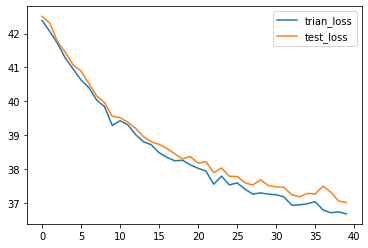

min(train_loss),min(test_loss) 36.685036171807184 37.01849424653336


<Figure size 432x288 with 0 Axes>

In [47]:

train_data_tensor = torch.Tensor(df_pro_norm_train)
test_data_tensor = torch.Tensor(df_pro_norm_test)
train_dataset = TensorDataset(train_data_tensor)
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, drop_last=True)
test_dataset = TensorDataset(test_data_tensor)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True, drop_last=True)

model = Mlp(256)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4,momentum=0.9,weight_decay=5e-4)
loss_fn = torch.nn.MSELoss(reduction='mean')

weght_norm_moment_re=train(model,train_dataloader,test_dataloader,loss_fn,optimizer,scheduler=None,epochs=50)

31.648309466044108 32.051920590742355 37.23254636128743 37.46069763456921 31.648309466044108 32.051920590742355


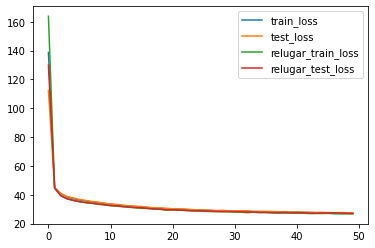

In [49]:

plt.plot(np.array(pro_norm_moment_re[0][:]))
plt.plot(np.array(pro_norm_moment_re[1][:]))
plt.plot(np.array(weght_norm_moment_re[0][:]))
plt.plot(np.array(weght_norm_moment_re[1][:]))
# plt.ylim(0,100)
plt.legend(['train_loss','test_loss','relugar_train_loss','relugar_test_loss'])
# plt.show()
plt.savefig('whether_regular.png',dpi=200)
print(min(norm_moment_re[0]),min(norm_moment_re[1]),min(pro_norm_moment_re[0]),min(pro_norm_moment_re[1]),min(norm_moment_re[0]),min(norm_moment_re[1]))

In [51]:
print(min(weght_norm_moment_re[1]))

37.01849424653336
